<h1>Sales Foreteller</h1>
<h3>M5 Forecasting Accuracy</h3>

### <b>Business problem that we are solving</b>

#### <b>Objective</b>

* The objective of this competition is to forcast the unit sales for various products in walmart for next 28 days and we are trying to solve this problem with different set of machine learning models.

#### <b>Why this problem needs to be solved</b>

* The sales trend for products is different for each stores in walmart that can be because of weather and any other factors and
  we cannot put all the products in maximum amount at all the stores because only few products may have very large amount of    unit sales and that may lead to out of stock. So the business may lose their customer or atleast the revenue.
* We may have many products remains unsold for a long time, that would also waste our storage space and more money because the money that we are putting on unsold product can spend on fast moving products.
* So we have to solve this problem by providing accurate forcast on unit sales and also by givig more weightage to products that has large unit sales to improve the revenue and that will also helps to maintain a good relationship with customer.

#### <b>Who will be benifited and how</b>

* The outcome of an good model(giving accurate forecast) can help business analyst or any other reponsible person to improve the planning different aspects of business level for example invntory distribution, distribution management, capacity planning and so on.
* As already mentioned by providing accurate forecast can help us to avoid the out of stock problem, so that we can increase the revenue and also to maintain the good relationship with customer. 
* It also saves more money by reducing the investment on less moving products.


**Business requirements**
1. The model need to provide accurate sales as much as possible for each product.
2. This model predicts the sales for next 28 days, there is no low latency requirement is need for this problem,
    so that we can give more feature engineering and makes us our model to be more accurate.

<h3>About Dataset</h3>


1. The   dataset   is   provided   by   walmart   the   dataset   involves   the   unit   sales   of   3,049   products,   classiﬁed   in   3   product   categories   (Hobbies,   Foods,   and   Household)   and   7   product   departments   and    the   products   are   sold   across   ten   stores,   located   in   three   States   (CA,   TX,   and   WI)  
2. Totally   we   have   to   forecast   42,840   time   series   for   example   1   time   series   for   Unit   sales   of   all   products,   aggregated   for   all   stores/states,   time   series   for   Unit   sales   of   all   products,   aggregated   for   each   State   and   category   and   so   on.  
We   have   four   ﬁles   
1. calender.csv   -    contains   information   about   date   on   which   number   of   products   are   sold  
2. sell   prices   -   contains   information   about   price   at   which   the   products   are   sold   per   store   and   product  
3. sample   train   validation   -   contains   historical   data   about   unit   sales   per   store   and   product[d_1   to   dd_1913]   
4. sample   train   evaluation   -   contains   historical   data   about   unit   sales   per   store   and   product[d_1   to   dd_1941]   here   from   1914   to   1941   is   our   evaluation   datase
5. Most of the fields in those datasets are self explanatory 

**External Dataset**

1. us_disasters_m5.csv - contains information about disasters on state level
    * About fields in external dataset
    i. disaster_number - is an sequence catalog number
    ii. declaration_type - it indicates how they declared it eg DR means major disaster, EM means emergency management or FM means fire management.
    iii. incident_type and declaration_title - in indicates what kind of disaster is that for example fire, strom etc. 
    iv. _program_declared - the fields with the names ends like this indicated whether certain aid program is triggered or  not(0/1).
    v. Fips code and designated area gives more information on location.
    
    

**Why machine learning is needed for this problem**

1. This problem requires machine learning because we have large amount and even if we take only subset of data will be atleast 1-2 million records and even if we use sample data it may not me more accurate.
2. Other reason is that we many underlying information like sales on weekends, close to weekends(i.e monday and friday) and rest of the days, on snap days, special eveent days, month number, quarter and so on, using statistical modelling for this requires more time.
3. By using machine learning we can give more accurate output with more amount of data.
4. One more advantage is we can retrain the module based on schedule, instead of analyst to manually repeat the process

**ML Problem Formulation**
<h5>Time series forecasting and regression</h5>


  **Root Mean Squated Scaled Error(RMSSE)**
  

**Performance Metrics**
![](https://drive.google.com/uc?export=view&id=1AxJQg9zRzrsbAtIkQ97CjsBW_Jeup3QK)


1. The   forecast   will   be   evaluated   using   
Root   Mean   Squared   Scaled   Error   (RMSSE),  
  * where   yt   is   the   actual   future   sales   of    the   time   series   at   point   t  
  * y_hat   is   predicted   value   and   n   is   length   of   training   sample   and   h   is   forecasting   horizon   i.e   28   
 
  * The   numerator   denotes   square   error   over   horzonal   interval  
Denominator   represent   squares   of   day   to   day   variation   of   training   time   series.  
 
2. At   overall   we   can   see   it   as   ration   between   error   in   prediction   and   day   to   day   variation,   and   
our   objective   is   to   minimize   it. 


<h3>Dive into data exploration</h3>

1. Import libaries needed for our case study

In [73]:
import sys
import os
import numpy as np 
import pandas as pd 
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
# sns.set(style='whitegrid', color_codes=True)
from tqdm import tqdm
import plotly
import time
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as pyo
import warnings
import random
import gc
# import dask.dataframe as dd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import validation
import re
from sys import getsizeof
import scipy
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
from itertools import cycle
from pandas import Grouper
from scipy.sparse import csr_matrix
import joblib
from sklearn import preprocessing
import lightgbm as lgbm
from sklearn import metrics
import joblib
from sklearn.preprocessing import OneHotEncoder
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Activation,Dense,Flatten,BatchNormalization,Dropout,LeakyReLU,LSTM,Conv1D,TimeDistributed,MaxPool1D,Flatten,Input
# from tensorflow.keras.regularizers import l1,l2,l1_l2
# import tensorflow.keras.initializers as initializer
# from keras import backend as K
from sklearn.preprocessing import MinMaxScaler
# tf.random.set_seed(120)
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
# rfered this blog
# https://pythonhosted.org/calmap/
# np.random.seed(sum(map(ord, 'calmap')))
# import calmap
# from joblib import Parallel,delayed
from scipy.stats import norm
from sklearn.feature_extraction.text import TfidfVectorizer
color_cycle = cycle(["blue","green","red","cyan","magenta",'yellow','black','darkorange','grey','lime'])
warnings.filterwarnings("ignore", category=DeprecationWarning)
from prettytable import PrettyTable

In [6]:
# tf.executing_eagerly() 

2. Importing necessary file for our study

In [8]:
sales_train_validation = pd.read_csv('sales_train_validation.csv')
selling_prices = pd.read_csv('sell_prices.csv')
calender = pd.read_csv('calendar.csv')

In [9]:
selling_prices.head()

store_id        item_id  wm_yr_wk  sell_price
0     CA_1  HOBBIES_1_001     11325        9.58
1     CA_1  HOBBIES_1_001     11326        9.58
2     CA_1  HOBBIES_1_001     11327        8.26
3     CA_1  HOBBIES_1_001     11328        8.26
4     CA_1  HOBBIES_1_001     11329        8.26

In [10]:
sales_train_validation.head()

id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  d_1  d_2  d_3  d_4  d_5  d_6  d_7  d_8  d_9  d_10  d_11  d_12  \
0       CA    0    0    0    0    0    0    0    0    0     0     0     0   
1       CA    0    0    0    0    0    0    0    0    0     0     0     0   
2       CA    0    0    0    0    0    0    0    0    0     0     0     0   
3       CA    0    0    0    0    0    0    0    0    0     0     0     0   
4       CA    0    0    0    0    0    0    0    0    0     0     0     0   

   d_13  d_14  d_15  d_16  d_17  d_18  d_19  d_20  d_21  d_22  d_23  d_24  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   d_25  d_26  d_27  d_28  d_29  d_30  d_31  d_32  d_33  d_34  d_35  d_36  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   d_37  d_38  d_39  d_40  d_41  d_42  d_43  d_44  d_45  d_46  d_47  d_48  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     2     0     0     0     2     0     1     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   d_49  d_50  d_51  d_52  d_53  d_54  d_55  d_56  d_57  d_58  d_59  d_60  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     2     0     1     0     0     1     1     1     0     2     3   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   d_61  d_62  d_63  d_64  d_65  d_66  d_67  d_68  d_69  d_70  d_71  d_72  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     1     0     0     0     0     0     1     0     0     1     1     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   d_73  d_74  d_75  d_76  d_77  d_78  d_79  d_80  d_81  d_82  d_83  d_84  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     1     0     0     1     2     3     0     2     0     0     2   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   d_85  d_86  d_87  d_88  d_89  d_90  d_91  d_92  d_93  d_94  d_95  d_96  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   


In [11]:
calender.head()

date  wm_yr_wk    weekday  wday  month  year    d event_name_1  \
0  2011-01-29     11101   Saturday     1      1  2011  d_1          NaN   
1  2011-01-30     11101     Sunday     2      1  2011  d_2          NaN   
2  2011-01-31     11101     Monday     3      1  2011  d_3          NaN   
3  2011-02-01     11101    Tuesday     4      2  2011  d_4          NaN   
4  2011-02-02     11101  Wednesday     5      2  2011  d_5          NaN   

  event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  snap_WI  
0          NaN          NaN          NaN        0        0        0  
1          NaN          NaN          NaN        0        0        0  
2          NaN          NaN          NaN        0        0        0  
3          NaN          NaN          NaN        1        1        0  
4          NaN          NaN          NaN        1        0        1

<h3>Explore data at differnt levels of aggregation</h3>
<h6>Let's start with plotting individual time series and pick few products randomly</h6>
<h6>Throughout this case study sales means number of units sold</h6>


In [12]:
day_columns = [column for column in sales_train_validation.columns if 'd_' in column]
over_all_sales_sum = sales_train_validation[day_columns].sum(axis=1)
over_all_sales_sum = np.sum(over_all_sales_sum.values)

In [13]:
# get column names starts with d_ from sales_train_validation dataframe
day_columns = [column for column in sales_train_validation.columns if column.startswith('d_')]

In [14]:
def random_items_plotter(number_of_random_items):
    """Plotting random items"""
    fig, axes = plt.subplots(nrows=number_of_random_items, ncols=1, figsize=(10,15))
    plt.figure(figsize=(20,10))
    # fig.suptitle('Initial Pokemon - 1st Generation')  
    print("Days vs Number of units sold")
    ids = sales_train_validation['id'].values
    ids = ids[random.sample(range(0,len(ids)),number_of_random_items)]
    total_sales = []
    random_items = [list(sales_train_validation.loc[sales_train_validation['id'] == ids[i]][day_columns].values[0]) for i in range(number_of_random_items)]
    for i in range(number_of_random_items):
        total_sales.append((sum(random_items[i])/over_all_sales_sum)*100)
        sns.lineplot(ax=axes[i],x =np.arange(len(random_items[i])),y=random_items[i],color=next(color_cycle))
        axes[i].set_title(ids[i])
        # plt.show()
        axes[i].set(xlabel='Days',ylabel='Units Sold')
        fig.tight_layout()
    df = pd.DataFrame({'item id':ids,'sales':total_sales})
    return df
    

Days vs Number of units sold


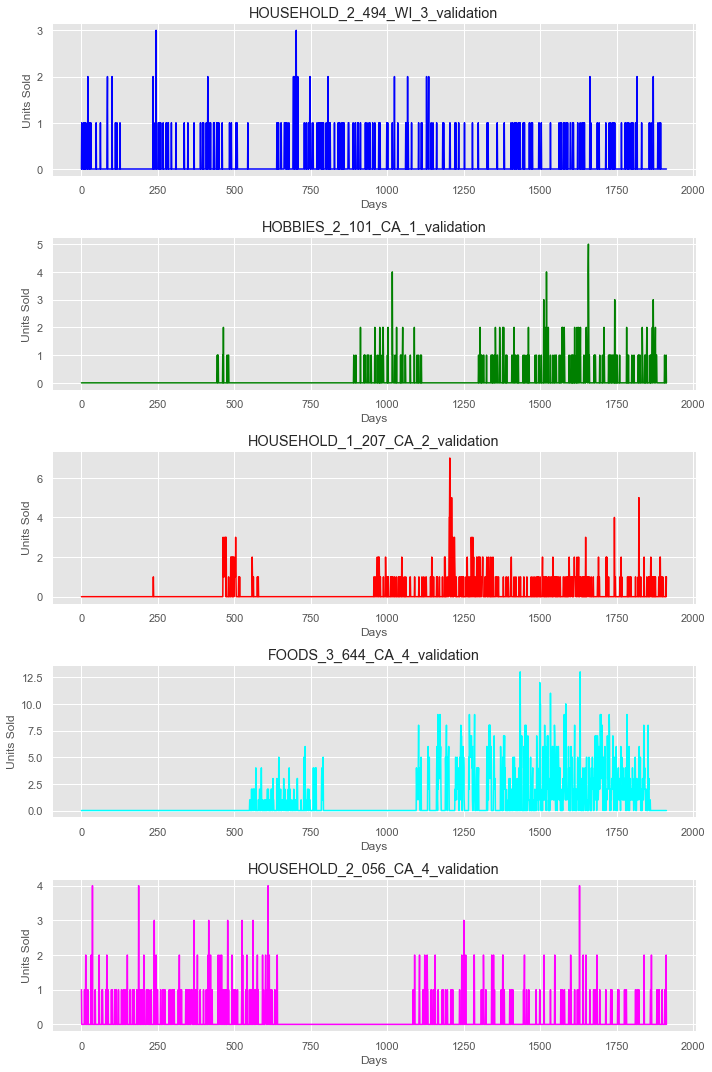

<Figure size 1440x720 with 0 Axes>

In [15]:
df_item = random_items_plotter(5)

**Observation**
All the plots are from random items and we can see lot fluctions in plots and many non zeros thi can be because of  many factors like outof stock, new product and so on.

In [16]:
df_item

item id     sales
0  HOUSEHOLD_2_494_WI_3_validation  0.000358
1    HOBBIES_2_101_CA_1_validation  0.000353
2  HOUSEHOLD_1_207_CA_2_validation  0.000580
3      FOODS_3_644_CA_4_validation  0.002793
4  HOUSEHOLD_2_056_CA_4_validation  0.000483

**Observation** 
1. From the above table prespective those random products contributes sales of less than one percen from overall sales

<h3>Let's plot the time series by aggregating all the items</h3>

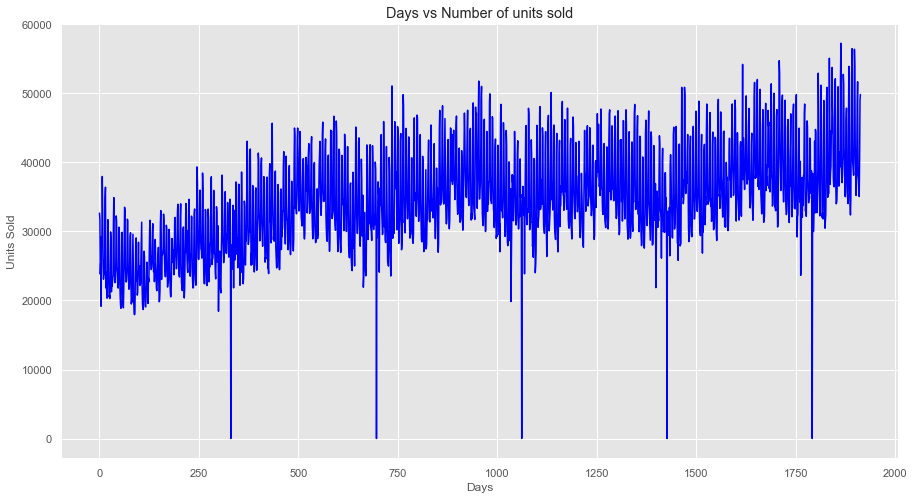

In [22]:
# This code shows aggregated sum of all days for each ids and plots it
aggregated_sales_unit = sales_train_validation[day_columns].sum(axis=0)
plt.figure(figsize=(15,8))
ax = sns.lineplot(x=np.arange(len(day_columns)),y=aggregated_sales_unit,color=next(color_cycle))
ax.set_title('Days vs Number of units sold')
ax.set(xlabel='Days',ylabel='Units Sold')
plt.show()

**Observation**
1. Sales units increasing gradually time axis increases
2. Even though the over sales units not stationary, but we can see pattern between every set days it's probably between every 340 to 365th data, so for every year we see some pattern that's nice because not an worse non stationary time series at overall aggredgated level.
3. We can see weekly seasonality by zooming into it. 
4. Also at specfit day we can very very low sales by every year. 

In [23]:
# The average sales per day
aggregated_sales_unit_mean = sales_train_validation[day_columns].sum().mean()
aggregated_sales_unit_mean

34341.562467328804

<h3>Now let's Dig into further level, before doing that lets calendar join the calndar and sales validation data to further explore the data by year,by month and also to activate the seasonal information</h3>

<h3>Let's Dig into state level</h3>

In [24]:
# refered this notebbok for merging and this plotting
# https://www.kaggle.com/robikscube/m5-forecasting-starter-data-exploration
# This code merges sales_train_validation and calendar dataframe using id
sales_data = sales_train_validation.set_index('id')[day_columns].T\
.merge(calender.set_index('d'),
       left_index=True,
        right_index=True,
        validate='1:1') \
        .set_index('date')
  
def level_one_plotter(column_name = 'state_id',title = None):
  """This function takes dimension column and and title as input and plots it accordingly """
  unique_list = sales_train_validation[column_name].unique()
  for i in unique_list:
    selected_columns = [column for column in sales_data.columns if i in column]
    sales_data[selected_columns]\
    .sum(axis=1)\
    .plot(figsize = (15,5),
          alpha = 0.8,
          color = next(color_cycle),title = title)
  plt.legend(unique_list)
  plt.show()


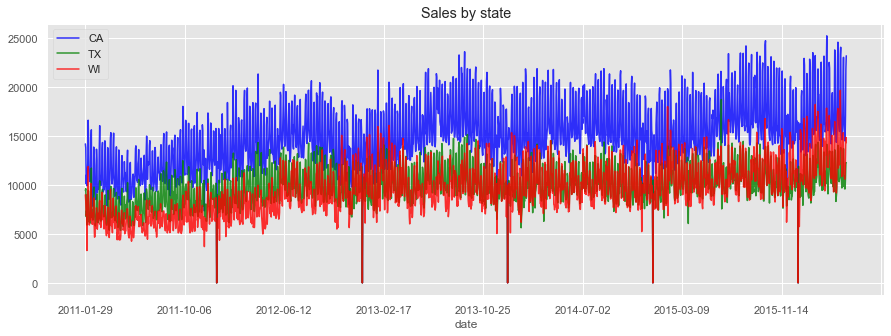

In [28]:
level_one_plotter('state_id',"Sales by state")

**Observation**
1. There are three states CA,TX and WI, CA is having more sales compare to other two states.
2. CA is trending upward upwards, while other two slightly
trending towards upward direction and here also we can see some kind of same pattern as overall sales.

**Let's see how much percentage of sales unit does each state done**

In [29]:
product_columns = [column for column in sales_data.columns if '_validation' in column]
over_all_sales_sum = sales_data[product_columns].sum(axis=1)
over_all_sales_sum = np.sum(over_all_sales_sum.values)

In [56]:
def level_one_percentage_plotter1(column_name = 'store_id',title = None,x=None):
    """This function takes dimension column and and title as input and plots it accordingly """
    unique_list = sales_train_validation[column_name].unique()
    total_sales  = []
    for i in unique_list:
        selected_columns = [column for column in sales_data.columns if i in column]
        final_sum = np.sum(sales_data[selected_columns].sum(axis=1).values)
        total_sales.append(round((final_sum/over_all_sales_sum)*100))
    df = pd.DataFrame({x:unique_list,'sales':total_sales})
    ax = sns.barplot(x=x, y="sales", data=df)
    ax.set(ylabel="Percent")
#     ax = sns.barplot(x='state',y='sales',data=df)
    ax.set_title(title)
    return df

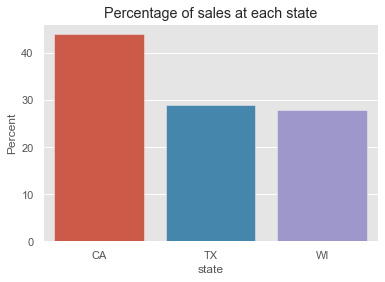

In [57]:
df_output = level_one_percentage_plotter1('state_id',r'Percentage of sales at each state','state')

In [58]:
df_output.head()

state  sales
0    CA     44
1    TX     29
2    WI     28

**Observation**

**Let's break the sales by store**

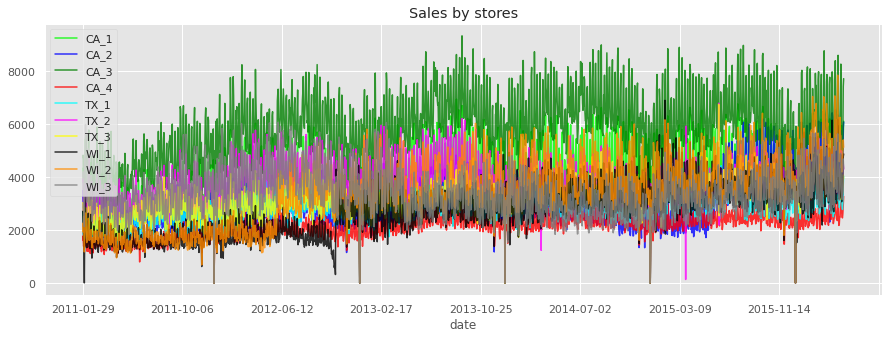

In [ ]:
level_one_plotter('store_id',"Sales by stores")

**Observations**
1. There are 10 stores 4 from CA, 3 from TX and 3 from WI. we can see that all the branch almost overlap each other expect **CA_3** that performs well at all the time periods.
2. So the branch CA_3 impacts CA to have more sales compared to other two states 

**Break the sales by store with group by year and month to get some clear visualization on sales by store for comparision** 

In [ ]:
# These lines of code marges sales_train_validation and calandar dataframe and group the data by year and month for 
# visualization
sales_data_ym =sales_train_validation.set_index('id')[day_columns].T
sales_data_ym['d'] = sales_data_ym.index
sales_data_ym = sales_data_ym.merge(calender,on='d')
sales_data_ym = sales_data_ym.groupby(['year','month']).sum()
sales_data_ym = sales_data_ym.drop(['snap_CA','snap_TX','snap_WI'],axis=1)
sales_data_ym['month_year'] = sales_data_ym.index

In [ ]:
def level_one_plotter1(column_name = 'state_id',title = None):
  """This functions takes dimension column name and title as input and plots it by using 
  data from sales_data_ym data frame"""
  unique_list = sales_train_validation[column_name].unique()
  for i in unique_list:
    selected_columns = [column for column in sales_data_ym.columns if i in column]
    sales_data_ym[selected_columns]\
    .sum(axis=1)\
    .plot(figsize = (15,5),
          alpha = 0.8,
          color = next(color_cycle),title = title)
  plt.legend(unique_list)
  plt.show()

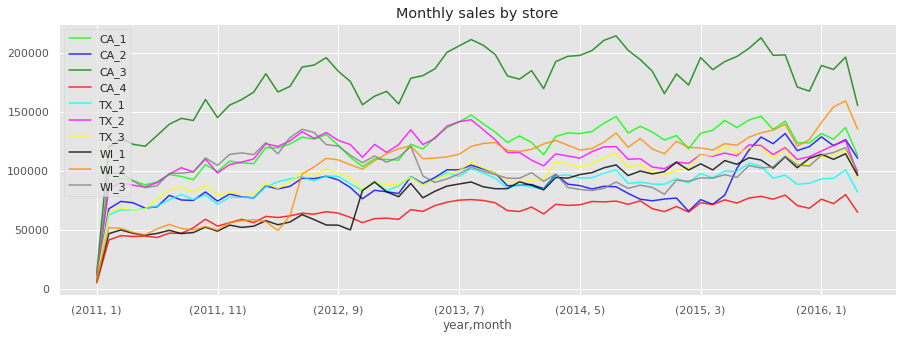

In [ ]:
level_one_plotter1('store_id','Monthly sales by store')

**Observation**
1. Now we can clearly conclude that that store **CA_3** alone impacts to have high sales on CA compared to others.
2. Except CA_3 all others branches are almost overlapping

**Let's see the percentage of sales unit shared by each store**

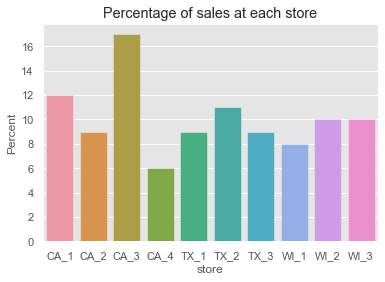

In [60]:
df_output = level_one_percentage_plotter1('store_id',r'Percentage of sales at each store','store')

In [ ]:
df_output.sort_values(by=['sales'],ascending=False)

store  sales
2  CA_3   17.0
0  CA_1   12.0
5  TX_2   11.0
8  WI_2   10.0
9  WI_3   10.0
1  CA_2    9.0
4  TX_1    9.0
6  TX_3    9.0
7  WI_1    8.0
3  CA_4    6.0

**Observation**
1. The above bar plot and table shows that two store CA_3 and CA_1 holds 39 percent of sales unit and combining CA_2 and CA_4 holds 15 percent and CA_4 held very low sales unit and because of CA_3 and CA_1 the state CA done more sales.
2. all the stores in Texas doesn't much differnt except TX_2 held 2% more i.e 11 percent while compared to TX_1 and TX_3 which is 9 percent.
3. stores i WI also done something same like in texas

**Break the sales by category**

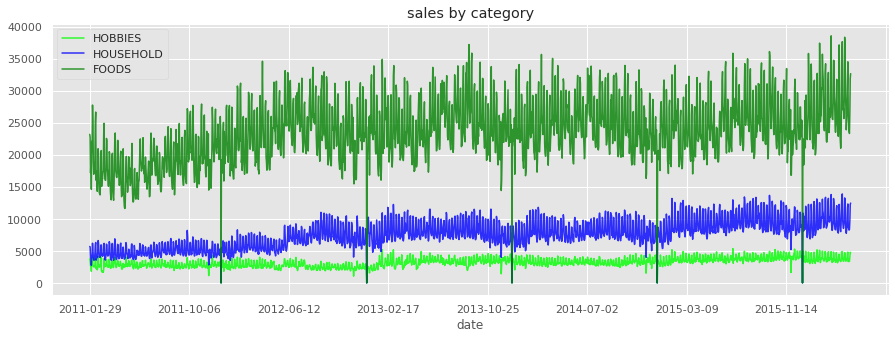

In [ ]:
level_one_plotter('cat_id','sales by category')

**Observations**
1. There are three categories of products are  Hobbies, House holds and Foods, Foods is performing very well while compared to others.
2. Next house hold it performs well than Hobbies and it trending towards upwards.
3. Next Hobbies it maintains unit sales almost close to 5000
and it is not trending towards upwards, meanwhile it doesn't seem to have yearly pattern also

**Let's see the percentage of sales unit shared by each category**

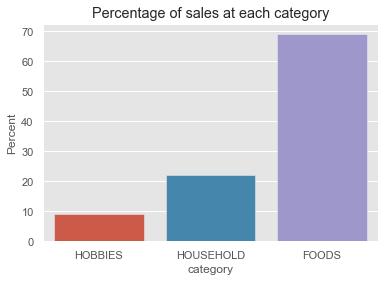

In [59]:
df_output = level_one_percentage_plotter1('cat_id',r'Percentage of sales at each category','category')

In [ ]:
df_output.sort_values(by=['sales'],ascending=False)

category  sales
2      FOODS   69.0
1  HOUSEHOLD   22.0
0    HOBBIES    9.0

**Observations**
1. Food category helds almost 70% of sales then household which is 22 % then hobbies whih is 9 %, and one more important thing
    snap days only available for foods and we have more sales on snap day while compared to other days. 

**Break the sales by department**

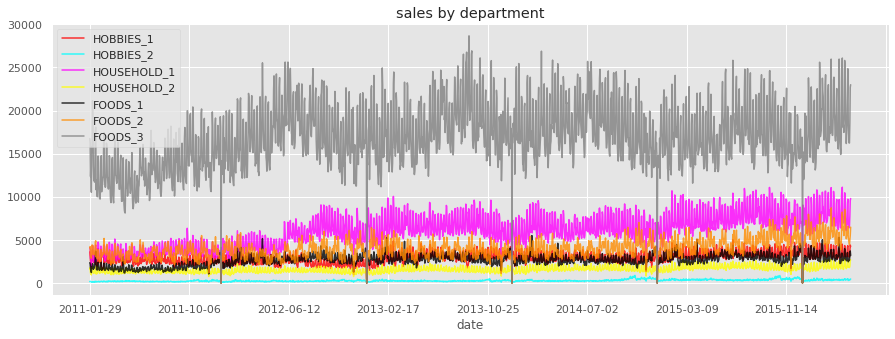

In [ ]:
level_one_plotter('dept_id','sales by department')

**Observations**

1.Theere are 7 departments and by breaking the category further to departments, The department Food_3 is the clear winner while compared to others .
2. Next the House hold 2 performs well while compared to other other 5 departmnets and it trending towards upwards.
3. Then food 2 performs well while comapred to others and it's slighly trending towards upwards.
4. Hobbies 1 and Foods 1 are almost overlapping eah other and it's not trending upwards or down wards over time.
5. Hobbies two show very low demand over the years and it shows some spike during the end of year.

**Let's see the percentage of sales unit shared by each department**

In [70]:
def level_one_percentage_plotter_rotate(column_name = 'store_id',title = None,x=None):
    """This function takes dimension column and and title as input and plots it accordingly """
    unique_list = sales_train_validation[column_name].unique()
    total_sales  = []
    for i in unique_list:
        selected_columns = [column for column in sales_data.columns if i in column]
        final_sum = np.sum(sales_data[selected_columns].sum(axis=1).values)
        total_sales.append(round((final_sum/over_all_sales_sum)*100))
    df = pd.DataFrame({x:unique_list,'sales':total_sales})
    ax = sns.barplot(x=x, y="sales", data=df)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
    ax.set(ylabel="Percent")
#     ax = sns.barplot(x='state',y='sales',data=df)
    ax.set_title(title)
    return df

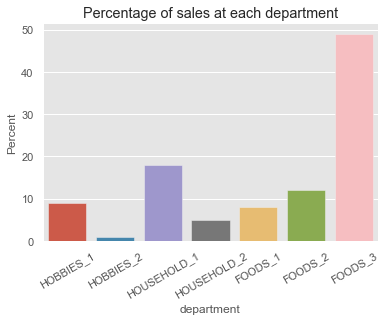

In [71]:
df_output = level_one_percentage_plotter_rotate('dept_id',r'Percentage of sales at each department','department')

In [72]:
df_output.sort_values(by=['sales'],ascending=False)

department  sales
6      FOODS_3     49
2  HOUSEHOLD_1     18
5      FOODS_2     12
0    HOBBIES_1      9
4      FOODS_1      8
3  HOUSEHOLD_2      5
1    HOBBIES_2      1

**Observation**
1. The categories are further divided in to departments where we can see only one perticular department which is Foods_3 helds 49 % and other two departments from foods is less tha house_hold1 and one is less than hobbies_1.

**Break the sales into two level dimension**

**Sales by state and store**

In [ ]:
def two_level_plotter(dimension_column):
  """This function breaks ths sales between states and into stores"""
  fig,axs = plt.subplots(1,3,figsize=(20,7))
  k=0
  for i in sales_train_validation[dimension_column[0]].unique():
    stores = []
    for j in sales_train_validation[dimension_column[1]].unique():
      if(i in j):
        stores.append(j)
        selected_columns = [column for column in sales_data_ym.columns if j in column]
        ax = sales_data_ym[selected_columns]\
        .sum(axis=1)\
        .plot(ax=axs[k],color = next(color_cycle),title = i)
    ax.legend(stores);
    k+=1
  plt.tight_layout()

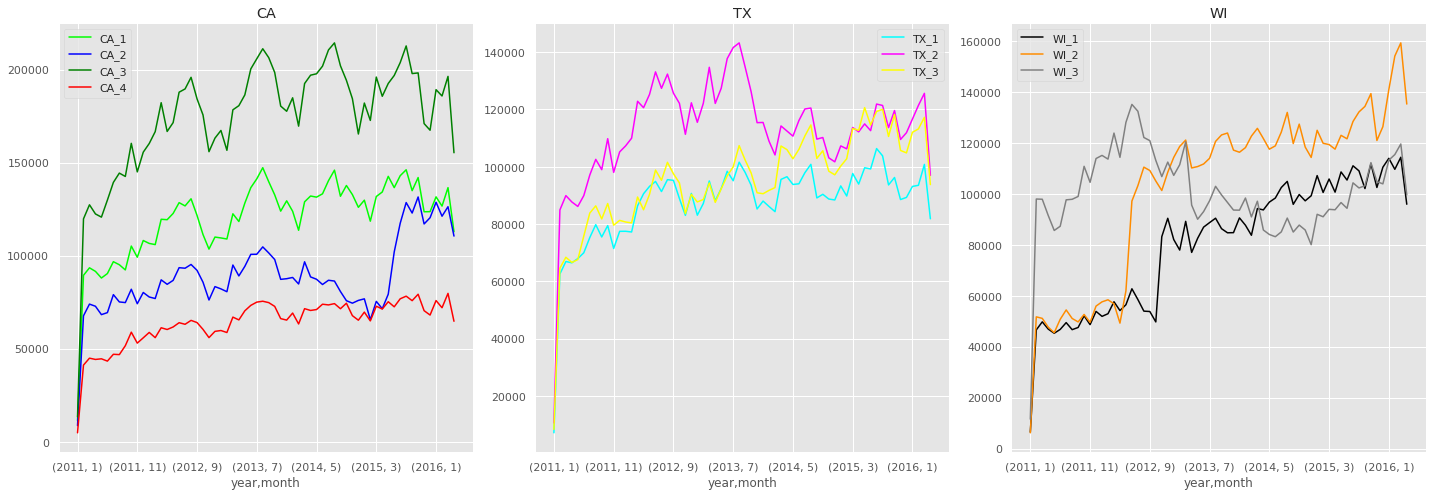

In [ ]:
two_level_plotter(['state_id','store_id'])

**Observation**
1. By breaking the sales by state and store, we can get the clear comparision on store's sales at differnt states, At california CA_3 is having more sales than other branches and it clearly shows seasonality.
2. After that CA_1 is nect to it, it also shows seasonality, then CA_2 that has much lesser sales than first two and it also has very low sales during 2015. Then CA_4, it has very low sales than others from the state and slightly trending upwards.
3. There are three stores in texas Tx_2 having more than than other two at 2012 and 2013, after that it's almost overlapping with other two states.
4. There are three stores in wisconsin where WI_2 having more sales it has low sales during 2011, after that it's sales tripled up at 2012 and trending upwards, WI_1 is also like WI_1 but it's sales is doubled at 2012 and then trending upwards. Meanwhile at WI_3 the sales is more during 2011 and it's sales reduced at 2013 and 2014 and shows slight increasing at 2015 and 2016. So there is lot chance at sales at one store affect others at Wisconsin.  

**Sales by store and categories**

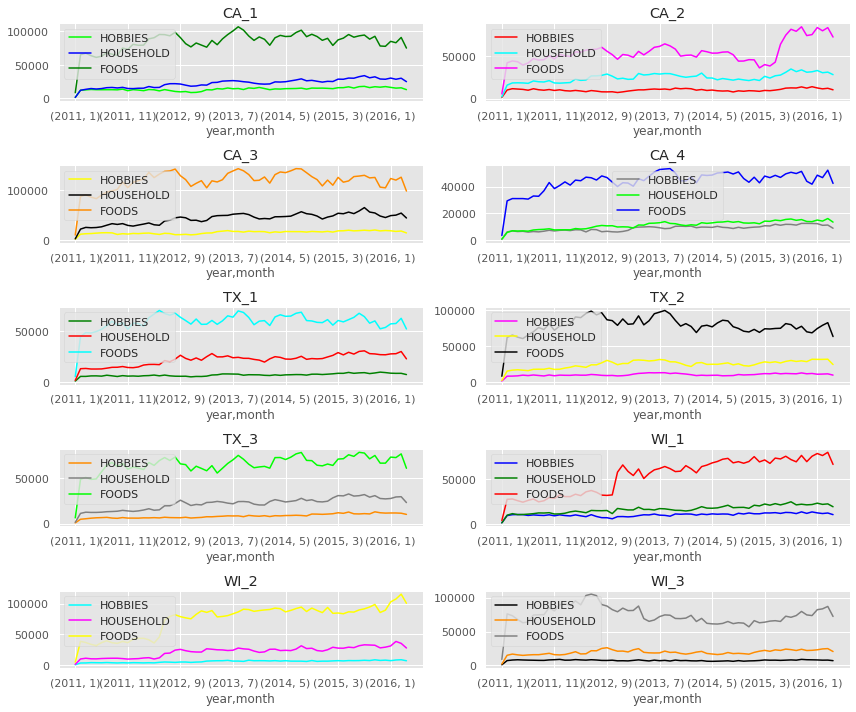

In [ ]:
# The below code snippet breaks the sales unit into categories and into departments and plots it.
fig,axs = plt.subplots(5,2,figsize=(12,10))
r=0
c=0
for i in sales_train_validation['store_id'].unique():
  categories = []
  for j in sales_train_validation['cat_id'].unique():  
    categories.append(j)
    selected_columns = [column for column in sales_data_ym.columns if i in column and j in column]
    ax = sales_data_ym[selected_columns]\
    .sum(axis=1)\
    .plot(ax=axs[r][c],color = next(color_cycle),title= i)
  ax.legend(categories)    
  if c == 1:
    c = 0
    r += 1
  else:
    c += 1
plt.tight_layout()

**Observation**
1. Sales of Foods is more at all the stores, after that Household slightly trending upwards at all the stores and Hobbies shows almost same sales through the year at all the stores.
2. The sales proportion of these three catagories is same at all the stores except at CA_2, the sales of foods is decreased till 2015 and increased by 2016.
3. As we seen in the prevuoys plot, the sales of food is less at WI_1 after 2012 that makes the sales to be less at that store.
4. Since the sales of food is 3-5 times greater than household and hobbies, the sales of food department largely impacts the growth percentage. 

**Sales by category and department**

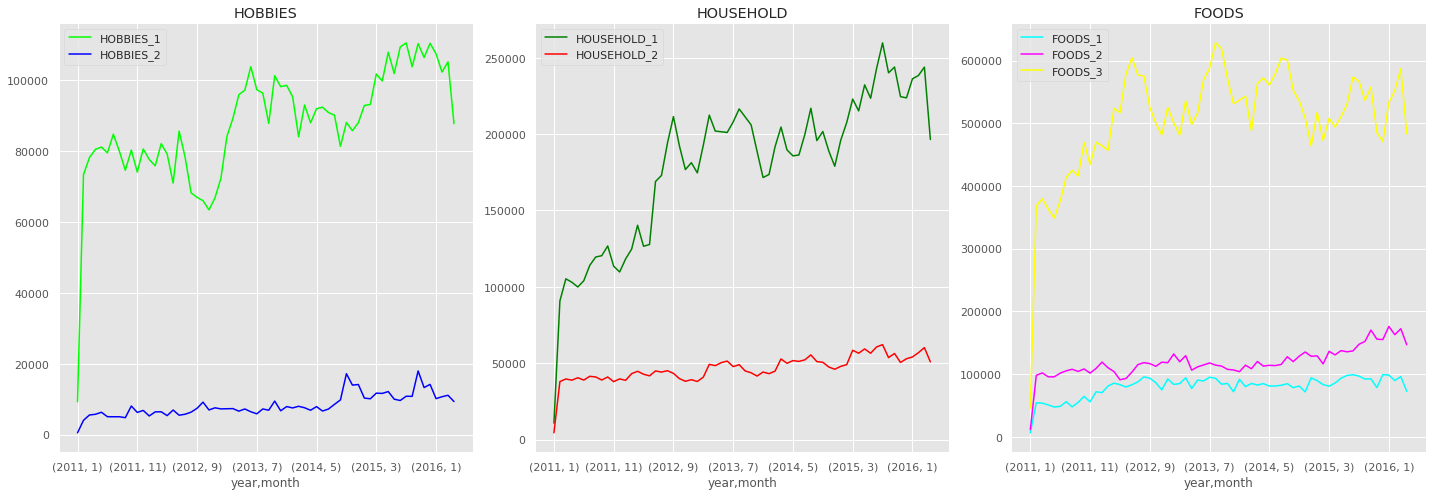

In [ ]:
# The below code break the sales units to category and to department then plot it
fig,axs = plt.subplots(1,3,figsize=(20,7))
k=0
for i in sales_train_validation['cat_id'].unique():
  department = []
  for j in sales_train_validation['dept_id'].unique():
    if(i in j):
      department.append(j)
      selected_columns = [column for column in sales_data_ym.columns if j in column]
      ax = sales_data_ym[selected_columns]\
      .sum(axis=1)\
      .plot(ax=axs[k],color = next(color_cycle),title = i)
  ax.legend(department)
  k+=1

plt.tight_layout()

**Observation**
1. By breaking sales into category and department, we can seethat one department(Hobbies_1 from hobbies,household_1 from househole and foods_3 from foods) has huge sales than others at all categories and it's trending upwards and also has seasonality.
2. Sales Foods_3 is decreasing after 2013. So the decrease in sales at store WI_3(As seen at sales by state and store plot) is heavily impaced bt Food_3
3. Other department at all the categories is very very low and slightly trending upwards.

**Calendar related analysis**


Now let's looks at for how long we have the training data

In [ ]:
# This code snippet shows start and end date of the total dataset that we have
time_period_head = calender.sort_values(by = 'date').head(2)
time_period_tail = calender.sort_values(by = 'date').tail(2)
time_period = pd.concat([time_period_head,time_period_tail])
time_period[['date','weekday','wday','month','year']].head(10)

date   weekday  wday  month  year
0     2011-01-29  Saturday     1      1  2011
1     2011-01-30    Sunday     2      1  2011
1967  2016-06-18  Saturday     1      6  2016
1968  2016-06-19    Sunday     2      6  2016

We have data for 5.5 years starts' from jan 1st 2011 and ends at june 19th 2016 from which first first 1913 days is training, next 28 is validation and next 28 is test/evaluation dataset 

**Let's look at how sales trend is changing for each year and also how the sales pattern follows for each month of the year**

In [ ]:
# This code snippet set id as index and transforms it 
# then merge it with calender dataframe and set date as index
sales_data_year = sales_train_validation.set_index('id')[day_columns].T\
.merge(calender.set_index('d'),
       left_index=True,
        right_index=True,
        validate='1:1')\
        .set_index('date')

# This code plot the sales for each year
figure = plotly.subplots.make_subplots(rows=6,cols=1)
j = 0
for i in calender['year'].unique():
  selected_columns_vaidation = [column for column in sales_data_year.columns if 'validation' in column]
  selected_columns = selected_columns_vaidation + ['year']
  selected_columns_data = sales_data_year[selected_columns]
  ax = selected_columns_data.loc[selected_columns_data['year'] == i]
  ax = ax[selected_columns_vaidation]\
  .sum(axis=1)

  figure.add_trace(go.Scatter(x=ax.index,y=ax.values,mode='lines',marker=dict(color=next(color_cycle)),name=str(i)),row=j+1,col=1)
  j += 1


In [ ]:
# figure.update_layout(height = 1100,width=900)
# figure.show()

**Note: The below image is snap of actual plot graph. Run the above two cells if you want to have real time interaction**

![](https://drive.google.com/uc?export=view&id=1R878QFxhA0Jrf4EBxmfBpcNOJ8BHopVU)


**Observation**
1. We can clearly see the weekly seasonality by breaking the sales by year and at December 25th sales is Zero because of holiday.
2. The sales during september to november seems to be high for every year.


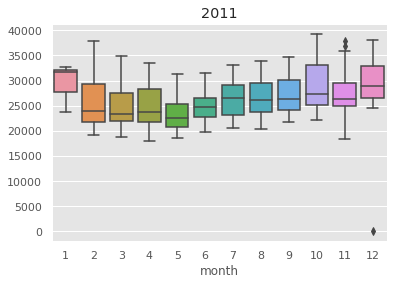

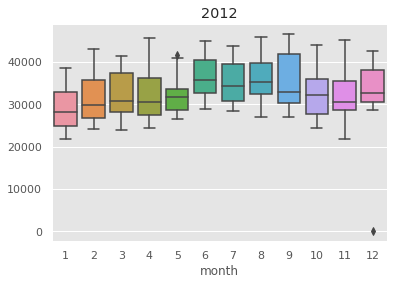

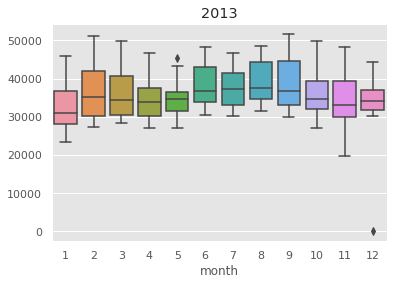

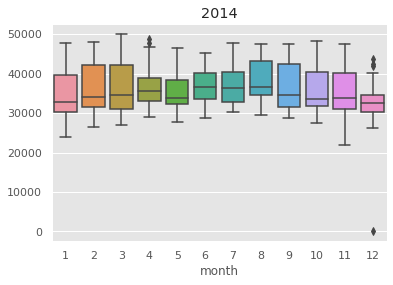

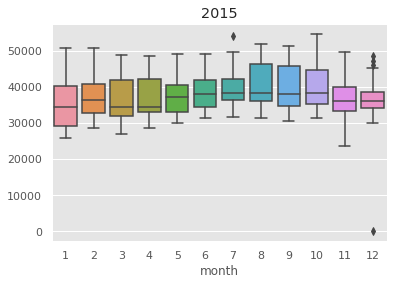

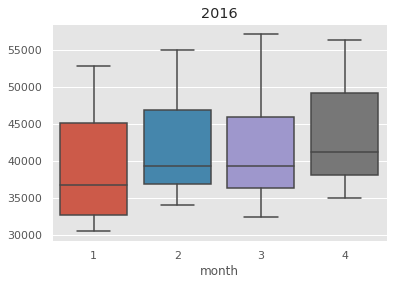

In [ ]:
# The below code plots sales for each year by months understand monthly seasonality using box plots
for i in calender['year'].unique():
  selected_columns_validation = [column for column in sales_data.columns if 'validation' in column]
  selected_columns = selected_columns_validation + ['year','month']
  selected_columns_data = sales_data[selected_columns]
  ax = selected_columns_data.loc[selected_columns_data['year'] == i]
  ax = ax.drop('year',axis=1)
  sns.boxplot(x=ax['month'],y=ax[selected_columns_validation].sum(axis=1)).set_title(i)
  plt.show()

**Observation**
1. Again by break sales for each year by months but by  using the box plot we can clearly see that sales is increasing for last three months at 2011 and for 2012-2015 the sales is increasing during June to December.

**Let's look at the percentage of sales happening on each month per year**

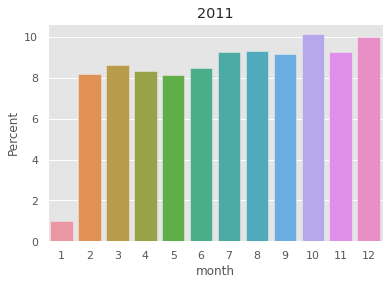

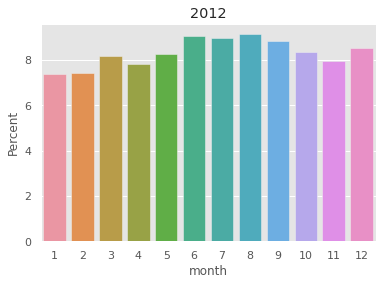

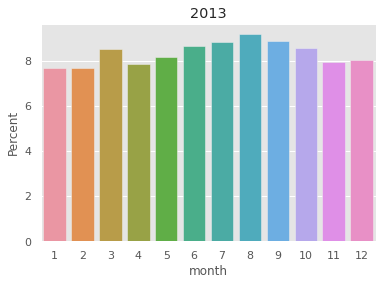

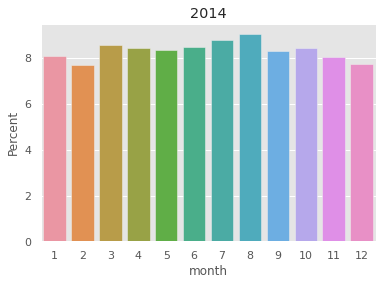

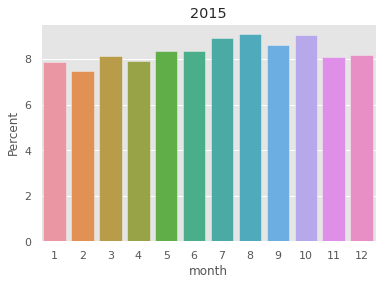

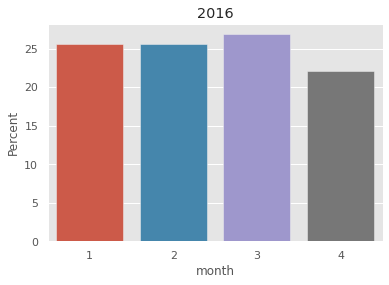

In [ ]:
# The below code plots sales for each year by months understand monthly seasonality using box plots
for i in calender['year'].unique():
    selected_columns_validation = [column for column in sales_data.columns if 'validation' in column]
    selected_columns = selected_columns_validation + ['year','month']
    selected_columns_data = sales_data[selected_columns]
    ax = selected_columns_data.loc[selected_columns_data['year'] == i]
    overall_year_sale = np.sum(ax.drop(['year','month'],axis=1).sum().values)
    ax = ax.drop('year',axis=1)
    ax = ax.groupby(['month']).sum().T
    ax = ax.sum()
    df = pd.DataFrame({'month':list(dict(ax).keys()),'sales':[(i/overall_year_sale)*100 for i in dict(ax).values()]})
    ax = sns.barplot(x='month', y="sales", data=df)
    ax.set(ylabel="Percent")
    ax.set_title(i)
    plt.show()

**Observation**
1. As we see from the above plots is that the sales is more than 8% from june to october for most of years except for 2011 where the sales is high on Q4(i.e Oct,Nov and Dec).
2. We have only first four months for 2016.

**Let's look for weekly seasonality for random months from specific year**

In [ ]:
# This code randomly pick 6 months for specific year and plots it
months = calender['month'].unique()
# months = months[random.sample(range(0,len(months)),6)]
figure = plotly.subplots.make_subplots(rows=6,cols=2)
cnt = 0
j = 0
k = 0
year_val = 2012
for i in range(12):
  selected_columns_validation = [column for column in sales_data.columns if 'validation' in column]
  selected_columns = selected_columns_validation + ['year','month']
  selected_columns_data = sales_data[selected_columns]
  selected_columns_data = selected_columns_data.loc[selected_columns_data['year'] == year_val]
  ax  = selected_columns_data.loc[selected_columns_data['month'] == months[i]]
  ax = ax[selected_columns_validation]\
  .sum(axis=1)
  if(cnt == 6):
    j = 1
    k = 0
  figure.add_trace(go.Scatter(x=ax.index,y=ax.values,mode='lines',marker=dict(color=next(color_cycle)),name=str(months[i])),row=k+1,col=j+1)
  cnt += 1
  k += 1

In [ ]:
# figure.update_layout(height = 1100,width=900,title = f'Monthly seasonality for the Year {year_val}')
# figure.show()

**Note: The below image is snap of actual plot graph. Run the above two cells if you want to have real time interaction**

![](https://drive.google.com/uc?export=view&id=1zelXMIRlC1FcUBTEmPDvnbYDhC_Qxsbo)


**Observations**
1. As you see in the above plots that the sales if very high of week ends for all the months and low on weekdays(most likely tuesday, wednesday and thurs day) where is sales is low like 25% less compared to weekend 
2. While at december teh sales is high but little bit less than other months on weekends and seems like medium on weekdays but for 2 days it's zero during christmas.

**Percentile value for each month of same year as above**

In [ ]:
def number_to_month(month_num):
  """This function returns names for month based on month number just for readeability"""
  return {
        1 :'Jan',
        2:'Feb',
        3:'Mar',
        4:'Apr',
        5:'May',
        6:'Jun',
        7:'Jul',
        8:'Aug',
        9:'Sep', 
        10:'Oct',
        11:'Nov',
        12:'Dec'
        }[month_num]

In [ ]:
# Printig the 25th,50th,75th, and 100th percitile value for all the months for the same year
months = calender['month'].unique()
for i in range(12):
    selected_columns_validation = [column for column in sales_data.columns if 'validation' in column]
    selected_columns = selected_columns_validation + ['year','month']
    selected_columns_data = sales_data[selected_columns]
    selected_columns_data = selected_columns_data.loc[selected_columns_data['year'] == year_val]
    ax  = selected_columns_data.loc[selected_columns_data['month'] == months[i]]
    ax = ax[selected_columns_validation].sum(axis=1)
    print(f"The 0th,25th,50th,75th and 100th percentile values for the month {number_to_month(i+1)} are ",np.percentile(ax.values,0),np.percentile(ax.values,25),np.percentile(ax.values,50),np.percentile(ax.values,75),np.percentile(ax.values,100))

    

The 0th,25th,50th,75th and 100th percentile values for the month Jan are  21807.0 24919.5 28206.0 32820.0 38578.0
The 0th,25th,50th,75th and 100th percentile values for the month Feb are  24115.0 26878.0 29851.0 35769.0 43029.0
The 0th,25th,50th,75th and 100th percentile values for the month Mar are  23879.0 28224.5 30752.0 37391.5 41319.0
The 0th,25th,50th,75th and 100th percentile values for the month Apr are  24448.0 27435.0 30467.0 36188.5 45638.0
The 0th,25th,50th,75th and 100th percentile values for the month May are  26623.0 28741.0 31758.0 33623.0 41529.0
The 0th,25th,50th,75th and 100th percentile values for the month Jun are  28885.0 32633.75 35725.5 40384.25 44944.0
The 0th,25th,50th,75th and 100th percentile values for the month Jul are  28354.0 30864.0 34408.0 39543.0 43689.0
The 0th,25th,50th,75th and 100th percentile values for the month Aug are  27101.0 32347.5 35260.0 39737.5 45798.0
The 0th,25th,50th,75th and 100th percentile values for the month Sep are  26932.0 3036

**Observations**
1. From the above printed statements we can clearly see that 25 th percentile is somewhat high and 50th and 75th is also somewhat high and 100th percentile is lower than most of other months

**Let's look at at weekly seasonality of december month for all the years**

In [ ]:
# This code randomly pick 6 months for specific year and plots it
months = calender['month'].unique()
years = calender['year'].unique()
figure = plotly.subplots.make_subplots(rows=len(years),cols=1)
for i in range(len(years)):
    selected_columns_validation = [column for column in sales_data.columns if 'validation' in column]
    selected_columns = selected_columns_validation + ['year','month']
    selected_columns_data = sales_data[selected_columns]
    selected_columns_data = selected_columns_data.loc[selected_columns_data['year'] == years[i]]
    ax  = selected_columns_data.loc[selected_columns_data['month'] == 12]
    ax = ax[selected_columns_validation]\
    .sum(axis=1)
    figure.add_trace(go.Scatter(x=ax.index,y=ax.values,mode='lines',marker=dict(color=next(color_cycle)),name=str(months[i])),row=i+1,col=1)

In [ ]:
# figure.update_layout(height = 1100,width=900)
# figure.show()

**Note: The below image is snap of actual plot graph. Run the above two cells if you want to have real time interaction**

![](https://drive.google.com/uc?export=view&id=169XhAG3FmdSta5FMMAGrcunfTZNs0Eyx)


**Observations**

1. from the above plots we can clearly observe that sales is higher on weekends and little lower(almost 10%) on week days, 
    zero on two days.

**Let's look at the percentage of sales  on december of each year by week**

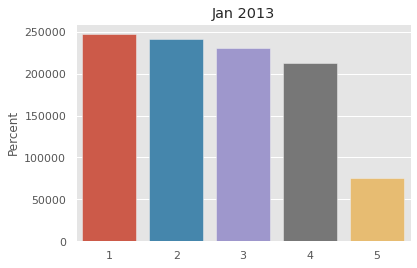

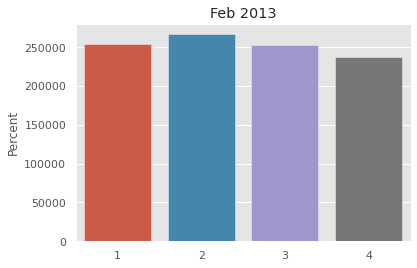

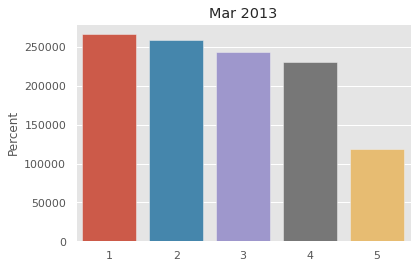

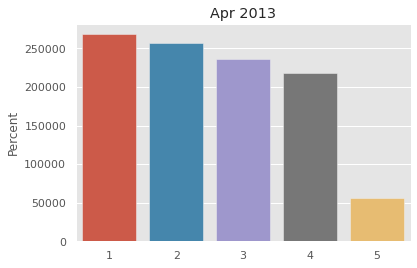

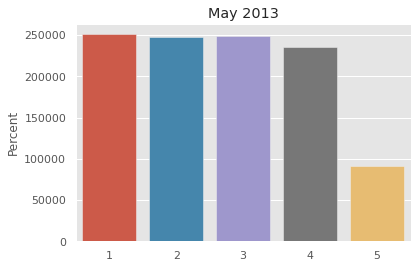

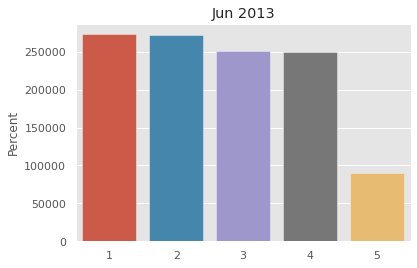

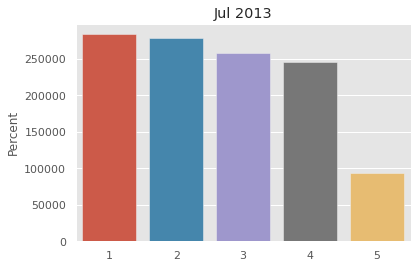

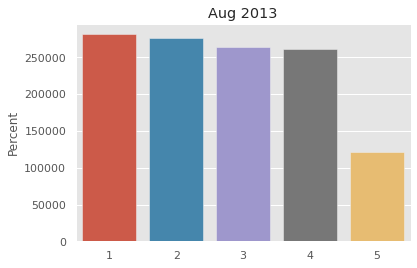

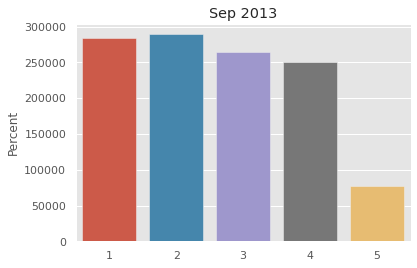

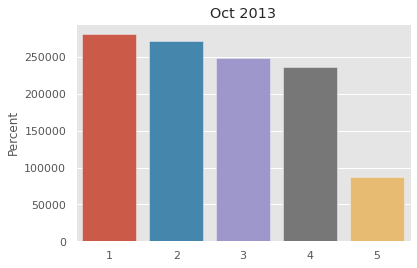

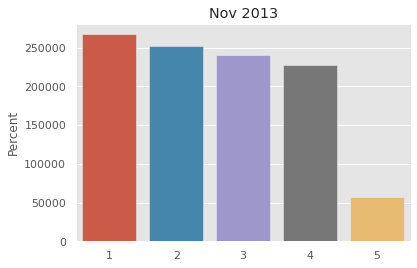

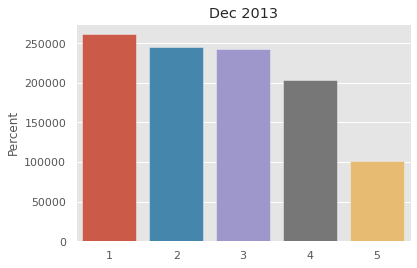

In [ ]:
months = calender['month'].unique()
years = calender['year'].unique()
year = years[2]
selected_columns_validation = [column for column in sales_data.columns if 'validation' in column]
selected_columns = selected_columns_validation + ['year','month']
selected_columns_data = sales_data[selected_columns]
selected_columns_data = selected_columns_data.loc[selected_columns_data['year'] == year]
for month in range(1,13):
    ax  = selected_columns_data.loc[selected_columns_data['month'] == month]
    ax = ax[selected_columns_validation].sum(axis=1)
    new_df = pd.DataFrame({'date':ax.index,'sales':ax.values,'week_of_month':[math.ceil(i) for i in list(pd.to_datetime(ax.index).day/7)],'month':pd.to_datetime(ax.index).month,'year':pd.to_datetime(ax.index).year})
    new_df = new_df.groupby(['week_of_month','month','year']).sum()
    ax = sns.barplot(x=[i for i in range(1, len(new_df.values)+1)], y=[i[0] for i in new_df.values])
    ax.set(ylabel="Percent")
    ax.set_title(f'{number_to_month(month)} {year}')
    plt.show()

**Observations**
1. The above plot clearly shows that the sales is hig to lower as we move from 1st week to last week of the month, so features based on this can give good results

**Let's dig into 4 weeks of particular month** 

In [ ]:
def number_to_month(month_num):
  """This function returns names for month based on month number just for readeability"""
  return {
        1 :'Jan',
        2:'Feb',
        3:'Mar',
        4:'Apr',
        5:'May',
        6:'Jun',
        7:'Jul',
        8:'Aug',
        9:'Sep', 
        10:'Oct',
        11:'Nov',
        12:'Dec'
        }[month_num]

In [ ]:
def weekly_pattern(year,month):
  """This functions takes two years as list and month as single value 
  and break the sales accordinly and plot week under the specified month"""
  fig,axs = plt.subplots(4,2,figsize=(15,8))
  selected_columns_validation = [column for column in sales_data.columns if 'validation' in column]
  selected_columns = selected_columns_validation + ['year','month','weekday','wm_yr_wk']
  for j in range(len(year)):
    selected_columns_data = sales_data[selected_columns]
    ax = selected_columns_data.loc[((selected_columns_data['year'] == year[j]) & (selected_columns_data['month'] == month))]
    week_num = ax['wm_yr_wk'].unique()
    for i in range(4):
      ax1 = ax[ax['wm_yr_wk'] == week_num[i]].set_index('weekday')
      ax1 = ax1[selected_columns_validation]\
      .sum(axis=1)\
      .plot(ax = axs[i][j],color = next(color_cycle),title = f'{number_to_month(month)} - {year[j]}')
  plt.tight_layout()

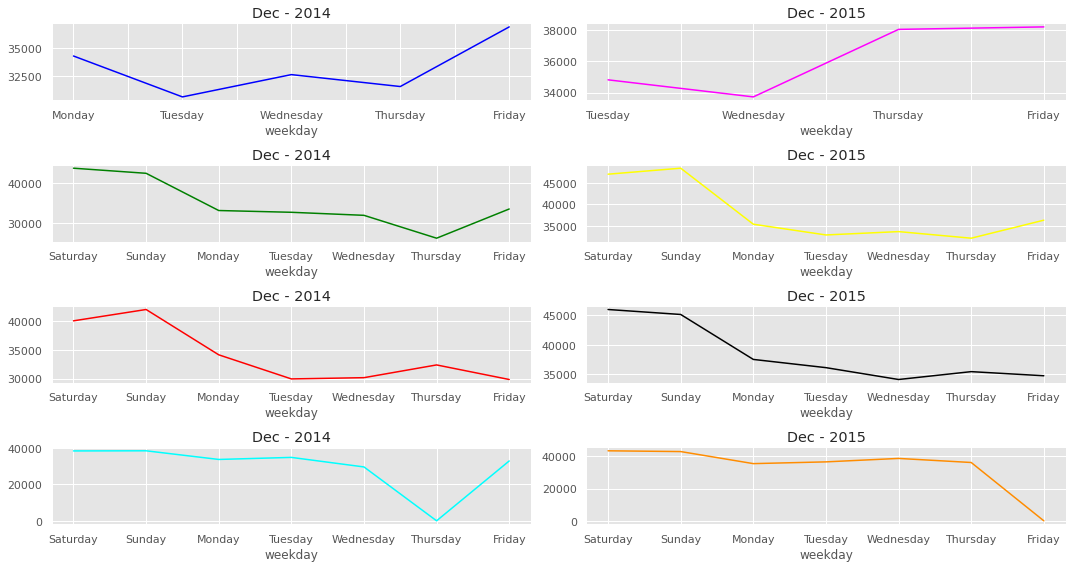

In [ ]:
weekly_pattern([2014,2015],12)

**Observations**
1. In the above plot represents 4 weeks sales from specific year and month, the sales almost follows same pattern for both years.
2. The sales is high during weekends and medium on monday and friday and high on week ends, if we notice carefully is high for whole during christmas other wise it follow same pattern as week of other months.

**Below Heatmap shows seasonal information for year**

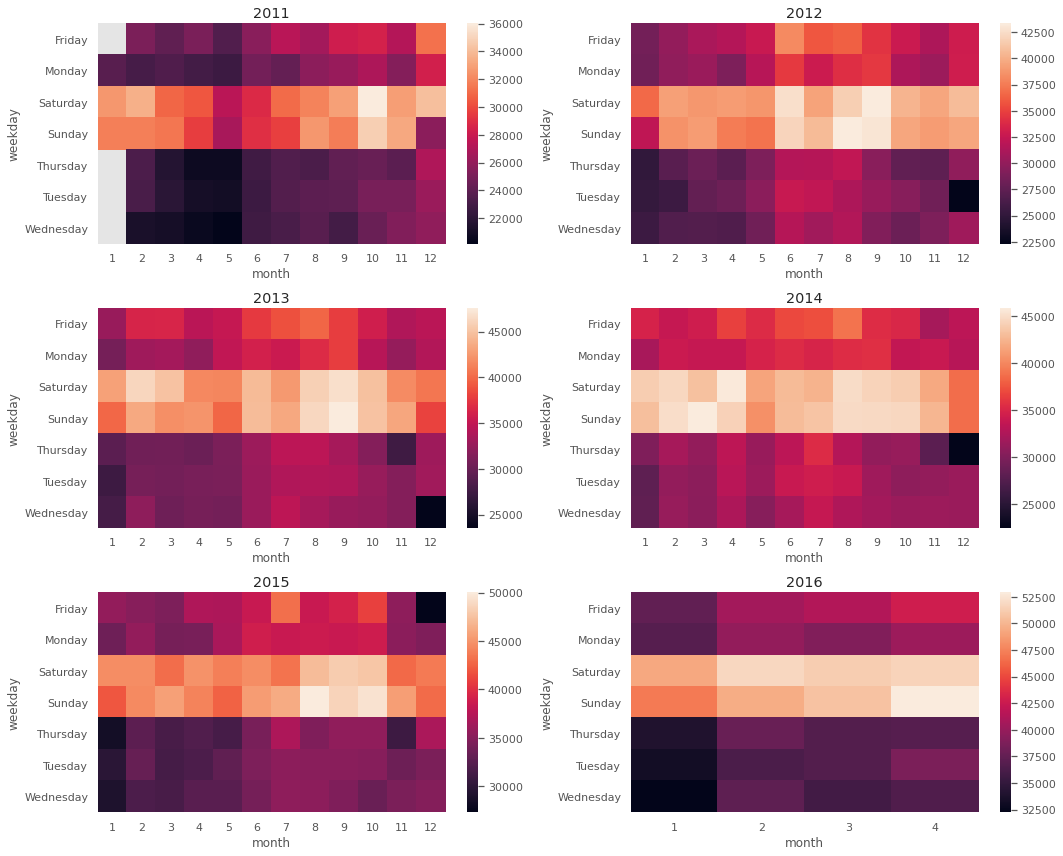

In [ ]:
# The below code snippet plot the year with sales using heat mean so that 
# we can see the seasnal information for each year
r,c = 0,0
fig,axs = plt.subplots(3,2,figsize=(15,12))
for i in calender['year'].unique():
  selected_columns_validation = [column for column in sales_data.columns if 'validation' in column]
  selected_columns = selected_columns_validation + ['year','month','weekday']
  selected_columns_data = sales_data[selected_columns]
  ax = selected_columns_data.loc[selected_columns_data['year'] == i]
  ax1 = selected_columns_data.loc[selected_columns_data['year'] == i][selected_columns_validation].sum(axis=1).to_frame()
  ax = ax.merge(ax1, left_index=True,right_index=True)

  heatmap_data = pd.pivot_table(ax, values=0, 
                     index=['weekday'], 
                     columns='month')
  sns.heatmap(heatmap_data,ax = axs[r][c]).set(title=i)
  if c == 1:
    c = 0
    r += 1
  else:
    c += 1
plt.tight_layout()


**Observations**
1. This plot also give same information as previous discussed, here it shows everything at single plot for each year.
2. The sales is sales at week end for all the year and month and moderate sales during friday and very low during tuesday, wednesday and thruday

**Let's looks seasonality by category for last three years**

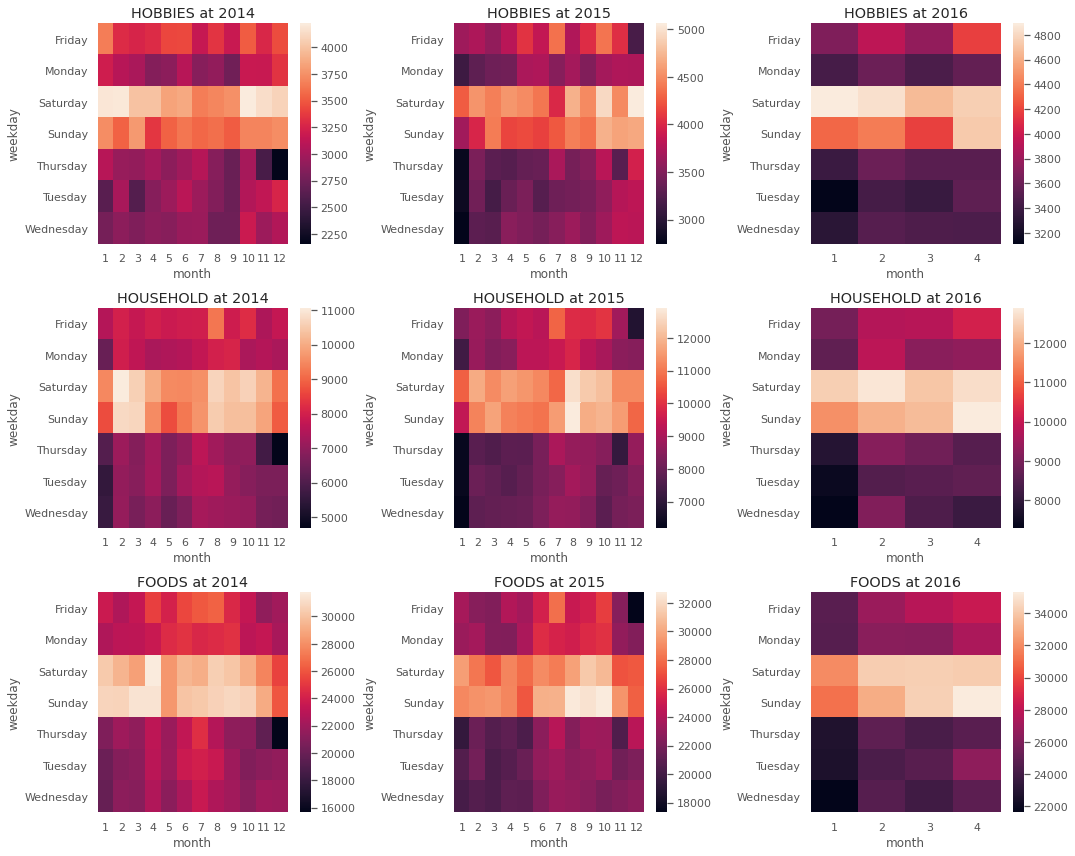

In [ ]:
# The below code snippets breaks the sales units by categories and plots last three years sales
# to get the seasonal information at department level
r,c = 0,0
fig,axs = plt.subplots(3,3,figsize=(15,12))
for i in sales_train_validation['cat_id'].unique():
  for j in [2014,2015,2016]:
    selected_columns_validation = [column for column in sales_data.columns if i in column]
    selected_columns = selected_columns_validation + ['year','month','weekday']
    selected_columns_data = sales_data[selected_columns]
    ax = selected_columns_data.loc[selected_columns_data['year'] == j]
    ax1 = selected_columns_data.loc[selected_columns_data['year'] == j][selected_columns_validation].sum(axis=1).to_frame()
    ax = ax.merge(ax1, left_index=True,right_index=True)
    heatmap_data = pd.pivot_table(ax, values=0, 
                      index=['weekday'], 
                      columns='month')
    sns.heatmap(heatmap_data,ax = axs[r][c]).set(title=str(i)+' at '+str(j))
    if c == 2:
      c = 0
      r += 1
    else:
      c += 1   
plt.tight_layout()


**Observations**
1. The above plot shows seasoality information for three categories of products. The the most comman is all of them have high sales during weekends. At 2014 sales is sightly moderate for all the three at friday and monday.

**Analyzing the effect of events**

**Let's take a look how many days are with and without events**

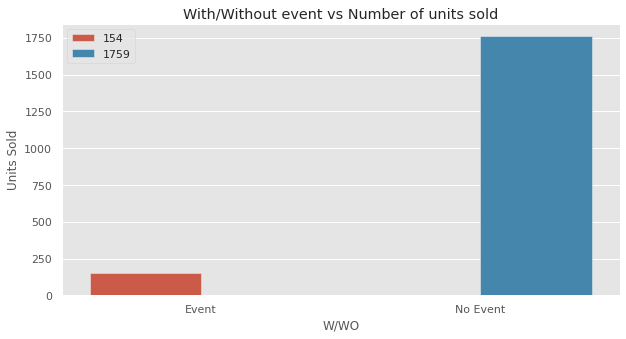

In [ ]:
# The below code snipped plot number of Event(special days) and Non Event days
event_columns = ['event_type_1','event_type_2']
event_data = sales_data[event_columns]
event_data = event_data.fillna(0)
plt.figure(figsize=(10,5))
y=[event_data.shape[0]-event_data.loc[(event_data == 0).all(axis=1)].shape[0],event_data.loc[(event_data == 0).all(axis=1)].shape[0]]
ax = sns.barplot(x=['Event','No Event'],y=y,hue=y)
ax.set_title('With/Without event vs Number of units sold')
ax.set(xlabel='W/WO',ylabel='Units Sold')
plt.show()

**Observation**
1. In this 5.5 years of data set i.e 1913 days 154 days are special days

**Those type of events are**

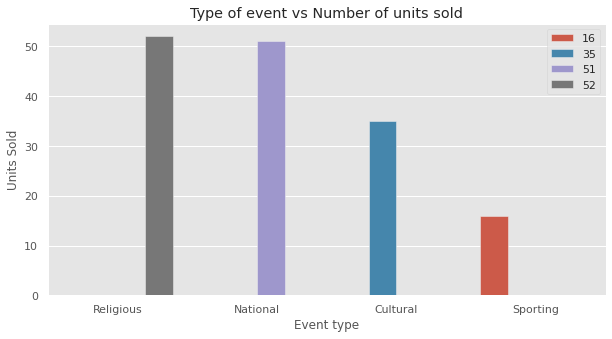

In [ ]:
# This code snipped plots number of days from each event type
x,y=list(dict(event_data.loc[(event_data != 0).any(axis=1)]['event_type_1'].value_counts()).keys()),list(dict(event_data.loc[(event_data != 0).any(axis=1)]['event_type_1'].value_counts()).values())
plt.figure(figsize=(10,5))
ax = sns.barplot(x=x,y=y,hue=y)
ax.set_title('Type of event vs Number of units sold')
ax.set(xlabel='Event type',ylabel='Units Sold')
plt.show()

**Observations**
1. Those types of events are Religious, National, Cultural and sporting.
2. Religious and National are high, then next cultural day and then sporting days.

**Now let's take a look on how sales trend will be with and without events over years**

In [ ]:
# The below code snippet takes columns with sales units and event type columns and gets data
validation_columns = [i for i in sales_data_year.columns if 'validation' in i]
event_data = sales_data_year[['event_type_1','event_type_2']]
validation_data = sales_data_year[validation_columns].sum(axis=1).to_frame()
event_data = event_data.merge(validation_data,left_index=True,right_index=True)
event_data = event_data.fillna(0)

In [ ]:
# These lines of code creates a dictnary and loads sales for each event type
selected_columns_data_event1 = event_data.loc[(event_data[['event_type_1']] != 0).any(axis=1)].groupby(['event_type_1']).sum()
selected_columns_data_event2= event_data.loc[(event_data[['event_type_2']] != 0).any(axis=1)].groupby(['event_type_2']).sum()
x = list(selected_columns_data_event1.index) + list(selected_columns_data_event2.index) 
y = [i[0] for i in selected_columns_data_event1.values] + [i[0] for i in selected_columns_data_event2.values]
data_dict = {}
for i in range(len(x)):
  if x[i] not in data_dict:
    data_dict[x[i]] = y[i]
  else:
    data_dict[x[i]] += y[i]

In [ ]:
# The below code snippet creates two dataframes, one with event data and one without event data and plot 
# line chart to compare sales between them and also plots bat chart to know about sales at each event type
selected_columns_validation = [column for column in sales_data_year.columns if 'validation' in column]
selected_columns = selected_columns_validation + ['year','event_type_1','event_type_2']
selected_columns_data = sales_data_year[selected_columns].fillna(0)
selected_columns_data_event = selected_columns_data.groupby('year').sum()
ax = selected_columns_data_event[selected_columns_validation]

selected_columns_data_no_event = selected_columns_data.loc[(selected_columns_data[['event_type_1','event_type_2']] == 0).all(axis=1)] 
selected_columns_data_no_event = selected_columns_data_no_event.groupby('year').sum()
ax1 = selected_columns_data_no_event[selected_columns_validation]

figure = plotly.subplots.make_subplots(rows=1,cols=2,subplot_titles=['Event vs No event','Sales on Events'])
figure.add_trace(go.Scatter(x=list(ax.index),y=[list_val.sum() for list_val in ax.values],mode='lines',marker=dict(color=next(color_cycle)),name='event'),row=1,col=1)
figure.add_trace(go.Scatter(x=list(ax1.index),y=[list_val.sum() for list_val in ax1.values],mode='lines',marker=dict(color=next(color_cycle)),name='No event'),row=1,col=1)
figure.add_trace(go.Bar(x=list(data_dict.keys()),y=list(data_dict.values()),name='Event types'),row=1,col=2)
figure.update_layout(height = 400,width=600)
figure.show()

**Note: The below image is snap of actual plot graph. Run the above two cells if you want to have real time interaction**



![](https://drive.google.com/uc?export=view&id=1EgzrOCH2_KZLgDs6AiqlCGIHuzowhBQF) 

**Observations**
1. In the above line plot we can see there is almost 10% high sales with Eventdays so those 154 special days contributes 10% of total sales units, except at 2011 and for 2016 we have just 4 months of data, so just ignore it.
2. In the above bar plot we can clearly see that religious days contributes to more sales, followed by cultural, national and sporting.

**Break sales for particular year by month to checkout how it affects the sales**

In [ ]:
# The below code snippet takes columns with sales units and event type columns and gets data
validation_columns = [i for i in sales_data_year.columns if 'validation' in i]
event_data = sales_data_year[['event_type_1','event_type_2','year']]
event_data = event_data.loc[(event_data['year']==2013)].drop('year',axis=1)
validation_data = sales_data_year[validation_columns].sum(axis=1).to_frame()
event_data = event_data.merge(validation_data,left_index=True,right_index=True)
event_data = event_data.fillna(0)


In [ ]:
# These lines of code creates a dictnary and loads sales for each event type
selected_columns_data_event1 = event_data.loc[(event_data[['event_type_1']] != 0).any(axis=1)].groupby(['event_type_1']).sum()
selected_columns_data_event2= event_data.loc[(event_data[['event_type_2']] != 0).any(axis=1)].groupby(['event_type_2']).sum()
x = list(selected_columns_data_event1.index) + list(selected_columns_data_event2.index) 
y = [i[0] for i in selected_columns_data_event1.values] + [i[0] for i in selected_columns_data_event2.values]
data_dict = {}
for i in range(len(x)):
  if x[i] not in data_dict:
    data_dict[x[i]] = y[i]
  else:
    data_dict[x[i]] += y[i]

In [ ]:
# The below code snippet creates two dataframes for specific year, one with event data and one without event data and plot 
# line chart to compare sales between them and also plots bat chart to know about sales at each event typefigure = plotly.subplots.make_subplots(rows=1,cols=1)

selected_columns_validation = [column for column in sales_data_year.columns if 'validation' in column]
selected_columns = selected_columns_validation + ['year','month','event_type_1','event_type_2']
selected_columns_data = sales_data_year[selected_columns].fillna(0)
selected_columns_data = selected_columns_data[selected_columns_data['year'] == 2015]
selected_columns_data_event = selected_columns_data.groupby('month').sum()
ax = selected_columns_data_event[selected_columns_validation]

selected_columns_data_no_event = selected_columns_data.loc[(selected_columns_data[['event_type_1','event_type_2']] == 0).all(axis=1)] 
selected_columns_data_no_event = selected_columns_data_no_event.groupby('month').sum()
ax1 = selected_columns_data_no_event[selected_columns_validation]

figure = plotly.subplots.make_subplots(rows=1,cols=2)
figure.add_trace(go.Scatter(x=list(ax.index),y=[list_val.sum() for list_val in ax.values],mode='lines',marker=dict(color=next(color_cycle)),name='event'),row=1,col=1)
figure.add_trace(go.Scatter(x=list(ax1.index),y=[list_val.sum() for list_val in ax1.values],mode='lines',marker=dict(color=next(color_cycle)),name='No event'),row=1,col=1)
figure.add_trace(go.Bar(x=list(data_dict.keys()),y=list(data_dict.values()),name='Event types'),row=1,col=2) 

# figure.update_layout(height = 400,width=600)
# figure.show()

**Note: The below image is snap of actual plot graph. Run the above two cells if you want to have real time interaction**



![](https://drive.google.com/uc?export=view&id=1w8V2p3mxAtfUt17V0qzAHbqcZV6vnGJk)

**Observations**
1. In the above plot the sales is breaks by month for specific year, here also we can see 5-10 lesser sales with special days and there is no special day at August, so the sales is same for event and non event type.
2. Here also Relious contributes more the followed by National, Cultural and Sproting 

**Break the sales with and without events by states**

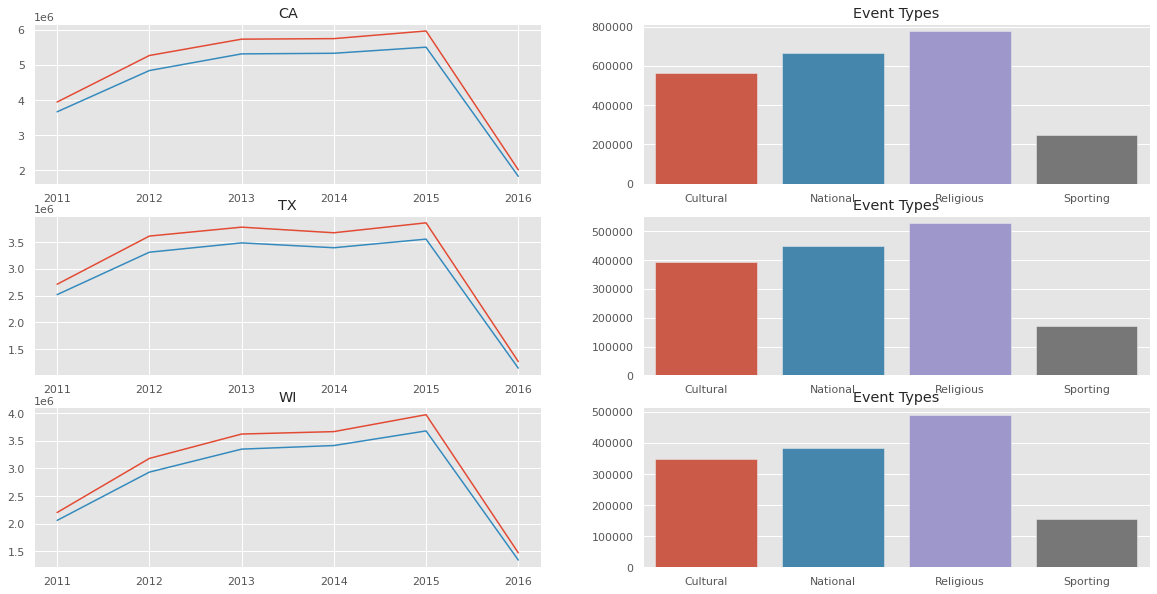

In [ ]:
# The below code snippet creates two dataframes, one with event data and one without event data and plot 
# line chart to compare sales between them and break the sales between states and also plots bar chart to know 
# about the sales at each event type
fig,axs = plt.subplots(3,2,figsize=(20,10))


sales_data_y =sales_train_validation.set_index('id')[day_columns].T
sales_data_y['d'] = sales_data_y.index
sales_data_y = sales_data_y.merge(calender,on='d').set_index('date')

sales_data_y = sales_data_y.drop(['snap_CA', 'snap_TX', 'snap_WI'],axis=1)

unique_list = sales_train_validation['state_id'].unique()
r=0
c=0
for i in unique_list:
  validation_columns = [j for j in sales_data_year.columns if 'validation' in j and i in j]
  event_data = sales_data_year[['event_type_1','event_type_2']]
  validation_data = sales_data_year[validation_columns].sum(axis=1).to_frame()
  event_data = event_data.merge(validation_data,left_index=True,right_index=True)
  event_data = event_data.fillna(0)
  
  selected_columns_data_event1 = event_data.loc[(event_data[['event_type_1']] != 0).any(axis=1)].groupby(['event_type_1']).sum()
  selected_columns_data_event2= event_data.loc[(event_data[['event_type_2']] != 0).any(axis=1)].groupby(['event_type_2']).sum()
  x = list(selected_columns_data_event1.index) + list(selected_columns_data_event2.index) 
  y = [i[0] for i in selected_columns_data_event1.values] + [i[0] for i in selected_columns_data_event2.values]
  data_dict = {}
  for k in range(len(x)):
    if x[k] not in data_dict:
      data_dict[x[k]] = y[k]
    else:
      data_dict[x[k]] += y[k]

  selected_columns_validation = [column for column in sales_data_y.columns if i in column]
  
  selected_columns  = selected_columns_validation + ['year','event_type_1','event_type_2']
  selected_columns_data = sales_data_y[selected_columns].fillna(0)
  selected_columns_data_event = selected_columns_data.groupby('year').sum()
  ax = selected_columns_data_event[selected_columns_validation]

  selected_columns_data_no_event = selected_columns_data.loc[(selected_columns_data[['event_type_1','event_type_2']] == 0).all(axis=1)] 
  selected_columns_data_no_event = selected_columns_data_no_event.groupby('year').sum()
  ax1 = selected_columns_data_no_event[selected_columns_validation]

  sns.lineplot(x=list(ax.index),y=[list_val.sum() for list_val in ax.values],ax=axs[r][c])
  sns.lineplot(x=list(ax1.index),y=[list_val.sum() for list_val in ax1.values],ax=axs[r][c]).set(title=i)
  sns.barplot(x=list(data_dict.keys()),y=list(data_dict.values()),ax=axs[r][c+1]).set(title='Event Types')
  r += 1
plt.show()


**Observation**
1. The sales comparision with and without special days is almost having same ratio between all the states and it's also applicable for event types.

**Break the sales with and without events by stores**

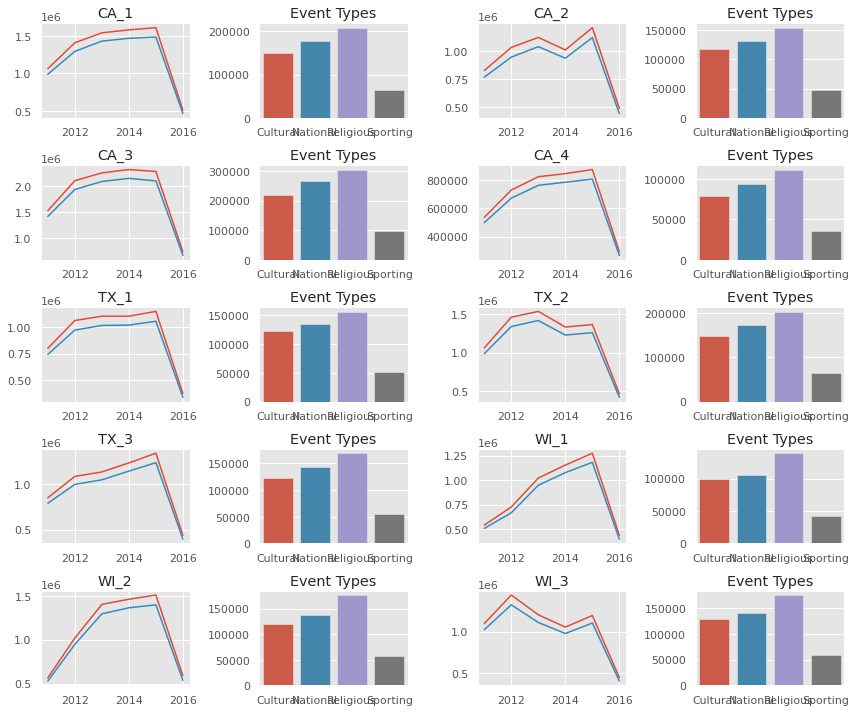

In [ ]:
# The below code snippet creates two dataframes, one with event data and one without event data and plot 
# line chart to compare sales between them and break the sales between stores and also plots bar chart to know 
# about the sales at each event type
fig,axs = plt.subplots(5,4,figsize=(12,10))
r=0
c=0
for i in sales_train_validation['store_id'].unique():

  validation_columns = [j for j in sales_data_year.columns if 'validation' in j and i in j]
  event_data = sales_data_year[['event_type_1','event_type_2']]
  validation_data = sales_data_year[validation_columns].sum(axis=1).to_frame()
  event_data = event_data.merge(validation_data,left_index=True,right_index=True)
  event_data = event_data.fillna(0)
  
  selected_columns_data_event1 = event_data.loc[(event_data[['event_type_1']] != 0).any(axis=1)].groupby(['event_type_1']).sum()
  selected_columns_data_event2= event_data.loc[(event_data[['event_type_2']] != 0).any(axis=1)].groupby(['event_type_2']).sum()
  x = list(selected_columns_data_event1.index) + list(selected_columns_data_event2.index) 
  y = [i[0] for i in selected_columns_data_event1.values] + [i[0] for i in selected_columns_data_event2.values]
  data_dict = {}
  for k in range(len(x)):
    if x[k] not in data_dict:
      data_dict[x[k]] = y[k]
    else:
      data_dict[x[k]] += y[k]



  selected_columns_vaidation = [column for column in sales_data_y.columns if i in column]

  selected_columns  = selected_columns_vaidation + ['year','event_type_1','event_type_2']
  selected_columns_data = sales_data_y[selected_columns].fillna(0)
  selected_columns_data_event = selected_columns_data.groupby('year').sum()
  ax = selected_columns_data_event[selected_columns_vaidation]

  selected_columns_data_no_event = selected_columns_data.loc[(selected_columns_data[['event_type_1','event_type_2']] == 0).all(axis=1)] 
  selected_columns_data_no_event = selected_columns_data_no_event.groupby('year').sum()
  ax1 = selected_columns_data_no_event[selected_columns_vaidation]

  sns.lineplot(x=list(ax.index),y=[list_val.sum() for list_val in ax.values],ax=axs[r][c])
  sns.lineplot(x=list(ax1.index),y=[list_val.sum() for list_val in ax1.values],ax=axs[r][c]).set(title=i)
  sns.barplot(x=list(data_dict.keys()),y=list(data_dict.values()),ax=axs[r][c+1]).set(title='Event Types')



  if c == 2:
    c = 0
    r += 1
  else:
    c += 2
plt.tight_layout()

**Observations**
1. This plot breaks sales sales between state and also compares sales with and without special days.
2. All the bar plots in above figure shows sales difference between types is same for all he store.

**Break the sales with and without events by categories**

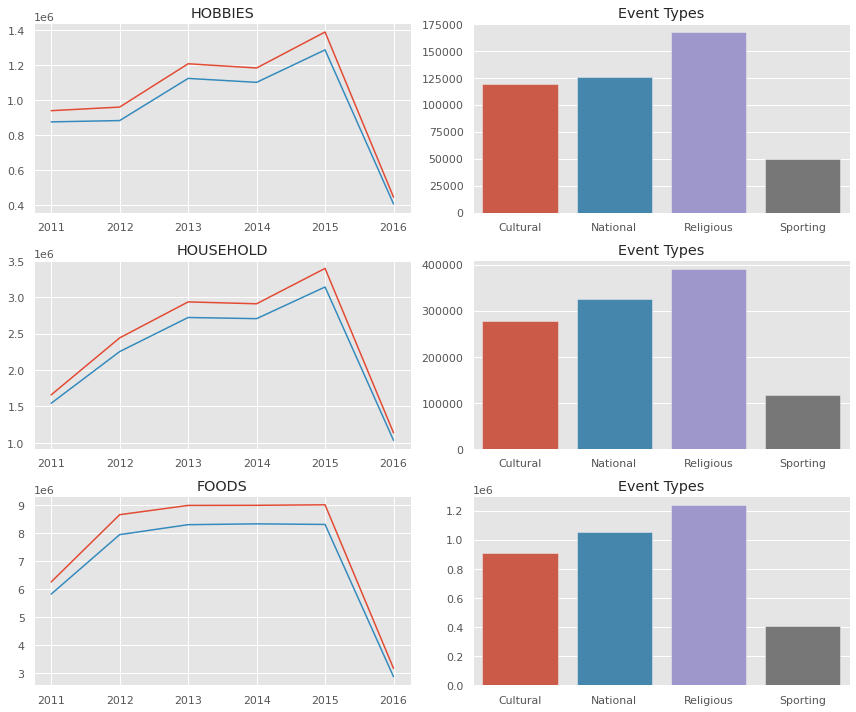

In [ ]:
# The below code snippet creates two dataframes, one with event data and one without event data and plot 
# line chart to compare sales between them and break the sales between categories and also plots bar chart to know 
# about the sales at each event type
fig,axs = plt.subplots(3,2,figsize=(12,10))
r=0
c=0
for i in sales_train_validation['cat_id'].unique():
  
  validation_columns = [j for j in sales_data_year.columns if 'validation' in j and i in j]
  event_data = sales_data_year[['event_type_1','event_type_2']]
  validation_data = sales_data_year[validation_columns].sum(axis=1).to_frame()
  event_data = event_data.merge(validation_data,left_index=True,right_index=True)
  event_data = event_data.fillna(0)
  
  selected_columns_data_event1 = event_data.loc[(event_data[['event_type_1']] != 0).any(axis=1)].groupby(['event_type_1']).sum()
  selected_columns_data_event2= event_data.loc[(event_data[['event_type_2']] != 0).any(axis=1)].groupby(['event_type_2']).sum()
  x = list(selected_columns_data_event1.index) + list(selected_columns_data_event2.index) 
  y = [i[0] for i in selected_columns_data_event1.values] + [i[0] for i in selected_columns_data_event2.values]
  data_dict = {}
  for k in range(len(x)):
    if x[k] not in data_dict:
      data_dict[x[k]] = y[k]
    else:
      data_dict[x[k]] += y[k]


  selected_columns_vaidation = [column for column in sales_data_y.columns if i in column]

  selected_columns  = selected_columns_vaidation + ['year','event_type_1','event_type_2']
  selected_columns_data = sales_data_y[selected_columns].fillna(0)
  selected_columns_data_event = selected_columns_data.groupby('year').sum()
  ax = selected_columns_data_event[selected_columns_vaidation]

  selected_columns_data_no_event = selected_columns_data.loc[(selected_columns_data[['event_type_1','event_type_2']] == 0).all(axis=1)] 
  selected_columns_data_no_event = selected_columns_data_no_event.groupby('year').sum()
  ax1 = selected_columns_data_no_event[selected_columns_vaidation]

  sns.lineplot(x=list(ax.index),y=[list_val.sum() for list_val in ax.values],ax=axs[r][0])
  sns.lineplot(x=list(ax1.index),y=[list_val.sum() for list_val in ax1.values],ax=axs[r][0]).set(title=i)
  sns.barplot(x=list(data_dict.keys()),y=list(data_dict.values()),ax=axs[r][1]).set(title='Event Types')

  r += 1

plt.tight_layout()

**Observations**
1. This plot breaks the sales into categories and also comparing the sales with and without special days, here also we see 10% percent high sales with special days.
2. Differce of sales is also same as previously discussed plots.

**Break the sales with and without events by departments**

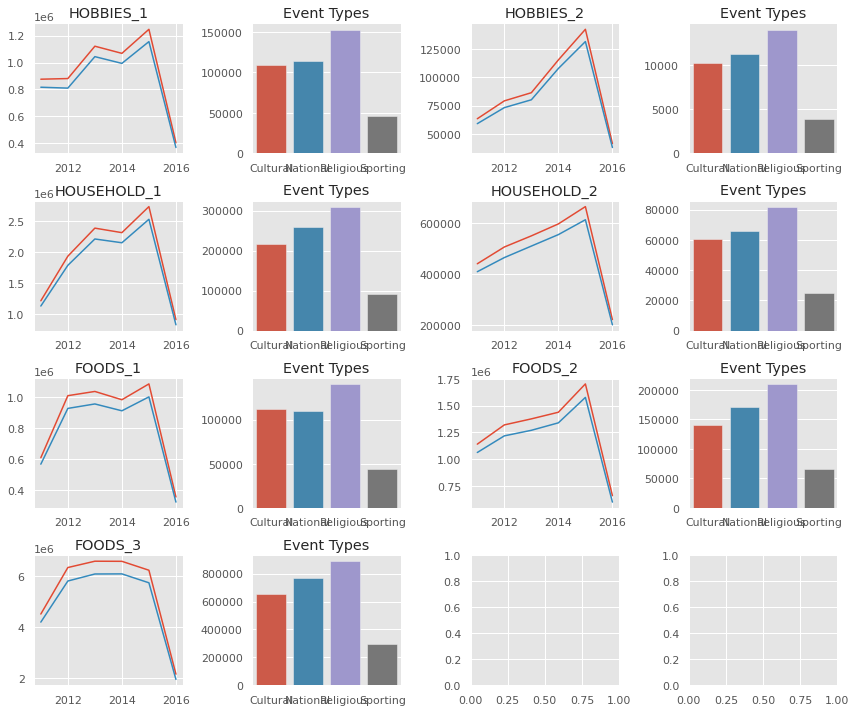

In [ ]:
# The below code snippet creates two dataframes, one with event data and one without event data and plot 
# line chart to compare sales between them and break the sales between departments and also plots bar chart to know 
# about the sales at each event type
fig,axs = plt.subplots(4,4,figsize=(12,10))
r=0
c=0
for i in sales_train_validation['dept_id'].unique():
  
  validation_columns = [j for j in sales_data_year.columns if 'validation' in j and i in j]
  event_data = sales_data_year[['event_type_1','event_type_2']]
  validation_data = sales_data_year[validation_columns].sum(axis=1).to_frame()
  event_data = event_data.merge(validation_data,left_index=True,right_index=True)
  event_data = event_data.fillna(0)
  
  selected_columns_data_event1 = event_data.loc[(event_data[['event_type_1']] != 0).any(axis=1)].groupby(['event_type_1']).sum()
  selected_columns_data_event2= event_data.loc[(event_data[['event_type_2']] != 0).any(axis=1)].groupby(['event_type_2']).sum()
  x = list(selected_columns_data_event1.index) + list(selected_columns_data_event2.index) 
  y = [i[0] for i in selected_columns_data_event1.values] + [i[0] for i in selected_columns_data_event2.values]
  data_dict = {}
  for k in range(len(x)):
    if x[k] not in data_dict:
      data_dict[x[k]] = y[k]
    else:
      data_dict[x[k]] += y[k]

  selected_columns_vaidation = [column for column in sales_data_y.columns if i in column]

  selected_columns  = selected_columns_vaidation + ['year','event_type_1','event_type_2']
  selected_columns_data = sales_data_y[selected_columns].fillna(0)
  selected_columns_data_event = selected_columns_data.groupby('year').sum()
  ax = selected_columns_data_event[selected_columns_vaidation]

  selected_columns_data_no_event = selected_columns_data.loc[(selected_columns_data[['event_type_1','event_type_2']] == 0).all(axis=1)] 
  selected_columns_data_no_event = selected_columns_data_no_event.groupby('year').sum()
  ax1 = selected_columns_data_no_event[selected_columns_vaidation]

  sns.lineplot(x=list(ax.index),y=[list_val.sum() for list_val in ax.values],ax=axs[r][c])
  sns.lineplot(x=list(ax1.index),y=[list_val.sum() for list_val in ax1.values],ax=axs[r][c]).set(title=i)
  sns.barplot(x=list(data_dict.keys()),y=list(data_dict.values()),ax=axs[r][c+1]).set(title='Event Types')


  if c == 2:
    c = 0
    r += 1
  else:
    c += 2
plt.tight_layout()

**Observations**
1. Difference between with and without special days in  departments level is also same as previous plots regarless of sales trend what we have already discussed.

**Let's take a look on how snap affects the sales**

**Snap Days at each states, snap days varying state by state**

**What is SNAP?**
1. SNAP stands for Supplemental Nutrition Assistance Program, it helps minimum income person or family to have food on their table.
2. Each month you'll get some credit to the government issued debit card, based on family size you get credit.
3. The snap day varies between states.
4. Snap is only applicable for food, and we have already seen that food defines the growth of sales at branch or state.

In [ ]:
# # Get Ideas from this to plot a calender to show the snap days
# # https://www.kaggle.com/headsortails/back-to-predict-the-future-interactive-m5-eda
# # Refered the code from this documentation
# # The below code snipper plots two years years calender and shows snap days for each state  
# r = 0
# for i in sales_train_validation['state_id'].unique():
#     print("="*40+f"At state {i}"+"="*50)
#     snap_data_columns = [column for column in calender.columns if i in column] + ['year','date']
#     snap_data = calender[snap_data_columns]

#     snap_data = snap_data.loc[(snap_data['year']>2013) & (snap_data['year']<2016)]
#     snap_data = snap_data[[f'snap_{i}','date']].set_index('date')
#     days = pd.to_datetime(snap_data.index)
#     events = pd.Series(np.array(snap_data[f'snap_{i}'].values), index=days)
#     print(events)
# #     break
#     calmap.calendarplot(events,fillcolor='grey',cmap='YlGn',fig_kws=dict(figsize=(12, 10)))
# #     plt.show()
# **Observation**
# 1. Above yearly calendar for each state shows that snap days changes between states. 
# 2. Each month have 10 snap days.

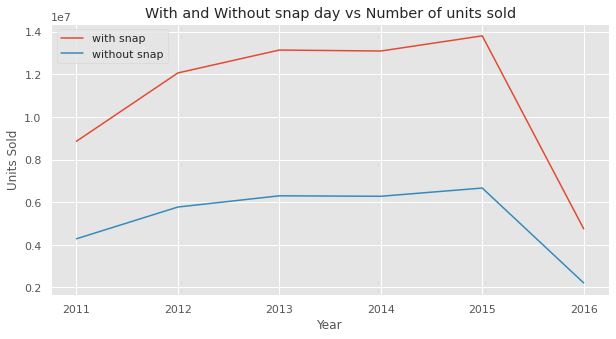

In [ ]:
# The below code create two dataframe, one with and another without snap days and plots line chart to compare 
# over time
sales_data_y =sales_train_validation.set_index('id')[day_columns].T
sales_data_y['d'] = sales_data_y.index
sales_data_y = sales_data_y.merge(calender,on='d').set_index('date')

selected_columns_validation = [column for column in sales_data_y.columns if 'validation' in column]
selected_columns = selected_columns_validation + ['year','snap_CA','snap_TX','snap_WI']
selected_columns_data = sales_data_y[selected_columns]
ax = selected_columns_data.groupby('year')[selected_columns_validation].sum()

selected_columns_data_no_snap = selected_columns_data.loc[(selected_columns_data[['snap_CA','snap_TX','snap_WI']] == 0).all(axis=1)] 
ax1 = selected_columns_data_no_snap.groupby('year')[selected_columns_validation].sum()


plt.figure(figsize=(10,5))
ax = sns.lineplot(x=list(ax.index),y=[list_val.sum() for list_val in ax.values],label='with snap')
ax = sns.lineplot(x=list(ax1.index),y=[list_val.sum() for list_val in ax1.values],label='without snap')
ax.set_title('With and Without snap day vs Number of units sold')
ax.set(xlabel='Year',ylabel='Units Sold')
ax.legend()
plt.show()


**Observations**
1. There is 100% high sales with snap days, so those 10 x 12 = 120 days contributes 50% of total days, while balance 245 days contributes other 50% of sales 

**Let's take a look on how snap at states affects the sales**

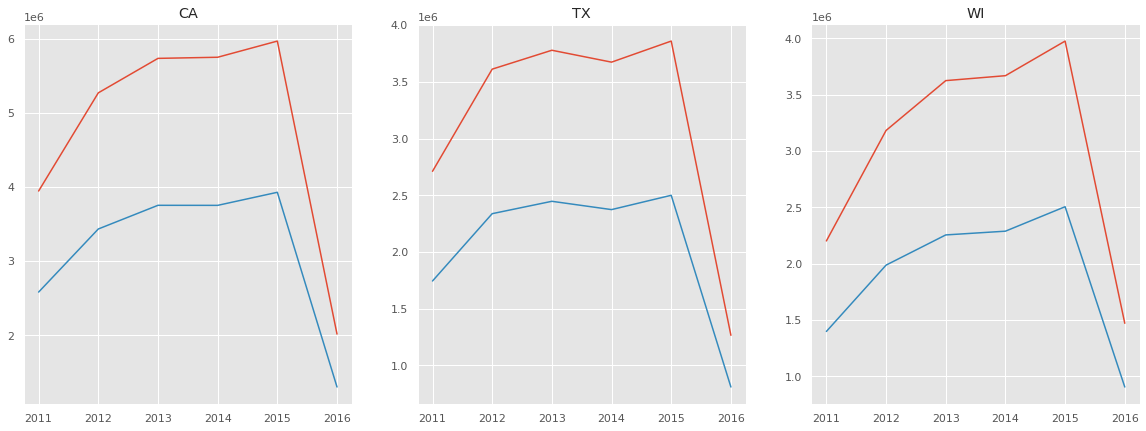

In [ ]:
# The below code break sales by state and create two dataframe, one with and another without snap days 
# and plots line chart to compare over time
sales_data_y =sales_train_validation.set_index('id')[day_columns].T
sales_data_y['d'] = sales_data_y.index
sales_data_y = sales_data_y.merge(calender,on='d').set_index('date')

fig,axs = plt.subplots(1,3,figsize=(20,7))

unique_list = sales_train_validation['state_id'].unique()
j=0
for i in unique_list:
  selected_columns_validation = [column for column in sales_data_y.columns if i in column]
  selected_columns  = selected_columns_validation + ['year']
  selected_columns_data = sales_data_y[selected_columns]
  selected_columns_validation.remove('snap_{}'.format(i))
  ax = selected_columns_data.groupby('year')[selected_columns_validation].sum()

  selected_columns_data_no_snap = selected_columns_data.loc[(selected_columns_data[['snap_{}'.format(i)]] == 0).all(axis=1)] 
  ax1 = selected_columns_data_no_snap.groupby('year')[selected_columns_validation].sum()

  sns.lineplot(x=list(ax.index),y=[list_val.sum() for list_val in ax.values],ax=axs[j])
  sns.lineplot(x=list(ax1.index),y=[list_val.sum() for list_val in ax1.values],ax=axs[j]).set(title=i)

  j +=1
plt.show()


**Observations**
1. This plot breaks the sales into state and then compares the sales between  with and without snap days.
2. The same 100% difference differnce as we seen at previous plot for the states, so the SNAP days are utilized more at all the three states.

**Analyse how snap at store effect the sales**

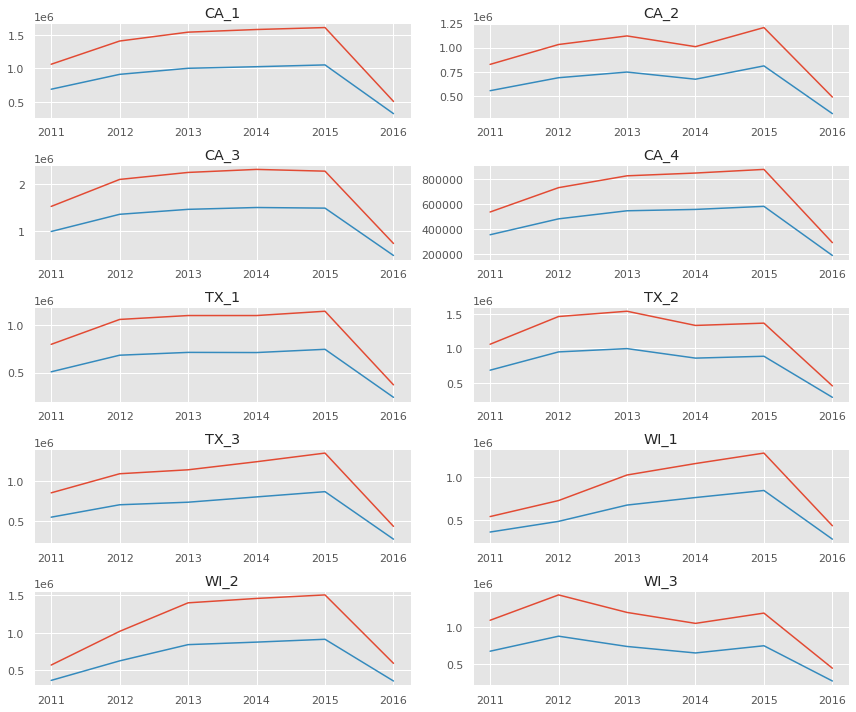

In [ ]:
# The below code break sales by store and create two dataframe, one with and another without snap days 
# and plots line chart to compare over time
fig,axs = plt.subplots(5,2,figsize=(12,10))
r=0
c=0
for i in sales_train_validation['store_id'].unique():
  selected_columns_vaidation = [column for column in sales_data_y.columns if i in column]

  selected_columns  = selected_columns_vaidation + ['year','snap_{}'.format(i.split('_')[0])]
  selected_columns_data = sales_data_y[selected_columns]
  ax = selected_columns_data.groupby('year')[selected_columns_vaidation].sum()

  selected_columns_data_no_snap = selected_columns_data.loc[(selected_columns_data[['snap_{}'.format(i.split('_')[0])]] == 0).all(axis=1)] 
  ax1 = selected_columns_data_no_snap.groupby('year')[selected_columns_vaidation].sum()

  sns.lineplot(x=list(ax.index),y=[list_val.sum() for list_val in ax.values],ax=axs[r][c])
  sns.lineplot(x=list(ax1.index),y=[list_val.sum() for list_val in ax1.values],ax=axs[r][c]).set(title=i)

  if c == 1:
    c = 0
    r += 1
  else:
    c += 1
plt.tight_layout()

**Observations**
1. Here we breaking sales with and without SNAP for all the branches. There is large difference between snap and without at WI_2, mean while WI_1 and WI_3 doesn't have that much difference.
2. All the stores at CA utilizes snap days at equal proportion between with and without snap days and texas is also like that.

**Analysis of sell prices over time**

In [ ]:
def price_over_time(number_of_random_items):
  """This function takes integer as input and plots n scatter plot based for each item_id from selling_prices
  dataframe to understand chnage of price of item over time"""
  ids = selling_prices['item_id'].values
  ids = ids[random.sample(range(0,len(ids)),number_of_random_items)]
  # Manually selected two items from each dept still the plot shows same charter
  # ids = ["FOODS_1_205","FOODS_1_206","FOODS_2_009","FOODS_2_013","FOODS_2_013","FOODS_3_022","HOBBIES_1_018","HOBBIES_1_009","HOBBIES_2_019","HOBBIES_2_047","HOUSEHOLD_1_011","HOUSEHOLD_1_065","HOUSEHOLD_2_010","HOUSEHOLD_2_017"]
  for i in range(number_of_random_items):
    data = selling_prices.loc[selling_prices['item_id'] == ids[i]][['wm_yr_wk','sell_price']]
    data = data.merge(calender,on='wm_yr_wk')[['sell_price','year','month','d']].groupby(['year','month']).mean().round(3)
    data['month_year'] = data.index
    fig = px.scatter(x=[str(i[0])+'-'+str(i[1]) for i in data['month_year'].values], y=data['sell_price'],color=[i[0] for i in data['month_year'].values],size=data['sell_price'])
    fig.update_layout(title=ids[i],width=800,height=400)
    fig.show()

**Note: The below image is snap of actual plot graph. Run the above two cells if you want to have real time interaction**



![](https://drive.google.com/uc?export=view&id=1KTnYAy2FsRhKpi-ae-L9bcCpfbZ4Qtu2) 


In [ ]:
def price_over_time_line(number_of_random_items):
  """This function takes integer as input and plots n scatter plot based for each item_id from selling_prices
  dataframe to understand chnage of price of item over time"""
  ids = selling_prices['item_id'].values
  ids = ids[random.sample(range(0,len(ids)),number_of_random_items)]
  for i in range(number_of_random_items):
    data = selling_prices.loc[selling_prices['item_id'] == ids[i]][['wm_yr_wk','sell_price']]
    data = data.merge(calender,on='wm_yr_wk')[['sell_price','year','month','d']].groupby(['year','month']).mean().round(3)
    data['month_year'] = data.index
#     sns.lineplot(x=[str(i[0])+'-'+str(i[1]) for i in data['month_year'].values],y=data['sell_price'],color=[i[0] for i in data['month_year'].values])
    fig = px.line(x=[str(i[0])+'-'+str(i[1]) for i in data['month_year'].values], y=data['sell_price'],color=[i[0] for i in data['month_year'].values])
    fig.update_layout(title=ids[i],width=800,height=400)
    fig.show()

In [ ]:
# price_over_time_line(5)

**Note: The below image is snap of actual plot graph. Run the above two cells if you want to have real time interaction**

![](https://drive.google.com/uc?export=view&id=1wshiaVBgb6xC6IRZVkyEIjNBmpFPGV4T) 
![](https://drive.google.com/uc?export=view&id=17xGHHaEa6D3Jk37OFK2GxTNW_sgMEu3y) 
![](https://drive.google.com/uc?export=view&id=1VZmXTAvCUGHnusRe7gHwBQ61uuXuYM5X) 

**Observations**
1. In the above plot we have selected 5 items randomly and analyze the price change over time.
2. In the above plot we can see that for few food products the price stays same throughout the year. Few items increases throughout the time and few items decreases through out the time.


**Change of price over year break by state -> category -> department**

In [ ]:
# Here based on the wm_yr_wk from sell_price.csv assigned year avoid getting it from calendar.csv because of memory limitations
year = {111:2011,112:2012,113:2013,114:2014,115:2015,116:2016}
selling_prices_year = selling_prices
selling_prices_year['year'] = [year[int(str(num)[:3])] for num in selling_prices_year['wm_yr_wk'].values]

In [ ]:

def price_over_state_time():
  """This function breaks sates into category and into department to understand the change of price over time"""
  for j in sales_train_validation['state_id'].unique():
    data = selling_prices_year.loc[selling_prices['store_id'].str.startswith(j)]
    for k in sales_train_validation['cat_id'].unique():
      data1 = data.loc[data['item_id'].str.startswith(k)]
      fig = go.Figure()
      legend =[]
      for l in [x for x in sales_train_validation['dept_id'].unique() if k in x]:
        legend.append(l)
        data2 = data1.loc[data1['item_id'].str.startswith(l)]
        data3 = data2.groupby('year').mean()
        fig.add_trace(go.Scatter(x=data3.index,y=data3['sell_price'],fill='tozeroy',name=l))
      fig.update_layout(title = 'state - {} and category - {}'.format(j,k),height=400, width=600)
      fig.show()

In [ ]:
# price_over_state_time()

**Note: The below image is snap of actual plot graph. Run the above two cells if you want to have real time interaction**



![](https://drive.google.com/uc?export=view&id=15Eh3hRvhyJSG1Q7wbwYrKaQPeBP7J89W) 
![](https://drive.google.com/uc?export=view&id=1FmPYU2ceJL6g35ljeGD_QsJrAv0QLNb7) 
![](https://drive.google.com/uc?export=view&id=1jcLFVtk30owA6Y4CrkMmVo3apud-6ABG) 
![](https://drive.google.com/uc?export=view&id=1uX0zfxBs3xaiYNDTtD-fCj-rP3SQ2Veg) 
![](https://drive.google.com/uc?export=view&id=17iKrpPs-FIz9PMf8aPh6x3FkMG7emJVV)
![](https://drive.google.com/uc?export=view&id=1DwlQKcxrYVVZZIeZPwVXiXvAXLYTJHYB) 
![](https://drive.google.com/uc?export=view&id=1iJ0sN3elmsxJLmcmm7YjJjqTPIB0aM93) 
![](https://drive.google.com/uc?export=view&id=1erLXzUy-s9VL5TlVIIBoYzdoxfgc0Uws)  



**Observations**
1. This breaks state into category and then to department and then compares the change of price over time.
2. There is small difference between price at each states.
3. By overall Hobbies_1 show increase in price over time and Hobbies_2 is slightly decresed over time.
4. Household_1 is slightly increased through time and Household_2 is slightly decreased throughout time
5. Food_2 in creased over time while Food_1 and Food_2 stays almost same over time.

**Change of price over year break by category and department**

In [ ]:

def price_over_time_cat_dept():
  """This function breaks category and into department to understand the change of price over time"""
  for k in sales_train_validation['cat_id'].unique():
    data1 = selling_prices_year.loc[selling_prices_year['item_id'].str.startswith(k)]
    fig = go.Figure()
    legend =[]
    for l in [x for x in sales_train_validation['dept_id'].unique() if k in x]:
      legend.append(l)
      data2 = data1.loc[data1['item_id'].str.startswith(l)]
      data3 = data2.groupby('year').mean()
      fig.add_trace(go.Scatter(x=data3.index,y=data3['sell_price'],fill='tozeroy',name=l))
    fig.update_layout(title = 'category - {}'.format(k),height=600, width=800)
    fig.show()

In [ ]:
# price_over_time_cat_dept()

**Note: The below image is snap of actual plot graph. Run the above two cells if you want to have real time interaction**



![](https://drive.google.com/uc?export=view&id=1ofkq3OCiKD_rC5fO3doqtnWXcD65uKEB) 
![](https://drive.google.com/uc?export=view&id=12Zm_vQJwu4e6oYYgdl3pnaQ0cPVM8Cvm) 
![](https://drive.google.com/uc?export=view&id=1Ip7eyginwQYVLzg35_OcBt4JK08J4eI6) 


**Observations**
1. This plot breaks categories and to deparments and compares price between departments.
2. It also shows same character as we seen by breaking between states. 

**Let's analyze in presence of external dataset - we are using US Natural Disaster Declarations available on kaggle**

In [ ]:
ext_dataset = pd.read_csv("us_disasters_m5.csv")
ext_dataset.head(2)

disaster_number state declaration_type      declaration_date incident_type  \
0             2862    TX               FM  2011-02-28T03:12:00Z          Fire   
1             2863    TX               FM  2011-02-28T03:25:00Z          Fire   

                 declaration_title  ih_program_declared  ia_program_declared  \
0  Willow Creek South Fire Complex                    0                    0   
1                     Matador Fire                    0                    0   

   pa_program_declared  hm_program_declared   incident_begin_date  \
0                    1                    0  2011-02-27T05:00:00Z   
1                    1                    0  2011-02-27T05:00:00Z   

  incident_end_date   fips  designated_area  
0               NaN  48375  Potter (County)  
1               NaN  48345  Motley (County)

As you notice that the incident end data is not provided for many of the data point we just filled the incident end date with incident begin date if incident end date is not given

In [ ]:
ext_dataset['incident_end_date'] = np.where(~ext_dataset['incident_end_date'].isna(),ext_dataset['incident_end_date'],ext_dataset['incident_begin_date'])

We have around 650+ data points from external dataset since we have incident end date also, we are going to copy more data points from incident begin date to end date, for example, if an incident start at 10-10-2020 and ends at 15-10-2020, now the incident happend for 6 days, so we are going copy that data point for six time and we'll also increase the incident date by one day till it reaches end date.

In [ ]:
ext_dataset['declaration_date'] = pd.to_datetime(ext_dataset['declaration_date']).dt.date
ext_dataset['declaration_date'] = ext_dataset['declaration_date'].apply(lambda x: x.strftime('%Y-%m-%d'))
ext_dataset['incident_begin_date'] = pd.to_datetime(ext_dataset['incident_begin_date']).dt.date
ext_dataset['incident_begin_date'] = ext_dataset['incident_begin_date'].apply(lambda x: x.strftime('%Y-%m-%d'))
ext_dataset['incident_end_date'] = pd.to_datetime(ext_dataset['incident_end_date']).dt.date
ext_dataset['incident_end_date'] = ext_dataset['incident_end_date'].apply(lambda x: x.strftime('%Y-%m-%d'))
ext_dataset['duration'] = pd.to_datetime(ext_dataset['incident_end_date']) - pd.to_datetime(ext_dataset['incident_begin_date'])
ext_dataset['duration'] = ext_dataset['duration'].astype('timedelta64[D]') + 1
ext_dataset['id_uniq'] = range(1,ext_dataset.shape[0]+1)
ext_dataset = ext_dataset.loc[ext_dataset.index.repeat(ext_dataset['duration'])]
ext_dataset.reset_index(inplace=True)
ext_dataset.head(2)

index  disaster_number state declaration_type declaration_date  \
0      0             2862    TX               FM       2011-02-28   
1      1             2863    TX               FM       2011-02-28   

  incident_type                declaration_title  ih_program_declared  \
0          Fire  Willow Creek South Fire Complex                    0   
1          Fire                     Matador Fire                    0   

   ia_program_declared  pa_program_declared  hm_program_declared  \
0                    0                    1                    0   
1                    0                    1                    0   

  incident_begin_date incident_end_date   fips  designated_area  duration  \
0          2011-02-27        2011-02-27  48375  Potter (County)       1.0   
1          2011-02-27        2011-02-27  48345  Motley (County)       1.0   

   id_uniq  
0        1  
1        2

In [ ]:
check_continuation = 0
last_updated_date = '0000-0-0'
ext_dataset['incident_begin_date'] = pd.to_datetime(ext_dataset['incident_begin_date'])
for row_index in ext_dataset.index:
    if(check_continuation != ext_dataset['id_uniq'][row_index]):
        check_continuation = ext_dataset['id_uniq'][row_index]
        last_updated_date = (ext_dataset['incident_begin_date'][row_index])
    else:
        last_updated_date = last_updated_date + pd.DateOffset(1)
        ext_dataset['incident_begin_date'][row_index] = last_updated_date
ext_dataset['incident_begin_date'] = pd.to_datetime(ext_dataset['incident_begin_date']).apply(lambda x: x.strftime('%Y-%m-%d'))

In [ ]:
day_columns = [column for column in sales_train_evaluation.columns if column.startswith('d_')]
sales_train_evaluation_new = sales_train_evaluation.set_index('id')[day_columns].T\
.merge(calendar.set_index('d'),
       left_index=True,
        right_index=True,
        validate='1:1')

In [ ]:
product_columns = [column for column in sales_train_evaluation_new.columns if column.endswith('_evaluation')]
sales_train_evaluation_new = sales_train_evaluation_new.set_index('date')[product_columns].T
sales_train_evaluation_new['state'] = sales_train_evaluation_new.index
for row_index in sales_train_evaluation_new.index:
    var = sales_train_evaluation_new['state'][row_index].split('_')
    sales_train_evaluation_new['state'][row_index] = var[-3] 

Merging the external dataset with sales_train_evaluation dataset

In [ ]:
for state in ['CA','TX','WI']:
    print("="*50+state+"="*50)
    df_state = sales_train_evaluation_new[sales_train_evaluation_new['state'] == state]
    df_state = df_state.drop(['state'],axis=1)
    df_state = df_state.T
    df_state.reset_index(level=0, inplace=True)
    df_state.head()
    ext_dataset_state = ext_dataset[ext_dataset['state'] == state]
    df_state = pd.merge(df_state, ext_dataset_state, left_on=['date'],right_on=['incident_begin_date'],how='left')
    df_state['date'] = pd.to_datetime(df_state['date'])
    df_state['month'] = df_state['date'].dt.month
    df_state['year'] = df_state['date'].dt.year
    print(df_state.shape)
    df_state.to_pickle(f'{state}_ext.pkl')
    del df_state
    gc.collect()

In [ ]:
ext_data_CA = pd.read_pickle('CA_ext.pkl')
ext_data_TX = pd.read_pickle('TX_ext.pkl')
ext_data_WI = pd.read_pickle('WI_ext.pkl')

**Number of disaster days at each state**

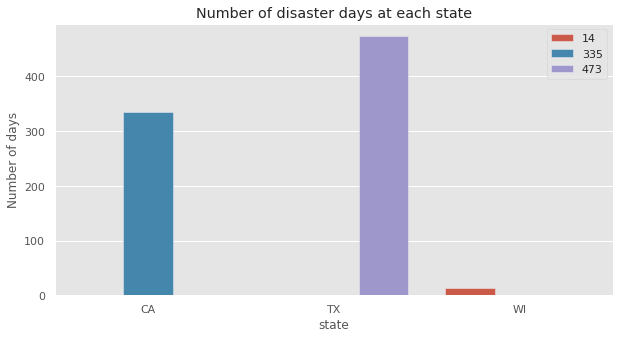

In [ ]:
y1 = ext_data_CA["incident_begin_date"].value_counts()
y2 = ext_data_TX["incident_begin_date"].value_counts()
y3 = ext_data_WI["incident_begin_date"].value_counts()
y = [len(dict(y1).keys()),len(dict(y2).keys()),len(dict(y3).keys())]
x = ['CA','TX','WI']
plt.figure(figsize=(10,5))
ax = sns.barplot(x=x,y=y,hue=y)
ax.set_title('Number of disaster days at each state')
ax.set(xlabel = 'state',ylabel = 'Number of days')
plt.show()


**Observations**
1. There are more disasters on texas while compared to CA and very very low on WI

**Number of disaster type at each state**

In [ ]:
combined_dataset = [ext_data_CA,ext_data_TX,ext_data_WI]
state = ['CA','TX','WI']

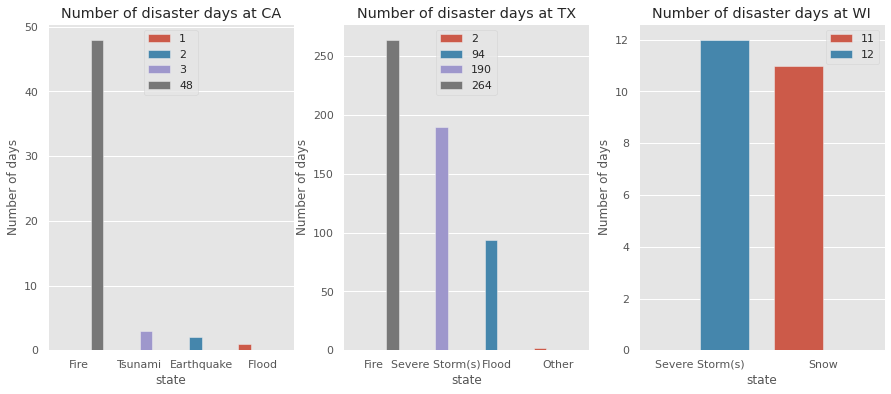

In [ ]:
fig,axs = plt.subplots(1,3,figsize=(15,6))
for i in range(3):
    dataset = combined_dataset[i]
    dataset = dataset.dropna(subset=['incident_begin_date'])
    dataset = dataset.drop_duplicates('id')
    dataset_kv = dict(dataset['incident_type'].value_counts()) 
    x = list(dataset_kv.keys())
    y = list(dataset_kv.values())
    ax = sns.barplot(x=x,y=y,hue=y,ax=axs[i])
    ax.set_title(f'Number of disaster days at {state[i]}')
    ax.set(xlabel = 'state',ylabel = 'Number of days')    

**Observations**
1. As we can see in the above plots that more number of fires is happening on CA and Texas and in WI there is no fire and snow there. 

**Let's see how the number of units sold affected on disaster day for each state**

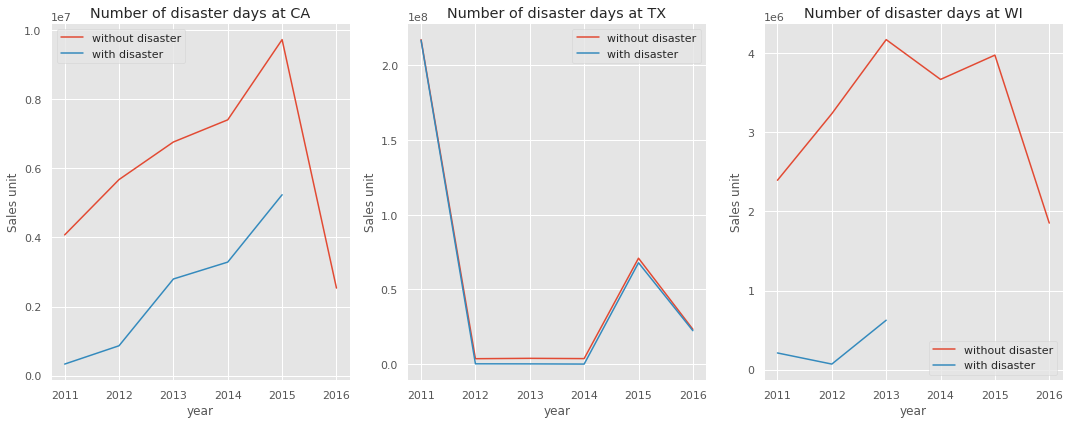

In [ ]:
fig,axs = plt.subplots(1,3,figsize=(15,6))
for i in range(3):
    dataset = combined_dataset[i]
    product_columns = [column for column in dataset.columns if '_evaluation' in column] + ['year']
    without_disaster = dataset[product_columns].groupby('year').sum()
    dataset = dataset.dropna(subset=['incident_begin_date'])
    with_disaster =dataset[product_columns].groupby('year').sum()
    ax = sns.lineplot(x = list(without_disaster.index),y=[list_val.sum() for list_val in without_disaster.values],ax=axs[i])
    ax = sns.lineplot(x = list(with_disaster.index),y=[list_val.sum() for list_val in with_disaster.values],ax=axs[i])
    ax.set_title(f'Number of disaster days at {state[i]}')
    ax.set(xlabel = 'year',ylabel = 'Sales unit') 
    ax.legend(['without disaster','with disaster'])  
plt.tight_layout()

**Observations**
1. The above plot shows sales on all days and only on disaster days, since we have very few disaster days we can't decide whether the disaster is making an impact on sales, but if you see at Texas disastrous events happening on most of the days and sales trend is almost overlapping se can crealy see that disaster event doesn't making an impact on sales at Texas but for other two sates we'll decide with model output.

**Feature engineering and make prediction using ML model** 

1. Since participants of kaggle competition aims for single metric it would be great to use ensembles model so we'll try out ensemble models like GBDT.

**Since we have data for 5.5 years and totally there are 30400+ products so we'll have 1941 rows for each products + few catgorical features + few new features through feature engineering, so it's very important to reduce memory consumed by dataframe**

[Reduced the size of dataframe by using the following notebook](https://www.kaggle.com/arjanso/reducing-dataframe-memory-size-by-65)

In [2]:
def reduce_mem_usage(df):
  incoming_df_mem_usage = df.memory_usage().sum() / 1024**2
  print("Memory usage of properties dataframe is :",incoming_df_mem_usage," MB")
  na_list = [] # to keep track the columns that have missing values filled in
  for col in df.columns:
    if df[col].dtype != object:
      is_int = False
      max =  df[col].max()
      min = df[col].min()

      # integer doesn't support nan, so it needs to be filled
      if not np.isfinite(df[col].all()):
        na_list.app(col)
        df[col].fillna(mn-1,inplace=True)
      # test if column can be converted to integer
      asint = df[col].fillna(0).astype(np.int64)
      result = (df[col] - asint)
      result = result.sum()

      if result > -0.01 and result < 0.01:
        is_int = True
      if is_int:
        if min>=0:
          if max < 255:
            df[col] = df[col].astype(np.uint8)
          elif max < 65535:
            df[col] = df[col].astype(np.uint16)
          elif max < 4294967295:
            df[col] = df[col].astype(np.uint32)
          else:
            df[col] = df[col].astype(np.uint64)
        else:
          if min > np.iinfo(np.int8).min and max < np.iinfo(np.int8).max:
            df[col] = df[col].astype(np.int8)
          elif min > np.iinfo(np.int16).min and max < np.iinfo(np.int16).max:
            df[col] = df[col].astype(np.int16)
          elif min > np.iinfo(np.int32).min and max < np.iinfo(np.int32).max:
            df[col] = df[col].astype(np.int32)
          elif min > np.iinfo(np.int64).min and max < np.iinfo(np.int64).max:
            df[col] = df[col].astype(np.int64)
      else:
        df[col] = df[col].astype(np.float32)
         
  print("********************** MEMORY USAGE AFTER COMPLETION **********************")
  outgoing_df_mem_usage = df.memory_usage().sum() / 1024**2 
  print("Memory usage is: ",outgoing_df_mem_usage," MB")
  print("This is ",100*outgoing_df_mem_usage/incoming_df_mem_usage,"% of the initial size")
  return df, na_list

In [3]:
sales_train_evaluation = pd.read_csv(r"sales_train_evaluation.csv")  #The properties dataset
sales_train_evaluation, na_list = reduce_mem_usage(sales_train_evaluation)
if(len(na_list)!=0):
  print("="*100)
  print("Note: The following columns have missed values filled in with data_frame['column_name'].min() -1")
  print("="*100)
  print(na_list)

Memory usage of properties dataframe is : 452.91172790527344  MB
********************** MEMORY USAGE AFTER COMPLETION **********************
Memory usage is:  65.71533966064453  MB
This is  14.509524839327831 % of the initial size


In [4]:
calendar = pd.read_csv(r"calendar.csv")  #The properties dataset
calendar, na_list = reduce_mem_usage(calendar)
if(len(na_list)!=0):
  print("="*100)
  print("Note: The following columns have missed values filled in with data_frame['column_name'].min() -1")
  print("="*100)
  print(na_list)

Memory usage of properties dataframe is : 0.2104339599609375  MB
********************** MEMORY USAGE AFTER COMPLETION **********************
Memory usage is:  0.1221780776977539  MB
This is  58.06005728373577 % of the initial size


In [5]:
sell_prices = pd.read_csv(r"sell_prices.csv")  #The properties dataset
sell_prices, na_list = reduce_mem_usage(sell_prices)
if(len(na_list)!=0):
  print("="*100)
  print("Note: The following columns have missed values filled in with data_frame['column_name'].min() -1")
  print("="*100)
  print(na_list)

Memory usage of properties dataframe is : 208.77456665039062  MB
********************** MEMORY USAGE AFTER COMPLETION **********************
Memory usage is:  143.5325527191162  MB
This is  68.75001827184856 % of the initial size


**We have data for 1941 days, first 1913 for train dataset and 1914-1941 is validation dataset and we have to predict the sales for next 28 days so, we have add d_42 to d_1970 with values and make it as our test dataset**

In [6]:
for d in range(1942,1970):
    col = 'd_' + str(d)
    sales_train_evaluation[col] = 0
    sales_train_evaluation[col] = sales_train_evaluation[col].astype(np.int16)

In [ ]:
df = pd.melt(sales_train_evaluation, id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], var_name='d', value_name='units_sold').dropna()

In [ ]:
df = pd.merge(df, calendar, on='d', how='left')
df = pd.merge(df, sell_prices, on=['store_id','item_id','wm_yr_wk'], how='left') 

**Since we have seen in EDA that sales unit follows a pattern over time, so by creating date related features makes our forecasting model to be more accurate**

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['day_of_month'] = df['date'].dt.day.astype('int8')
df['week_of_month'] = df['date'].apply(lambda d: (d.day-1) // 7 + 1).astype('int8')
df['week_of_year'] = df['date'].dt.week.astype('int8')
df['quarter_of_year'] = df['date'].dt.quarter.astype('int8')

1. In our our weekly sales pattern we have see that sales is high on saturday and sunday and moderate on monday and friday and very low on Tuesday - Thrusday.
2. So rather than just have Isweekday and Isweekend features, we have three features for high sales day, moder sales day and low sales day.
3. we can also try daily average sales and weekly average sales 

In [ ]:
df['is_month_start'] = [1 if i == 1 else 0 for i in df['week_of_month']]
df['is_month_end'] = [1 if i in [4,5] else 0 for i in df['week_of_month']]
df['event_name_1'] = df['event_name_1'].fillna(0)
df['event_name_2'] = df['event_name_2'].fillna(0)
df['event_type_1'] = df['event_type_1'].fillna(0)
df['event_type_2'] = df['event_type_2'].fillna(0)
df['is_week_end'] = [1 if i in [1,2] else 0 for i in df['wday']]
df['close_to_week_days'] = [1 if i in [3,7] else 0 for i in df['wday']]
df['mid_weeK_days'] = [1 if i in [4,5,6] else 0 for i in df['wday']]
df['is_weekday'] = [1 if i not in [1,2] else 0 for i in df['wday']]

**Removed not use full features**

In [ ]:
df = df.drop(['date','wm_yr_wk','weekday'],axis=1)

In [ ]:
gc.collect();

#### Label Encoding

In [ ]:
df = pd.read_pickle('data.pkl')

In [ ]:
df.head()

id    d  units_sold  wday  month  year  snap_CA  \
0  HOBBIES_1_001_CA_1_evaluation  d_1           0     1      1  2011        0   
1  HOBBIES_1_002_CA_1_evaluation  d_1           0     1      1  2011        0   
2  HOBBIES_1_003_CA_1_evaluation  d_1           0     1      1  2011        0   
3  HOBBIES_1_004_CA_1_evaluation  d_1           0     1      1  2011        0   
4  HOBBIES_1_005_CA_1_evaluation  d_1           0     1      1  2011        0   

   snap_TX  snap_WI  sell_price  day_of_month  week_of_month  week_of_year  \
0        0        0         NaN            29              5             4   
1        0        0         NaN            29              5             4   
2        0        0         NaN            29              5             4   
3        0        0         NaN            29              5             4   
4        0        0         NaN            29              5             4   

   quarter_of_year  is_month_start  is_month_end  is_week_end  \
0                1               0             1            1   
1                1               0             1            1   
2                1               0             1            1   
3                1               0             1            1   
4                1               0             1            1   

   close_to_week_days  mid_weeK_days  is_weekday  item_id  dept_id  cat_id  \
0                   0              0           0     1437        3       1   
1                   0              0           0     1438        3       1   
2                   0              0           0     1439        3       1   
3                   0              0           0     1440        3       1   
4                   0              0           0     1441        3       1   

   state_id  store_id  event_name_1  event_name_2  event_type_1  event_type_2  
0         0         0             0             0             0             0  
1         0         0             0             0             0             0  
2         0         0             0             0             0             0  
3         0         0             0             0             0             0  
4         0         0             0             0             0             0

In [ ]:
def label_encoder(values):
    le = preprocessing.LabelEncoder()
    le.fit(values)
    output = le.transform(values)
    return output

In [ ]:
df['item_id'] = label_encoder(df['item_id'].values)
df['dept_id'] = label_encoder(df['dept_id'].values)
df['cat_id'] = label_encoder(df['cat_id'].values)
df['state_id'] = label_encoder(df['state_id'].values)
df['store_id'] = label_encoder(df['store_id'].values)

In [ ]:
cat_df = reduce_mem_usage(df[['item_id','dept_id','cat_id','state_id','store_id']])

Memory usage of properties dataframe is : 2748.175506591797  MB
********************** MEMORY USAGE AFTER COMPLETION **********************
Memory usage is:  801.5511894226074  MB
This is  29.166666666666668 % of the initial size


In [ ]:
df = df.drop(['item_id','dept_id','cat_id','state_id','store_id'],axis=1)

In [ ]:
gc.collect();

In [ ]:
df['event_name_1'] = label_encoder(df['event_name_1'].astype(str))
df['event_name_2'] = label_encoder(df['event_name_2'].astype(str))
df['event_type_1'] = label_encoder(df['event_type_1'].astype(str))
df['event_type_2'] = label_encoder(df['event_type_2'].astype(str))

In [ ]:
event_df = reduce_mem_usage(df[['event_name_1','event_name_2','event_type_1','event_type_2']])

Memory usage of properties dataframe is : 2290.146255493164  MB
********************** MEMORY USAGE AFTER COMPLETION **********************
Memory usage is:  687.0438766479492  MB
This is  30.0 % of the initial size


In [ ]:
df = df.drop(['event_name_1','event_name_2','event_type_1','event_type_2'],axis=1)

In [ ]:
df_test = pd.concat([cat_df[0],event_df[0]],axis=1) 

In [ ]:
df = pd.concat([df,df_test],axis=1)
del df_test
gc.collect()

0

In [ ]:
df['store_id'] = [str(i.split('_')[-3])+'_'+str(i.split('_')[-2]) for i in df['id']]

In [ ]:
df.head()

id    d  units_sold  wday  month  year  snap_CA  \
0  HOBBIES_1_001_CA_1_evaluation  d_1           0     1      1  2011        0   
1  HOBBIES_1_002_CA_1_evaluation  d_1           0     1      1  2011        0   
2  HOBBIES_1_003_CA_1_evaluation  d_1           0     1      1  2011        0   
3  HOBBIES_1_004_CA_1_evaluation  d_1           0     1      1  2011        0   
4  HOBBIES_1_005_CA_1_evaluation  d_1           0     1      1  2011        0   

   snap_TX  snap_WI  sell_price  day_of_month  week_of_month  week_of_year  \
0        0        0         NaN            29              5             4   
1        0        0         NaN            29              5             4   
2        0        0         NaN            29              5             4   
3        0        0         NaN            29              5             4   
4        0        0         NaN            29              5             4   

   quarter_of_year  is_month_start  is_month_end  is_week_end  \
0                1               0             1            1   
1                1               0             1            1   
2                1               0             1            1   
3                1               0             1            1   
4                1               0             1            1   

   close_to_week_days  mid_weeK_days  is_weekday  item_id  dept_id  cat_id  \
0                   0              0           0     1437        3       1   
1                   0              0           0     1438        3       1   
2                   0              0           0     1439        3       1   
3                   0              0           0     1440        3       1   
4                   0              0           0     1441        3       1   

   state_id store_id  event_name_1  event_name_2  event_type_1  event_type_2  
0         0     CA_1             0             0             0             0  
1         0     CA_1             0             0             0             0  
2         0     CA_1             0             0             0             0  
3         0     CA_1             0             0             0             0  
4         0     CA_1             0             0             0             0

In [ ]:
for store in df['store_id'].unique():
    store_data = df[df['store_id']==store]
    store_data.to_csv(f'for_colab/{store}.csv',index=False)
    gc.collect();

In [ ]:
del df
gc.collect();

**Create Lag features** 
    

In [ ]:
df = pd.read_pickle('data.pkl')

1. Since we have weekly pattern,monthly and every some quartely pattern let's try with lag 7,28,29,30,31 and 90 


**Lag Feature**

In [ ]:
for lag_day,lag_column in zip([7,28,29,30,31,90],[f"lag_{lag}" for lag in [7,28,29,30,31,90]]):
    print(lag_day)
    df[lag_column] = df.groupby(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'])['units_sold'].shift(lag_day).astype(np.float16)

#### Rolling window feature

In [ ]:
for rolling_day,rolling_column in zip([7,28,29,30,31,90],[f"rolling_{rolling}" for rolling in [7,28,29,30,31,90]]):
    print(rolling_day)
    df[rolling_column] = df.groupby(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'])['units_sold'].transform(lambda x: x.rolling(window=rolling_day).mean()).astype(np.float16)

7
28
29
30
31
90


In [ ]:
for rolling_day,rolling_column in zip([7,28,29,30,31,90],[f"rolling_std_{rolling}" for rolling in [7,28,29,30,31,90]]):
    print(rolling_day)
    df[rolling_column] = df.groupby(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'])['units_sold'].transform(lambda x: x.rolling(window=rolling_day).std()).astype(np.float16)

7
28
29
30
31
90


#### Expanding window feature

In [ ]:
for expanding_day,expanding_column in zip([7,28,29,30,31,90],[f"expanding_{expanding}" for expanding in [7,28,29,30,31,90]]):
    print(expanding_day)
    df[expanding_column] = df.groupby(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'])['units_sold'].transform(lambda x: x.expanding(expanding_day).mean()).astype(np.float16)

7
28
29
30
31
90


In [ ]:
for expanding_day,expanding_column in zip([7,28,29,30,31,90],[f"expanding_std_{expanding}" for expanding in [7,28,29,30,31,90]]):
    print(expanding_day)
    df[expanding_column] = df.groupby(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'])['units_sold'].transform(lambda x: x.expanding(expanding_day).std()).astype(np.float16)

7
28
29
30
31
90


##### Avg Item sold units

In [ ]:
df['store_item_sold_avg']  = df.groupby(['store_id','item_id'])['units_sold'].transform('mean').astype(np.float16)

In [ ]:
df.head()

id    d  units_sold  wday  month  year  snap_CA  \
0  HOBBIES_1_001_CA_1_evaluation  d_1           0     1      1  2011        0   
1  HOBBIES_1_002_CA_1_evaluation  d_1           0     1      1  2011        0   
2  HOBBIES_1_003_CA_1_evaluation  d_1           0     1      1  2011        0   
3  HOBBIES_1_004_CA_1_evaluation  d_1           0     1      1  2011        0   
4  HOBBIES_1_005_CA_1_evaluation  d_1           0     1      1  2011        0   

   snap_TX  snap_WI  sell_price  day_of_month  week_of_month  week_of_year  \
0        0        0         NaN            29              5             4   
1        0        0         NaN            29              5             4   
2        0        0         NaN            29              5             4   
3        0        0         NaN            29              5             4   
4        0        0         NaN            29              5             4   

   quarter_of_year  is_month_start  is_month_end  is_week_end  \
0                1               0             1            1   
1                1               0             1            1   
2                1               0             1            1   
3                1               0             1            1   
4                1               0             1            1   

   close_to_week_days  mid_weeK_days  is_weekday  item_id  dept_id  cat_id  \
0                   0              0           0     1437        3       1   
1                   0              0           0     1438        3       1   
2                   0              0           0     1439        3       1   
3                   0              0           0     1440        3       1   
4                   0              0           0     1441        3       1   

   state_id  store_id  event_name_1  event_name_2  event_type_1  event_type_2  \
0         0         0             0             0             0             0   
1         0         0             0             0             0             0   
2         0         0             0             0             0             0   
3         0         0             0             0             0             0   
4         0         0             0             0             0             0   

   store_item_sold_avg  
0             0.321533  
1             0.253906  
2             0.156982  
3             1.694336  
4             0.958984

In [ ]:
df['d'] = df['d'].apply(lambda x:x.split('_')[1]).astype(np.int16)

In [ ]:
df['store_id'] = [str(i.split('_')[-3])+'_'+str(i.split('_')[-2]) for i in df['id']]

In [ ]:
df['units_sold'] = df['units_sold'].fillna(0)
# df['sell_price'] = df['sell_price'].fillna(0)

**Replace zero sell price with median value**

In [ ]:
df['sell_price'].median()

3.47

In [ ]:
df['sell_price'] =  df['sell_price'].fillna(df['sell_price'].median())

**Already our dataframe size is almost 10GB and we'll get it memory error while doing ML. So, we'll the data by store, since we have enough data and each store follows different sales trend, we can trin the model for each store**

In [ ]:
for store in df['store_id'].unique():
    store_data = df[df['store_id']==store]
    store_data.to_pickle(f'{store}_median.pkl')
    gc.collect();

In [ ]:
del df 
gc.collect()

0

In [ ]:
stores_list = sales_train_evaluation['store_id'].unique()

In [ ]:
data = pd.read_pickle(f'CA_1_median.pkl')
data.shape

(6003481, 60)

In [ ]:
for store in stores_list:
    print(store)
    data = pd.read_pickle(f'{store}_median.pkl')
    data = data.reset_index(drop=True)
    data['daily_avg_sales_unit'] = data.groupby(['id','d'])['units_sold'].transform('mean').astype(np.float16)
    data['weekly_avg_sales_unit'] = data.groupby(['id','week_of_month'])['units_sold'].transform('mean').astype(np.float16)
    data['sales_usd'] = data['sell_price'] * data['units_sold']
    data.to_pickle(f'{store}_median_new1.pkl')


CA_1
CA_2
CA_3
CA_4
TX_1
TX_2
TX_3
WI_1
WI_2
WI_3


In [ ]:
for store in stores_list:
    print(store)
    data = pd.read_pickle(f'{store}_median_new1.pkl')
    data.to_csv(f'median_for_colab/{store}_median_new.csv')

CA_1
CA_2
CA_3
CA_4
TX_1
TX_2
TX_3
WI_1
WI_2
WI_3


**The following three code cells are also same as above for loading the data in colab**

**Evaluation metric - Weighted Root Mean Square Scaled Error(WRMSSE)**

**Performance Metrics**
![](https://drive.google.com/uc?export=view&id=1AxJQg9zRzrsbAtIkQ97CjsBW_Jeup3QK)

The accuracy of point forecast is calculated by using the **Rooted Mean Squared Scaled Error(RMSSE)**
which is variant of **Mean Squared Scaled Error(MASE)** 

1. Where y_t is actual future sales, y_t^ is predicted sales, n is number of observations and h is forecasting horizon.
2. The denominator of RMSSE is only calculated for the time periods where products have non-zero demand
3. As per the [guide line](https://drive.google.com/file/d/1xzLupKly8zk3eWbVK46WxKuKCfvyvLce/view?usp=sharing) we have to estimate RMSSE for 42,840 time series and participated methods will be raked using **weighted RMSSE**

![](https://drive.google.com/uc?export=view&id=1CgamvuNnMJHTlwz_i8KvZqopoqAcFAwP)

1. where w_i is weight of the ith series and weight of the each series will be computes based on last 28
observations of training sample.








[Implemented this by using this notebook](https://www.kaggle.com/sibmike/fast-clear-wrmsse-18ms)

In [7]:
stores_list = sales_train_evaluation['store_id'].unique()

**Since we planned to train model for each store let's calculate the weights for each store**

In [8]:
roll_mat_csr_store = {}
for store in stores_list:
    store_df = sales_train_evaluation[sales_train_evaluation['store_id']==store]
    dummies_list = [store_df.state_id, store_df.store_id, 
                store_df.cat_id, store_df.dept_id, 
                store_df.state_id +'_'+ store_df.cat_id, store_df.state_id +'_'+ store_df.dept_id,
                store_df.store_id +'_'+ store_df.cat_id, store_df.store_id +'_'+ store_df.dept_id, 
                store_df.item_id, store_df.state_id +'_'+ store_df.item_id, store_df.id]

    # Level_0 aggregation of all values:
    dummy_df =[pd.DataFrame(np.ones(store_df.shape[0]).astype(np.int8), 
                                   index=store_df.index, columns=['all']).T]
    # List of dummy dataframes:
    for i, cats in enumerate(dummies_list):
        dummy_df +=[pd.get_dummies(cats, drop_first=False, dtype=np.int8).T]

    # Concat dummy dataframes in one go:
    roll_mat_df = pd.concat(dummy_df, keys=list(range(12)), 
                            names=['level','id'])#.astype(np.int8, copy=False)
    
    roll_index = roll_mat_df.index
    roll_mat_csr = csr_matrix(roll_mat_df.values)
    roll_mat_csr_store[store] = roll_mat_csr
    print(roll_mat_csr.shape)

(9180, 3049)
(9180, 3049)
(9180, 3049)
(9180, 3049)
(9180, 3049)
(9180, 3049)
(9180, 3049)
(9180, 3049)
(9180, 3049)
(9180, 3049)


In [9]:
# Fucntion to calculate S weights for each store:
weight_s_list = {}
def get_s(drop_days=0):
    for store in stores_list:    
        """
        drop_days: int, equals 0 by default, so S is calculated on all data.
                   If equals 28, last 28 days won't be used in calculating S.
        """
        data_store = sales_train_evaluation[sales_train_evaluation['store_id']==store]
        roll_mat_csr = roll_mat_csr_store[store]
        # Rollup sales:
        d_name = ['d_' + str(i+1) for i in range(1913-drop_days)]
        print(roll_mat_csr.shape,data_store[d_name].values.shape)
        sales_train_val = roll_mat_csr * data_store[d_name].values

        no_sales = np.cumsum(sales_train_val, axis=1) == 0
        sales_train_val = np.where(no_sales, np.nan, sales_train_val)

        # Denominator of RMSSE 
        weight1 = np.nanmean(np.diff(sales_train_val,axis=1)**2,axis=1)
        weight_s_list[store] = weight1
    return weight_s_list

In [10]:
S = get_s(drop_days=0)

(9180, 3049) (3049, 1913)
(9180, 3049) (3049, 1913)
(9180, 3049) (3049, 1913)
(9180, 3049) (3049, 1913)
(9180, 3049) (3049, 1913)
(9180, 3049) (3049, 1913)
(9180, 3049) (3049, 1913)
(9180, 3049) (3049, 1913)
(9180, 3049) (3049, 1913)
(9180, 3049) (3049, 1913)


In [11]:
# Functinon to calculate weights:
def get_w(sale_usd,store):
    # calulate sales in USD for each id:
    total_sales_usd = sale_usd.groupby(
        ['id'], sort=False)['sales_usd'].apply(np.sum).values
    
    roll_mat_csr = roll_mat_csr_store[store]
    # Roll up total sales by ids to higher levels:
    print(roll_mat_csr.shape)
    weight2 = roll_mat_csr * total_sales_usd
    return 12*weight2/np.sum(weight2)

In [12]:
w_weights_list = {}
for store in stores_list:
    print(store)
    data = pd.read_pickle(f'{store}_median_new1.pkl')
    data = data[data['d']>90]
    W = get_w(data[['id','sales_usd']],store)
    w_weights_list[store] = W
    del data
    gc.collect()

CA_1
(9180, 3049)
CA_2
(9180, 3049)
CA_3
(9180, 3049)
CA_4
(9180, 3049)
TX_1
(9180, 3049)
TX_2
(9180, 3049)
TX_3
(9180, 3049)
WI_1
(9180, 3049)
WI_2
(9180, 3049)
WI_3
(9180, 3049)


In [39]:
SW_store = {}
for key in w_weights_list.keys():
    SW_store[key] = w_weights_list[key]/np.sqrt(S[key])

In [40]:
#Since WRMSSE calucated for each stores so we have 3049 rows and 9180 time series
# Function to do quick rollups:
store_name = ''
def rollup(v,store):
    '''
    v - np.array of size (3049 rows, n day columns)
    v_rolledup - array of size (n, 9180)
    '''
    roll_mat_csr = roll_mat_csr_store[store]
    return roll_mat_csr*v #(v.T*roll_mat_csr.T).T


# Function to calculate WRMSSE:
key = 0
def wrmsse(preds, y_true):
    '''
    preds - Predictions: pd.DataFrame of size (3049 rows, N day columns)
    y_true - True values: pd.DataFrame of size (3049 rows, N day columns)
    sequence_length - np.array of size (9180,)
    sales_weight - sales weights based on last 28 days: np.array (9180,)
    '''
    preds = np.asarray([round(val) for val in preds])
    preds = preds[-(3049 * 28):]
    y_true = y_true.get_label()[-(3049 * 28):]
    preds = preds.reshape(28, 3049).T
    y_true = y_true.reshape(28, 3049).T    
    return 'wrmsse',np.sum(np.sqrt(np.mean(np.square(rollup(preds-y_true,store_name)),axis=1)) * SW_store)/12,False 

**Applying ML model** 

**By applying GBDT**

In [41]:
SW_store1 = SW_store

In [42]:
final_value = {}
final_value['valid_pred'] = {}
final_value['test_pred'] = {}
for store in stores_list:
    df_store = pd.read_pickle(f'{store}_median_new1.pkl')  
    snap_feature  = ['snap_'+store.split('_')[0]]
    selected_columns = [column for column in df_store.columns if 'rolling' not in column and 'snap' not in column and 'state' not in column]
    df_store = df_store[df_store['d']>90][selected_columns+snap_feature]
    x_train,y_train = df_store[df_store['d']<1914].drop(['id','store_id','sales_usd','daily_avg_sales_unit','is_weekday','units_sold'],axis=1),df_store[df_store['d']<1914]['units_sold']
    x_valid,y_valid = df_store[(df_store['d']>1913) & (df_store['d']<1942)].drop(['id','store_id','sales_usd','daily_avg_sales_unit', 'is_weekday','units_sold'],axis=1),df_store[(df_store['d']>1913) & (df_store['d']<1942)]['units_sold']
    x_test = df_store.loc[(df_store['d']>1941 )].drop(['id','store_id','sales_usd','daily_avg_sales_unit','is_weekday','units_sold'],axis=1)
    train_set = lgbm.Dataset(x_train, y_train)
    val_set = lgbm.Dataset(x_valid, y_valid)

    params = {
    
    'boosting_type': 'gbdt',
    'metric': 'custom',
    'objective': 'poisson',
    'n_jobs': -1,
    'seed': 236,
    'learning_rate': 0.05,
    "lambda_l2" : 0.01,
    'bagging_fraction': 0.75,
    'bagging_freq': 10, 
    'colsample_bytree': 0.75
    }    
    SW_store = SW_store1[store]
    store_name = store
    print('*****Prediction for Store: {}*****'.format(store))
    model = lgbm.train(params,train_set=train_set,num_boost_round=2500,early_stopping_rounds=50,valid_sets=val_set,verbose_eval = 100, feval= wrmsse)
    val_pred = model.predict(x_valid)
    val_pred_df = pd.DataFrame() 
    val_pred_df['id'] = df_store.loc[(df_store['d']>1913) & (df_store['d']<1942)]['id']
    val_pred_df['store_id'] = df_store.loc[(df_store['d']>1913) & (df_store['d']<1942)]['d']
    val_pred_df['units_sold'] = val_pred
    final_value['valid_pred'][store] = val_pred_df
    
    test_pred_df = pd.DataFrame()
    #     val_score = np.sqrt(metrics.mean_squared_error(val_pred,y_valid))
    y_pred = model.predict(x_test)
    test_pred_df['id'] = df_store.loc[(df_store['d']>1941 )]['id']
    test_pred_df['store_id'] = df_store.loc[(df_store['d']>1941 )]['d']
    test_pred_df['units_sold'] = y_pred
    final_value['test_pred'][store] = test_pred_df
    
    joblib.dump(model, f'best_model/gbdt/{store}_median_model_round.pkl')
    

*****Prediction for Store: CA_1*****
Training until validation scores don't improve for 50 rounds
[100]	valid_0's wrmsse: 0.715645
[200]	valid_0's wrmsse: 0.657396
[300]	valid_0's wrmsse: 0.630761
[400]	valid_0's wrmsse: 0.60125
Early stopping, best iteration is:
[352]	valid_0's wrmsse: 0.600178
*****Prediction for Store: CA_2*****
Training until validation scores don't improve for 50 rounds
[100]	valid_0's wrmsse: 1.10392
[200]	valid_0's wrmsse: 0.815896
[300]	valid_0's wrmsse: 0.697239
[400]	valid_0's wrmsse: 0.673125
Early stopping, best iteration is:
[370]	valid_0's wrmsse: 0.670338
*****Prediction for Store: CA_3*****
Training until validation scores don't improve for 50 rounds
[100]	valid_0's wrmsse: 0.592843
[200]	valid_0's wrmsse: 0.575952
[300]	valid_0's wrmsse: 0.556488
[400]	valid_0's wrmsse: 0.541069
[500]	valid_0's wrmsse: 0.528445
[600]	valid_0's wrmsse: 0.529004
Early stopping, best iteration is:
[579]	valid_0's wrmsse: 0.527606
*****Prediction for Store: CA_4*****
Train

In [ ]:
final_value = {}
final_value['valid_pred'] = {}
final_value['test_pred'] = {}
for store in stores_list:
    df_store = pd.read_pickle(f'{store}_median_new1.pkl')  
    snap_feature  = ['snap_'+store.split('_')[0]]
    selected_columns = [column for column in df_store.columns if '7' not in column and 'rolling' not in column and 'snap' not in column and 'state' not in column]
    df_store = df_store[df_store['d']>90][selected_columns+snap_feature]
    x_train,y_train = df_store[df_store['d']<1914].drop(['id','store_id','sales_usd','daily_avg_sales_unit','is_weekday','units_sold'],axis=1),df_store[df_store['d']<1914]['units_sold']
    x_valid,y_valid = df_store[(df_store['d']>1913) & (df_store['d']<1942)].drop(['id','store_id','sales_usd','daily_avg_sales_unit', 'is_weekday','units_sold'],axis=1),df_store[(df_store['d']>1913) & (df_store['d']<1942)]['units_sold']
    x_test = df_store.loc[(df_store['d']>1941 )].drop(['id','store_id','sales_usd','daily_avg_sales_unit','is_weekday','units_sold'],axis=1)
    train_set = lgbm.Dataset(x_train, y_train)
    val_set = lgbm.Dataset(x_valid, y_valid)

    params = {
    
    'boosting_type': 'gbdt',
    'metric': 'custom',
    'objective': 'poisson',
    'n_jobs': -1,
    'seed': 236,
    'learning_rate': 0.05,
    "lambda_l2" : 0.01,
    'bagging_fraction': 0.75,
    'bagging_freq': 10, 
    'colsample_bytree': 0.75
    }    
    SW_store = SW_store1[store]
    store_name = store
    print('*****Prediction for Store: {}*****'.format(store))
    model = lgbm.train(params,train_set=train_set,num_boost_round=2500,early_stopping_rounds=50,valid_sets=val_set,verbose_eval = 100, feval= wrmsse)
    val_pred = model.predict(x_valid)
    val_pred_df = pd.DataFrame() 
    val_pred_df['id'] = df_store.loc[(df_store['d']>1913) & (df_store['d']<1942)]['id']
    val_pred_df['store_id'] = df_store.loc[(df_store['d']>1913) & (df_store['d']<1942)]['d']
    val_pred_df['units_sold'] = val_pred
    final_value['valid_pred'][store] = val_pred_df
    
    test_pred_df = pd.DataFrame()
    #     val_score = np.sqrt(metrics.mean_squared_error(val_pred,y_valid))
    y_pred = model.predict(x_test)
    test_pred_df['id'] = df_store.loc[(df_store['d']>1941 )]['id']
    test_pred_df['store_id'] = df_store.loc[(df_store['d']>1941 )]['d']
    test_pred_df['units_sold'] = y_pred
    final_value['test_pred'][store] = test_pred_df
    
    joblib.dump(model, f'best_model/gbdt/{store}_median_model1.pkl')
    
    

In [43]:
dict_store_valid = {}
dict_store_valid['id'] = []
dict_store_valid['d'] = []
dict_store_valid['units_sold'] = []
for k,v in final_value['valid_pred'].items():
    for i in v.values:
        dict_store_valid['id'].append(i[0])
        dict_store_valid['d'].append(i[1])
        dict_store_valid['units_sold'].append(i[2])

dict_store_test = {}
dict_store_test['id'] = []
dict_store_test['d'] = []
dict_store_test['units_sold'] = []
for k,v in final_value['test_pred'].items():
    for i in v.values:
        dict_store_test['id'].append(i[0])
        dict_store_test['d'].append(i[1])
        dict_store_test['units_sold'].append(i[2])

# validation_pred = x_valid[['id', 'd', 'units_sold']]
validation_pred = pd.DataFrame.from_dict(dict_store_valid)
validation_pred['id'] = [i.split('_evaluation')[0]+'_validation' for i in validation_pred['id'].values]
validation_pred = pd.pivot(validation_pred, index = 'id', columns = 'd', values = 'units_sold').reset_index()
validation_pred.columns = ['id'] + ['D' + str(i + 1) for i in range(28)]

test_pred = pd.DataFrame.from_dict(dict_store_test)
test_pred = pd.pivot(test_pred, index = 'id', columns = 'd', values = 'units_sold').reset_index()
test_pred.columns = ['id'] + ['D' + str(i + 1) for i in range(28)]

final = pd.concat([validation_pred, test_pred])

sample_submission = pd.read_csv('sample_submission.csv')

final_submission = sample_submission.merge(final,left_on='id',right_on='id')

dummy_cols = ['D'+str(i) for i in range(1,29)]
change_cols = {'D'+str(i):'F'+str(i) for i in range(1,29)}

final_submission = final_submission[['id']+dummy_cols]
final_submission = final_submission.rename(columns=change_cols)
final_submission.to_csv('best_model/gbdt/submission_final_median_latest_gbdt_round.csv', index = False)

**Public and Private score**

1. For high speed training we have used LGBM - GBDT
2.  As it has been tested with different set of features and learning rates and the best score so far is - 0.59503 private score
![](https://drive.google.com/uc?export=view&id=1cQ1xZXclocR1HPqgqJYLHMWtseE60Fgp)


3. Out of 5558 participants this approcah takes me to the 1.5 % in the leaderboard. 

**Tried with external disaster dataset**

In [ ]:
final_value = {}
final_value['valid_pred'] = {}
final_value['test_pred'] = {}
remove_columns = ['id','store_id','sales_usd','is_weekday','units_sold','date']
revome_columns_ext = ['Unnamed: 0','level_0','declaration_date','incident_begin_date','incident_end_date','designated_area','declaration_title','id_uniq','duration','index']
remove_columns = remove_columns + revome_columns_ext
for store in stores_list:
    df_store = pd.read_csv(f'{store}_ext_data_final_new.csv')
    snap_feature  = ['snap_'+store.split('_')[0]]
    selected_columns = [column for column in df_store.columns if '7' not in column and 'rolling' not in column and 'snap' not in column and 'state' not in column]
    df_store = df_store[df_store['d']>90][selected_columns+snap_feature]    
    x_train,y_train = df_store[df_store['d']<1914].drop(remove_columns,axis=1),df_store[df_store['d']<1914]['units_sold']
    x_valid,y_valid = df_store[(df_store['d']>1913) & (df_store['d']<1942)].drop(remove_columns,axis=1),df_store[(df_store['d']>1913) & (df_store['d']<1942)]['units_sold']
    x_test = df_store.loc[(df_store['d']>1941 )].drop(remove_columns,axis=1)
    train_set = lgbm.Dataset(x_train, y_train)
    val_set = lgbm.Dataset(x_valid, y_valid)

    params = {
    
    'boosting_type': 'gbdt',
    'metric': 'custom',
    'objective': 'poisson',
    'n_jobs': -1,
    'seed': 236,
    'learning_rate': 0.05,
    "lambda_l2" : 0.01,
    'bagging_fraction': 0.75,
    'bagging_freq': 10, 
    'colsample_bytree': 0.75
    }    
    SW_store = SW_store1[store]
    store_name = store
    print('*****Prediction for Store: {}*****'.format(store))
    model = lgbm.train(params,train_set=train_set,num_boost_round=2500,early_stopping_rounds=50,valid_sets=val_set,verbose_eval = 100, feval= wrmsse)
    val_pred = model.predict(x_valid)
    val_pred_df = pd.DataFrame() 
    val_pred_df['id'] = df_store.loc[(df_store['d']>1913) & (df_store['d']<1942)]['id']
    val_pred_df['store_id'] = df_store.loc[(df_store['d']>1913) & (df_store['d']<1942)]['d']
    val_pred_df['units_sold'] = val_pred
    final_value['valid_pred'][store] = val_pred_df
    
    test_pred_df = pd.DataFrame()
    #     val_score = np.sqrt(metrics.mean_squared_error(val_pred,y_valid))
    y_pred = model.predict(x_test)
    test_pred_df['id'] = df_store.loc[(df_store['d']>1941 )]['id']
    test_pred_df['store_id'] = df_store.loc[(df_store['d']>1941 )]['d']
    test_pred_df['units_sold'] = y_pred
    final_value['test_pred'][store] = test_pred_df
    
    joblib.dump(model, f'{store}_ext_model.pkl')
    gc.collect()

*****Prediction for Store: CA_1*****
Training until validation scores don't improve for 50 rounds
[100]	valid_0's wrmsse: 0.680044
[200]	valid_0's wrmsse: 0.610346
[300]	valid_0's wrmsse: 0.57491
[400]	valid_0's wrmsse: 0.561158
Early stopping, best iteration is:
[350]	valid_0's wrmsse: 0.557558
*****Prediction for Store: CA_2*****
Training until validation scores don't improve for 50 rounds
[100]	valid_0's wrmsse: 1.07698
[200]	valid_0's wrmsse: 0.78395
[300]	valid_0's wrmsse: 0.66184
[400]	valid_0's wrmsse: 0.635056
Early stopping, best iteration is:
[372]	valid_0's wrmsse: 0.631805
*****Prediction for Store: CA_3*****
Training until validation scores don't improve for 50 rounds
[100]	valid_0's wrmsse: 0.589139
[200]	valid_0's wrmsse: 0.528785
[300]	valid_0's wrmsse: 0.503483
[400]	valid_0's wrmsse: 0.487685
[500]	valid_0's wrmsse: 0.477938
[600]	valid_0's wrmsse: 0.471614
[700]	valid_0's wrmsse: 0.468403
[800]	valid_0's wrmsse: 0.464442
Early stopping, best iteration is:
[841]	valid

1. With random forest on external dataset the best score so far is - 0.601 private score
![](https://drive.google.com/uc?export=view&id=1Dsyn5c-LULkGGXwKZaiLJ73y0636Bp_X)


**By applying random forest**

In [ ]:
final_value = {}
final_value['valid_pred'] = {}
final_value['test_pred'] = {}
for store in stores_list:
    df_store = pd.read_pickle(f'{store}_median_new.pkl')  
    snap_feature  = ['snap_'+store.split('_')[0]]
    selected_columns = [column for column in df_store.columns if '7' not in column and 'rolling' not in column and 'snap' not in column and 'state' not in column]
    df_store = df_store[df_store['d']>90][selected_columns+snap_feature]
    x_train,y_train = df_store[df_store['d']<1914].drop(['id','store_id','sales_usd','daily_avg_sales_unit','is_weekday','units_sold'],axis=1),df_store[df_store['d']<1914]['units_sold']
    x_valid,y_valid = df_store[(df_store['d']>1913) & (df_store['d']<1942)].drop(['id','store_id','sales_usd','daily_avg_sales_unit', 'is_weekday','units_sold'],axis=1),df_store[(df_store['d']>1913) & (df_store['d']<1942)]['units_sold']
    x_test = df_store.loc[(df_store['d']>1941 )].drop(['id','store_id','sales_usd','daily_avg_sales_unit','is_weekday','units_sold'],axis=1)
    train_set = lgbm.Dataset(x_train, y_train)
    val_set = lgbm.Dataset(x_valid, y_valid)
    params = {  
    'num_leaves':300,
    'objective': 'regression',
    'boosting_type': 'rf',    
    'metric': 'custom',
    'max_depth':-1,
    "min_child_samples":20,
    'n_jobs': -1,
    "bagging_seed": 11,
    "lambda_l2" : 0.1,
    'bagging_fraction': 0.6,
    'bagging_freq': 10, 
    'colsample_bytree': 0.6,
    'num_iterations':1000
    }    
    SW_store = SW_store1[store]
    store_name = store
    print('*****Prediction for Store: {}*****'.format(store))
    model = lgbm.train(params,train_set=train_set,early_stopping_rounds=50,valid_sets=val_set,verbose_eval = 100, feval= wrmsse)
    val_pred = model.predict(x_valid)
    val_pred_df = pd.DataFrame() 
    val_pred_df['id'] = df_store.loc[(df_store['d']>1913) & (df_store['d']<1942)]['id']
    val_pred_df['store_id'] = df_store.loc[(df_store['d']>1913) & (df_store['d']<1942)]['d']
    val_pred_df['units_sold'] = val_pred
    final_value['valid_pred'][store] = val_pred_df
    test_pred_df = pd.DataFrame()
    #     val_score = np.sqrt(metrics.mean_squared_error(val_pred,y_valid))
    y_pred = model.predict(x_test)
    test_pred_df['id'] = df_store.loc[(df_store['d']>1941 )]['id']
    test_pred_df['store_id'] = df_store.loc[(df_store['d']>1941 )]['d']
    test_pred_df['units_sold'] = y_pred
    final_value['test_pred'][store] = test_pred_df
    joblib.dump(model, f'{store}_rf_model.pkl')

*****Prediction for Store: CA_1*****
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[28]	valid_0's wrmsse: 0.662186
*****Prediction for Store: CA_2*****
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[9]	valid_0's wrmsse: 1.12634
*****Prediction for Store: CA_3*****
Training until validation scores don't improve for 50 rounds
[100]	valid_0's wrmsse: 0.713664
[200]	valid_0's wrmsse: 0.711228
Early stopping, best iteration is:
[160]	valid_0's wrmsse: 0.710619
*****Prediction for Store: CA_4*****
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[3]	valid_0's wrmsse: 1.13786
*****Prediction for Store: TX_1*****
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[3]	valid_0's wrmsse: 0.830552
*****Prediction for Store: TX_2*****
Training until validation scores don't improve for 50 rounds
Early stopping,

In [ ]:
dict_store_valid = {}
dict_store_valid['id'] = []
dict_store_valid['d'] = []
dict_store_valid['units_sold'] = []
for k,v in final_value['valid_pred'].items():
    for i in v.values:
        dict_store_valid['id'].append(i[0])
        dict_store_valid['d'].append(i[1])
        dict_store_valid['units_sold'].append(i[2])

dict_store_test = {}
dict_store_test['id'] = []
dict_store_test['d'] = []
dict_store_test['units_sold'] = []
for k,v in final_value['test_pred'].items():
    for i in v.values:
        dict_store_test['id'].append(i[0])
        dict_store_test['d'].append(i[1])
        dict_store_test['units_sold'].append(i[2])

# validation_pred = x_valid[['id', 'd', 'units_sold']]
validation_pred = pd.DataFrame.from_dict(dict_store_valid)
validation_pred['id'] = [i.split('_evaluation')[0]+'_validation' for i in validation_pred['id'].values]
validation_pred = pd.pivot(validation_pred, index = 'id', columns = 'd', values = 'units_sold').reset_index()
validation_pred.columns = ['id'] + ['D' + str(i + 1) for i in range(28)]

test_pred = pd.DataFrame.from_dict(dict_store_test)
test_pred = pd.pivot(test_pred, index = 'id', columns = 'd', values = 'units_sold').reset_index()
test_pred.columns = ['id'] + ['D' + str(i + 1) for i in range(28)]

final = pd.concat([validation_pred, test_pred])

sample_submission = pd.read_csv('sample_submission.csv')

final_submission = sample_submission.merge(final,left_on='id',right_on='id')

dummy_cols = ['D'+str(i) for i in range(1,29)]
change_cols = {'D'+str(i):'F'+str(i) for i in range(1,29)}

final_submission = final_submission[['id']+dummy_cols]
final_submission = final_submission.rename(columns=change_cols)
final_submission.to_csv('submission_final_ext_rf.csv', index = False)

**Public and private score**

1. With random forest the best score so far is - 0.84316 private score
![](https://drive.google.com/uc?export=view&id=1c5Wli3fka3WSA0s2xIdpNvuvKMhTewsj)


**Tried with external disaster dataset**

In [ ]:
final_value['valid_pred'] = {}
final_value['test_pred'] = {}
remove_columns = ['id','store_id','sales_usd','is_weekday','units_sold','date']
revome_columns_ext = ['Unnamed: 0','level_0','declaration_date','incident_begin_date','incident_end_date','designated_area','declaration_title','id_uniq','duration','index']
remove_columns = remove_columns + revome_columns_ext
for store in stores_list:
    df_store = pd.read_csv(f'{store}_ext_data_final_new.csv')
    snap_feature  = ['snap_'+store.split('_')[0]]
    selected_columns = [column for column in df_store.columns if '7' not in column and 'rolling' not in column and 'snap' not in column and 'state' not in column]
    df_store = df_store[df_store['d']>90][selected_columns+snap_feature]    
    x_train,y_train = df_store[df_store['d']<1914].drop(remove_columns,axis=1),df_store[df_store['d']<1914]['units_sold']
    x_valid,y_valid = df_store[(df_store['d']>1913) & (df_store['d']<1942)].drop(remove_columns,axis=1),df_store[(df_store['d']>1913) & (df_store['d']<1942)]['units_sold']
    x_test = df_store.loc[(df_store['d']>1941 )].drop(remove_columns,axis=1)
    train_set = lgbm.Dataset(x_train, y_train)
    val_set = lgbm.Dataset(x_valid, y_valid)

    params = {  
    'num_leaves':300,
    'objective': 'regression',
    'boosting_type': 'rf',    
    'metric': 'custom',
    'max_depth':-1,
    "min_child_samples":20,
    'n_jobs': -1,
    "bagging_seed": 11,
    "lambda_l2" : 0.1,
    'bagging_fraction': 0.6,
    'bagging_freq': 10, 
    'colsample_bytree': 0.6,
    'num_iterations':1000
    }    
    SW_store = SW_store1[store]
    store_name = store
    print('*****Prediction for Store: {}*****'.format(store))
    model = lgbm.train(params,train_set=train_set,early_stopping_rounds=50,valid_sets=val_set,verbose_eval = 100, feval= wrmsse)
    val_pred = model.predict(x_valid)
    val_pred_df = pd.DataFrame() 
    val_pred_df['id'] = df_store.loc[(df_store['d']>1913) & (df_store['d']<1942)]['id']
    val_pred_df['store_id'] = df_store.loc[(df_store['d']>1913) & (df_store['d']<1942)]['d']
    val_pred_df['units_sold'] = val_pred
    final_value['valid_pred'][store] = val_pred_df
    test_pred_df = pd.DataFrame()
    #     val_score = np.sqrt(metrics.mean_squared_error(val_pred,y_valid))
    y_pred = model.predict(x_test)
    test_pred_df['id'] = df_store.loc[(df_store['d']>1941 )]['id']
    test_pred_df['store_id'] = df_store.loc[(df_store['d']>1941 )]['d']
    test_pred_df['units_sold'] = y_pred
    final_value['test_pred'][store] = test_pred_df
    joblib.dump(model, f'{store}_ext_rf_model.pkl')

*****Prediction for Store: CA_1*****
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[12]	valid_0's wrmsse: 0.662559
*****Prediction for Store: CA_2*****
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[12]	valid_0's wrmsse: 1.10582
*****Prediction for Store: CA_3*****
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[18]	valid_0's wrmsse: 0.710868
*****Prediction for Store: CA_4*****
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[12]	valid_0's wrmsse: 1.13447
*****Prediction for Store: TX_1*****
Training until validation scores don't improve for 50 rounds
[100]	valid_0's wrmsse: 0.832509
[200]	valid_0's wrmsse: 0.833507
Early stopping, best iteration is:
[156]	valid_0's wrmsse: 0.831896
*****Prediction for Store: TX_2*****
Training until validation scores don't improve for 50 rounds
[100]	valid_

1. With random forest on external dataset the best score so far is - 0.835 private score
![](https://drive.google.com/uc?export=view&id=1hUnUAZ__7xo-I66gFJ02DL4A4bfBAu7e)


**By Applying Ada Boost**

In [ ]:
def wrmsse_ada(preds, y_true):
    '''
    preds - Predictions: pd.DataFrame of size (3049 rows, N day columns)
    y_true - True values: pd.DataFrame of size (3049 rows, N day columns)
    sequence_length - np.array of size (9180,)
    sales_weight - sales weights based on last 28 days: np.array (9180,)
    
    '''
    preds
    preds = preds[-(3049 * 28):]
    y_true = y_true[-(3049 * 28):]
    preds = preds.reshape(28, 3049).T
    y_true = y_true.reshape(28, 3049).T    
    return 'wrmsse', np.sum(np.sqrt(np.mean(np.square(rollup(preds-y_true,store_name)),axis=1)) * SW_store)/12,False 


In [ ]:
final_value = {}
final_value['valid_pred'] = {}
final_value['test_pred'] = {}
stores_list = sales_train_evaluation['store_id'].unique()
# stores_list = [store for store in stores_list if store not in ['CA_1','CA_2','CA_3']]
for store in stores_list:
    start_time  = time.time()
    df_store = pd.read_pickle(f'{store}.pkl')  
    snap_feature  = ['snap_'+store.split('_')[0]]
    selected_columns = [column for column in df_store.columns if '7' not in column and 'rolling' not in column and 'snap' not in column and 'state' not in column]
    df_store = df_store[df_store['d']>90][selected_columns+snap_feature]
    x_train,y_train = df_store[df_store['d']<1914].drop(['id','store_id','sales_usd','daily_avg_sales_unit','is_weekday','units_sold'],axis=1),df_store[df_store['d']<1914]['units_sold']
    x_valid,y_valid = df_store[(df_store['d']>1913) & (df_store['d']<1942)].drop(['id','store_id','sales_usd','daily_avg_sales_unit', 'is_weekday','units_sold'],axis=1),df_store[(df_store['d']>1913) & (df_store['d']<1942)]['units_sold']
    x_test = df_store.loc[(df_store['d']>1941 )].drop(['id','store_id','sales_usd','daily_avg_sales_unit','is_weekday','units_sold'],axis=1)
    SW_store = SW_store1[store]
    store_name = store
    print('*****Prediction for Store: {}*****'.format(store))
    base_estimator=DecisionTreeRegressor(max_depth=1,min_samples_leaf=20)
    ada_boost_reg = AdaBoostRegressor(base_estimator=base_estimator,n_estimators=400,learning_rate=0.1,random_state=42)
    ada_boost_reg.fit(x_train.values,y_train.values)
    val_pred = ada_boost_reg.predict(x_valid.values)
    _,score,_  = wrmsse_ada(val_pred, y_valid.values)
    print("WRMSSE for {} is {}".format(store,score))
    val_pred_df = pd.DataFrame() 
    val_pred_df['id'] = df_store.loc[(df_store['d']>1913) & (df_store['d']<1942)]['id']
    val_pred_df['store_id'] = df_store.loc[(df_store['d']>1913) & (df_store['d']<1942)]['d']
    val_pred_df['units_sold'] = val_pred
    final_value['valid_pred'][store] = val_pred_df
    
    test_pred_df = pd.DataFrame()
    #     val_score = np.sqrt(metrics.mean_squared_error(val_pred,y_valid))
    y_pred = ada_boost_reg.predict(x_test.values)
    test_pred_df['id'] = df_store.loc[(df_store['d']>1941 )]['id']
    test_pred_df['store_id'] = df_store.loc[(df_store['d']>1941 )]['d']
    test_pred_df['units_sold'] = y_pred
    final_value['test_pred'][store] = test_pred_df
    joblib.dump(ada_boost_reg, f'ada_boost_model/model/{store}_ada_model.pkl')
    test_pred_df.to_csv(f'ada_boost_model/output/{store}_test.csv',index=False)
    val_pred_df.to_csv(f'ada_boost_model/output/{store}_validation.csv',index=False)
    print("--- %s seconds ---" % (time.time() - start_time))

*****Prediction for Store: CA_1*****
WRMSSE for CA_1 is 1.8638146394544999
--- 2522.132903575897 seconds ---
*****Prediction for Store: CA_2*****
WRMSSE for CA_2 is 1.8391009069021405
--- 1635.9098558425903 seconds ---
*****Prediction for Store: CA_3*****
WRMSSE for CA_3 is 3.321150388490956
--- 2511.153920650482 seconds ---
*****Prediction for Store: CA_4*****
WRMSSE for CA_4 is 1.9134346357419536
--- 5855.501727342606 seconds ---
*****Prediction for Store: TX_1*****
WRMSSE for TX_1 is 1.5897281476548695
--- 2754.5210461616516 seconds ---
*****Prediction for Store: TX_2*****
WRMSSE for TX_2 is 1.7946463035580857
--- 2004.846036195755 seconds ---
*****Prediction for Store: TX_3*****
WRMSSE for TX_3 is 1.7017538186933352
--- 2000.7463085651398 seconds ---
*****Prediction for Store: WI_1*****
WRMSSE for WI_1 is 1.8001235782861373
--- 4361.507555484772 seconds ---
*****Prediction for Store: WI_2*****
WRMSSE for WI_2 is 2.4139752510747075
--- 2471.1716318130493 seconds ---
*****Prediction 

In [ ]:
dict_store_valid = {}
dict_store_valid['id'] = []
dict_store_valid['d'] = []
dict_store_valid['units_sold'] = []
for k,v in final_value['valid_pred'].items():
    for i in v.values:
        dict_store_valid['id'].append(i[0])
        dict_store_valid['d'].append(i[1])
        dict_store_valid['units_sold'].append(i[2])

dict_store_test = {}
dict_store_test['id'] = []
dict_store_test['d'] = []
dict_store_test['units_sold'] = []
for k,v in final_value['test_pred'].items():
    for i in v.values:
        dict_store_test['id'].append(i[0])
        dict_store_test['d'].append(i[1])
        dict_store_test['units_sold'].append(i[2])

# validation_pred = x_valid[['id', 'd', 'units_sold']]
validation_pred = pd.DataFrame.from_dict(dict_store_valid)
validation_pred['id'] = [i.split('_evaluation')[0]+'_validation' for i in validation_pred['id'].values]
validation_pred = pd.pivot(validation_pred, index = 'id', columns = 'd', values = 'units_sold').reset_index()
validation_pred.columns = ['id'] + ['D' + str(i + 1) for i in range(28)]

test_pred = pd.DataFrame.from_dict(dict_store_test)
test_pred = pd.pivot(test_pred, index = 'id', columns = 'd', values = 'units_sold').reset_index()
test_pred.columns = ['id'] + ['D' + str(i + 1) for i in range(28)]

final = pd.concat([validation_pred, test_pred])

sample_submission = pd.read_csv('sample_submission.csv')

final_submission = sample_submission.merge(final,left_on='id',right_on='id')

dummy_cols = ['D'+str(i) for i in range(1,29)]
change_cols = {'D'+str(i):'F'+str(i) for i in range(1,29)}

final_submission = final_submission[['id']+dummy_cols]
final_submission = final_submission.rename(columns=change_cols)
final_submission.to_csv('submission_final_ada_boost.csv', index = False)

**Public and private score**

1. With random forest the best score so far is - 2.28279 private score
![](https://drive.google.com/uc?export=view&id=1PnKkhIcwaICQeeSWeDf3TfRffP8cYtpo)


**Implementing a dense net artitecture**

In [ ]:
def root_mean_squared_error(y_true,y_pred):
    y_true = tf.cast(y_true,dtype=tf.float32)
    return K.sqrt(K.mean(K.square(y_pred - y_true))) 


In [ ]:
def build_model_dense():
    inputs = tf.keras.Input(shape=(x_train.shape[1],))
    x = Dense(units=512,input_dim = x_train.shape[1],kernel_initializer=initializer.he_normal(seed=0),kernel_regularizer=l2(0.0001))(inputs)
    x = LeakyReLU(alpha=0.3)(x)
    x = Dense(units=256,kernel_initializer=initializer.he_normal(seed=0),kernel_regularizer=l2(0.0001))(x)
    x = LeakyReLU(alpha=0.3)(x)
    x = Dropout(0.3)(x)
    x = BatchNormalization()(x)
    x = Dense(units=128,kernel_initializer=initializer.he_normal(seed=0),kernel_regularizer=l2(0.0001))(x)
    x = LeakyReLU(alpha=0.3)(x)
    x = Dense(units=64,kernel_initializer=initializer.he_normal(seed=0),kernel_regularizer=l2(0.0001))(x)
    x = LeakyReLU(alpha=0.3)(x)
    x = Dropout(0.2)(x)
    # x = BatchNormalization()(x)
    x = Dense(units=32,kernel_initializer=initializer.he_normal(seed=0),kernel_regularizer=l2(0.0001))(x)
    x = LeakyReLU(alpha=0.3)(x)
    x = Dense(units=16,kernel_initializer=initializer.he_normal(seed=0),kernel_regularizer=l2(0.0001))(x)
    x = LeakyReLU(alpha=0.3)(x)
    output = Dense(units=1)(x)
    model = tf.keras.Model(inputs=inputs,outputs = output,name='sales_foreteller')
    return model

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=4,mode='auto')

In [ ]:
logdir = "dense_model_adam/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir= logdir ,histogram_freq=1)

In [ ]:
! rm -rf dense_model_adam/logs/

## With Dense Neural Network

In [ ]:
final_value_dense = {}
final_value_dense['valid_pred'] = {}
final_value_dense['test_pred'] = {}
remove_columns = ['Unnamed: 0','id','sales_usd','daily_avg_sales_unit','is_weekday','units_sold','store_id']
stores_list = sales_train_evaluation['store_id'].unique()
for store in stores_list:
    df_store = pd.read_csv(f'median_for_colab/{store}_median_new.csv')  
    snap_feature  = ['snap_'+store.split('_')[0]]
    selected_columns = [column for column in df_store.columns if '7' not in column and 'rolling' not in column and 'snap' not in column and 'state' not in column]
    df_store = df_store[df_store['d']>90][selected_columns+snap_feature]
    x_train,y_train = df_store[df_store['d']<1914].drop(remove_columns,axis=1),df_store[df_store['d']<1914]['units_sold']
    x_valid,y_valid = df_store[(df_store['d']>1913) & (df_store['d']<1942)].drop(remove_columns,axis=1),df_store[(df_store['d']>1913) & (df_store['d']<1942)]['units_sold']
    x_test = df_store.loc[(df_store['d']>1941 )].drop(remove_columns,axis=1)
    x_train,y_train = np.reshape(x_train.values,(x_train.shape[0],x_train.shape[1],1)),y_train.values
    x_valid,y_valid = np.reshape(x_valid.values,(x_valid.shape[0],x_valid.shape[1],1)),y_valid.values
    x_test= np.reshape(x_test.values,(x_test.shape[0],x_test.shape[1],1))    
    print('*****Prediction for Store: {}*****'.format(store))
    tf.keras.backend.clear_session()
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.01)
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
    model = build_model_dense()
    model.compile(loss=root_mean_squared_error,optimizer=optimizer)
    with tf.device('/device:GPU:0'):
      model.fit(x_train,y_train,batch_size=1024,validation_data=(x_valid,y_valid),epochs=20,callbacks=[early_stop,tensorboard_callback])
    val_pred = model.predict(x_valid)
    val_pred_df = pd.DataFrame() 
    val_pred_df['id'] = df_store.loc[(df_store['d']>1913) & (df_store['d']<1942)]['id']
    val_pred_df['store_id'] = df_store.loc[(df_store['d']>1913) & (df_store['d']<1942)]['d']
    val_pred_df['units_sold'] = val_pred
    final_value_dense['valid_pred'][store] = val_pred_df  
    
    test_pred_df = pd.DataFrame()
    y_pred = model.predict(x_test)
    test_pred_df['id'] = df_store.loc[(df_store['d']>1941 )]['id']
    test_pred_df['store_id'] = df_store.loc[(df_store['d']>1941 )]['d']
    test_pred_df['units_sold'] = y_pred
    final_value_dense['test_pred'][store] = test_pred_df
    
    model.save(f'dense_model_adam/model/{store}')   


*****Prediction for Store: CA_1*****
Epoch 1/20
   1/5429 [..............................] - ETA: 0s - loss: 4.4152WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
5429/5429 [==============================] - 19s 3ms/step - loss: 2.7501 - val_loss: 2.2763
Epoch 2/20
5429/5429 [==============================] - 18s 3ms/step - loss: 2.6158 - val_loss: 2.2460
Epoch 3/20
5429/5429 [==============================] - 18s 3ms/step - loss: 2.6036 - val_loss: 2.2483
Epoch 4/20
5429/5429 [==============================] - 18s 3ms/step - loss: 2.6038 - val_loss: 2.2466
Epoch 5/20
5429/5429 [==============================] - 17s 3ms/step - loss: 2.6030 - val_loss: 2.2461
Epoch 6/20
5429/5429 [==============================] - 18s 3ms/step - loss: 2.6051 - val_loss: 2.2457


In [ ]:
# %tensorboard --logdir dense_model_adam/logs/fit

In [ ]:
dict_store_valid = {}
dict_store_valid['id'] = []
dict_store_valid['d'] = []
dict_store_valid['units_sold'] = []
for k,v in final_value_dense['valid_pred'].items():
    for i in v.values:
        dict_store_valid['id'].append(i[0])
        dict_store_valid['d'].append(i[1])
        dict_store_valid['units_sold'].append(i[2])

dict_store_test = {}
dict_store_test['id'] = []
dict_store_test['d'] = []
dict_store_test['units_sold'] = []
for k,v in final_value_dense['test_pred'].items():
    for i in v.values:
        dict_store_test['id'].append(i[0])
        dict_store_test['d'].append(i[1])
        dict_store_test['units_sold'].append(i[2])

# validation_pred = x_valid[['id', 'd', 'units_sold']]
validation_pred = pd.DataFrame.from_dict(dict_store_valid)
validation_pred['id'] = [i.split('_evaluation')[0]+'_validation' for i in validation_pred['id'].values]
validation_pred = pd.pivot(validation_pred, index = 'id', columns = 'd', values = 'units_sold').reset_index()
validation_pred.columns = ['id'] + ['D' + str(i + 1) for i in range(28)]

test_pred = pd.DataFrame.from_dict(dict_store_test)
test_pred = pd.pivot(test_pred, index = 'id', columns = 'd', values = 'units_sold').reset_index()
test_pred.columns = ['id'] + ['D' + str(i + 1) for i in range(28)]

final = pd.concat([validation_pred, test_pred])

In [ ]:
sample_submission = pd.read_csv('sample_submission.csv')

final_submission = sample_submission.merge(final,left_on='id',right_on='id')

dummy_cols = ['D'+str(i) for i in range(1,29)]
change_cols = {'D'+str(i):'F'+str(i) for i in range(1,29)}

final_submission = final_submission[['id']+dummy_cols]
final_submission = final_submission.rename(columns=change_cols)
final_submission.to_csv('dense_model_adam/submission_final_dense_adam.csv', index = False)

In [ ]:
final_submission.head()

id        F1        F2        F3        F4  \
0  HOBBIES_1_001_CA_1_validation  0.724851  0.415338  0.333727  0.251241   
1  HOBBIES_1_002_CA_1_validation  0.625004  0.372767  0.323455  0.242390   
2  HOBBIES_1_003_CA_1_validation  0.359347  0.275973  0.231711  0.213083   
3  HOBBIES_1_004_CA_1_validation  1.981119  1.394886  1.137008  1.040960   
4  HOBBIES_1_005_CA_1_validation  0.763042  0.614590  1.219926  1.508655   

         F5        F6        F7        F8        F9       F10       F11  \
0  0.235313  0.388093  0.608498  0.527662  1.110088  1.110851  1.081166   
1  0.223593  0.341837  0.413893  0.382889  0.322979  0.294119  0.255457   
2  0.236546  0.324886  0.454229  0.413539  0.325038  0.292890  0.320793   
3  1.296660  1.872107  1.739015  1.583532  1.929253  1.842658  1.120232   
4  1.151564  1.181051  1.701487  1.356136  1.051769  0.913778  0.624470   

        F12       F13       F14       F15       F16       F17       F18  \
0  0.726344  0.957027  1.124312  0.748705  0.388573  0.332828  0.383189   
1  0.267886  0.471892  0.416881  0.367014  0.306944  0.277773  0.250762   
2  0.298779  0.553394  0.389014  0.382944  0.323082  0.381002  0.557041   
3  1.315699  2.861780  2.751093  2.321985  1.565566  1.739008  1.281571   
4  0.564414  1.072467  1.108244  1.227603  0.998340  0.803371  0.796114   

        F19       F20       F21       F22       F23       F24       F25  \
0  0.657055  1.189970  0.870570  0.681691  0.592201  0.511428  0.893624   
1  0.252907  0.443005  0.415088  0.386492  0.294487  0.352993  0.289113   
2  0.740989  0.988321  1.039030  0.783247  0.606494  0.454895  0.344604   
3  1.179678  1.339791  2.055907  2.263409  1.656836  1.309512  1.085775   
4  1.241578  1.350531  1.272830  1.023144  0.861155  0.788010  0.923142   

        F26       F27       F28  
0  0.615082  0.843971  1.093915  
1  0.294705  0.453109  0.399852  
2  0.350662  0.804739  0.675637  
3  1.727923  3.111107  2.559968  
4  1.069291  1.709248  1.838748

In [ ]:
final_submission.tail()

id        F1        F2        F3        F4  \
60975  FOODS_3_823_WI_3_evaluation  0.387968  0.329974  0.308055  0.488604   
60976  FOODS_3_824_WI_3_evaluation  0.332288  0.371390  0.370123  0.377841   
60977  FOODS_3_825_WI_3_evaluation  0.453714  0.366762  0.400702  0.425047   
60978  FOODS_3_826_WI_3_evaluation  0.910613  0.958760  0.592713  0.425173   
60979  FOODS_3_827_WI_3_evaluation  0.553607  0.344587  0.324217  0.336323   

             F5        F6        F7        F8        F9       F10       F11  \
60975  0.630488  0.726941  0.497221  0.329815  0.579372  0.486498  0.371680   
60976  0.323844  0.394172  0.345304  0.255268  0.316201  0.370218  0.530586   
60977  0.442751  0.890253  0.870473  0.743923  0.593709  0.704765  0.721639   
60978  0.647663  0.715514  0.688395  0.778052  0.657179  0.794424  0.786653   
60979  0.430951  0.599577  0.806856  0.552019  1.125343  0.967265  0.715295   

            F12       F13       F14       F15       F16       F17       F18  \
60975  0.745342  0.869428  0.921587  0.641760  0.393368  0.535661  0.392204   
60976  0.467065  0.552545  0.544074  0.380699  0.276247  0.332560  0.313281   
60977  0.684862  0.861884  0.945093  0.735637  1.023497  1.504383  1.368976   
60978  0.712252  1.162806  0.940955  0.773146  0.407362  0.729165  0.641817   
60979  1.408057  1.377411  1.264318  1.066149  0.526539  0.494632  0.535708   

            F19       F20       F21       F22       F23       F24       F25  \
60975  0.448972  0.682791  1.056292  0.709472  0.664506  0.690279  0.370490   
60976  0.298133  0.428535  0.410877  0.351400  0.330418  0.306581  0.350234   
60977  0.922619  0.973623  0.887340  1.211687  0.804621  0.812514  0.651473   
60978  0.639183  1.142093  0.822381  1.489678  2.027026  1.181383  0.938240   
60979  0.624904  1.397862  0.894367  1.811384  2.040511  1.331447  1.185362   

            F26       F27       F28  
60975  0.352494  0.641777  0.535292  
60976  0.316505  0.582793  0.395633  
60977  0.524812  0.711226  0.947010  
60978  0.807466  0.779472  0.502630  
60979  1.141456  2.177739  1.498375

**The public and private score**

1. With dense neural network  the best score so far is - 0.8293 private score
![](https://drive.google.com/uc?export=view&id=11Fdx4a94u_lLH6KpDlJ_DD1Lmjoavtfr)


**Trying with U.S disastrous dataset**

In [ ]:
final_value_dense = {}
final_value_dense['valid_pred'] = {}
final_value_dense['test_pred'] = {}
remove_columns = ['id','store_id','sales_usd','is_weekday','units_sold','date']
revome_columns_ext = ['Unnamed: 0','level_0','declaration_date','incident_begin_date','incident_end_date','designated_area','declaration_title','id_uniq','duration','index']
remove_columns = remove_columns + revome_columns_ext
stores_list = ['TX_3','WI_1','WI_2','WI_3']
for store in stores_list:
    df_store = pd.read_csv(f'ext_dataset_final/{store}_ext_data_final_new.csv')
    snap_feature  = ['snap_'+store.split('_')[0]]
    selected_columns = [column for column in df_store.columns if '7' not in column and 'rolling' not in column and 'snap' not in column and 'state' not in column]
    df_store = df_store[df_store['d']>800+90][selected_columns+snap_feature]    
    x_train,y_train = df_store[df_store['d']<1914].drop(remove_columns,axis=1),df_store[df_store['d']<1914]['units_sold']
    x_valid,y_valid = df_store[(df_store['d']>1913) & (df_store['d']<1942)].drop(remove_columns,axis=1),df_store[(df_store['d']>1913) & (df_store['d']<1942)]['units_sold']
    x_test = df_store.loc[(df_store['d']>1941 )].drop(remove_columns,axis=1)
    x_train,y_train = np.reshape(x_train.values,(x_train.shape[0],x_train.shape[1],1)),y_train.values
    x_valid,y_valid = np.reshape(x_valid.values,(x_valid.shape[0],x_valid.shape[1],1)),y_valid.values
    x_test= np.reshape(x_test.values,(x_test.shape[0],x_test.shape[1],1))    
    print('*****Prediction for Store: {}*****'.format(store))
    tf.keras.backend.clear_session()
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.01)
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
    model = build_model_dense()
    model.compile(loss=root_mean_squared_error,optimizer=optimizer)
    with tf.device('/device:GPU:0'):
      model.fit(x_train,y_train,batch_size=1024,validation_data=(x_valid,y_valid),epochs=20,callbacks=[early_stop])
    val_pred = model.predict(x_valid)
    val_pred_df = pd.DataFrame() 
    val_pred_df['id'] = df_store.loc[(df_store['d']>1913) & (df_store['d']<1942)]['id']
    val_pred_df['store_id'] = df_store.loc[(df_store['d']>1913) & (df_store['d']<1942)]['d']
    val_pred_df['units_sold'] = val_pred
    final_value_dense['valid_pred'][store] = val_pred_df  
    
    test_pred_df = pd.DataFrame()
    y_pred = model.predict(x_test)
    test_pred_df['id'] = df_store.loc[(df_store['d']>1941 )]['id']
    test_pred_df['store_id'] = df_store.loc[(df_store['d']>1941 )]['d']
    test_pred_df['units_sold'] = y_pred
    final_value_dense['test_pred'][store] = test_pred_df
    
    model.save(f'dense_model_adam/{store}')   


*****Prediction for Store: TX_3*****
Epoch 1/20
3047/3047 [==============================] - 13s 4ms/step - loss: 2.6094 - val_loss: 3.1520
Epoch 2/20
3047/3047 [==============================] - 12s 4ms/step - loss: 2.4579 - val_loss: 2.9434
Epoch 3/20
3047/3047 [==============================] - 12s 4ms/step - loss: 2.4139 - val_loss: 2.1142
Epoch 4/20
3047/3047 [==============================] - 12s 4ms/step - loss: 2.4034 - val_loss: 2.1316
Epoch 5/20
3047/3047 [==============================] - 12s 4ms/step - loss: 2.3976 - val_loss: 2.1174
Epoch 6/20
3047/3047 [==============================] - 12s 4ms/step - loss: 2.3975 - val_loss: 2.1133
Epoch 7/20
3047/3047 [==============================] - 12s 4ms/step - loss: 2.3986 - val_loss: 2.1129
Epoch 8/20
3047/3047 [==============================] - 12s 4ms/step - loss: 2.3966 - val_loss: 2.1136
Epoch 9/20
3047/3047 [==============================] - 12s 4ms/step - loss: 2.3995 - val_loss: 2.1172
Epoch 10/20
3047/3047 [=============


1. With dense neural network on external disaster dataset  the best score so far is - 0.7810 private score
![](https://drive.google.com/uc?export=view&id=1daPXW86OfsOhmyFEUOuVjYiIbTepZ-hZ)

### With Convolutional Neural Network

In [ ]:
def build_model_cnn():
    inputs = tf.keras.Input(shape=(x_train.shape[1],1))
    x = Conv1D(filters=64,kernel_size=3,activation='relu',kernel_initializer=initializer.he_normal(seed=0),kernel_regularizer=l2(0.0001))(inputs)
    x = MaxPool1D(pool_size=3)(x)
    # x = Conv1D(filters=64,kernel_size=3,activation='relu',kernel_initializer=initializer.he_normal(seed=0),kernel_regularizer=l2(0.0001))(x)
    # x = MaxPool1D(pool_size=3)(x)
    x = Conv1D(filters=32,kernel_size=3,activation='relu',kernel_initializer=initializer.he_normal(seed=0),kernel_regularizer=l2(0.0001))(x)
    x = MaxPool1D(pool_size=3)(x)
    x = Dropout(0.3)(x)
    x = Flatten()(x)
    x = Dense(units=128,kernel_initializer=initializer.he_normal(seed=0),kernel_regularizer=l2(0.0001))(x)
    x = LeakyReLU(alpha=0.3)(x)
    x = BatchNormalization()(x)
#     x = Dropout(0.2)(x)
    x = Dense(units=64,kernel_initializer=initializer.he_normal(seed=0),kernel_regularizer=l2(0.0001))(x)
    x = LeakyReLU(alpha=0.3)(x)
    x = Dropout(0.2)(x)
    x = Dense(units=32,kernel_initializer=initializer.he_normal(seed=0),kernel_regularizer=l2(0.0001))(x)
    x = LeakyReLU(alpha=0.3)(x)
    x = Dense(units=32,kernel_initializer=initializer.he_normal(seed=0),kernel_regularizer=l2(0.0001))(x)
    x = LeakyReLU(alpha=0.3)(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    x = Dense(units=16,kernel_initializer=initializer.he_normal(seed=0),kernel_regularizer=l2(0.0001))(x)
    x = LeakyReLU(alpha=0.3)(x)
    x = Dense(units=16,kernel_initializer=initializer.he_normal(seed=0),kernel_regularizer=l2(0.0001))(x)
    x = LeakyReLU(alpha=0.3)(x)
    output = Dense(units=1)(x)
    model = tf.keras.Model(inputs=inputs,outputs = output,name='sales_foreteller')
    return model

In [1]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=4,mode='auto')

In [ ]:
logdir = "cnn_model_save/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir= logdir ,histogram_freq=1)

In [ ]:
! rm -rf cnn_model_save/logs/

In [ ]:
final_value_cnn = {}
final_value_cnn['valid_pred'] = {}
final_value_cnn['test_pred'] = {}
remove_columns = ['Unnamed: 0','id','sales_usd','daily_avg_sales_unit','is_weekday','units_sold','store_id']
stores_list = sales_train_evaluation['store_id'].unique()
for store in stores_list:
    df_store = pd.read_csv(f'median_for_colab/{store}_median_new.csv')  
    snap_feature  = ['snap_'+store.split('_')[0]]
    selected_columns = [column for column in df_store.columns if '7' not in column and 'rolling' not in column and 'snap' not in column and 'state' not in column]
    df_store = df_store[df_store['d']>90][selected_columns+snap_feature]
    x_train,y_train = df_store[df_store['d']<1914].drop(remove_columns,axis=1),df_store[df_store['d']<1914]['units_sold']
    x_valid,y_valid = df_store[(df_store['d']>1913) & (df_store['d']<1942)].drop(remove_columns,axis=1),df_store[(df_store['d']>1913) & (df_store['d']<1942)]['units_sold']
    x_test = df_store.loc[(df_store['d']>1941 )].drop(remove_columns,axis=1)
    x_train,y_train = np.reshape(x_train.values,(x_train.shape[0],x_train.shape[1],1)),y_train.values
    x_valid,y_valid = np.reshape(x_valid.values,(x_valid.shape[0],x_valid.shape[1],1)),y_valid.values
    x_test= np.reshape(x_test.values,(x_test.shape[0],x_test.shape[1],1))    
    print('*****Prediction for Store: {}*****'.format(store))
    tf.keras.backend.clear_session()
    model = build_model_cnn()
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.01)
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
    model.compile(loss=root_mean_squared_error,optimizer=optimizer)
    model.fit(x_train,y_train,batch_size=1024,validation_data=(x_valid,y_valid),epochs=20,callbacks=[early_stop,tensorboard_callback])
    val_pred = model.predict(x_valid)
    val_pred_df = pd.DataFrame() 
    val_pred_df['id'] = df_store.loc[(df_store['d']>1913) & (df_store['d']<1942)]['id']
    val_pred_df['store_id'] = df_store.loc[(df_store['d']>1913) & (df_store['d']<1942)]['d']
    val_pred_df['units_sold'] = val_pred
    final_value_cnn['valid_pred'][store] = val_pred_df  
    
    test_pred_df = pd.DataFrame()
    y_pred = model.predict(x_test)
    test_pred_df['id'] = df_store.loc[(df_store['d']>1941 )]['id']
    test_pred_df['store_id'] = df_store.loc[(df_store['d']>1941 )]['d']
    test_pred_df['units_sold'] = y_pred
    final_value_cnn['test_pred'][store] = test_pred_df
    
    model.save(f'cnn_model_save/model/{store}')   

*****Prediction for Store: CA_1*****
Epoch 1/20
5429/5429 [==============================] - 31s 6ms/step - loss: 2.7489 - val_loss: 2.2848
Epoch 2/20
5429/5429 [==============================] - 31s 6ms/step - loss: 2.6635 - val_loss: 2.2546
Epoch 3/20
5429/5429 [==============================] - 31s 6ms/step - loss: 2.6522 - val_loss: 2.2507
Epoch 4/20
5429/5429 [==============================] - 31s 6ms/step - loss: 2.6534 - val_loss: 2.2539
Epoch 5/20
5429/5429 [==============================] - 31s 6ms/step - loss: 2.6522 - val_loss: 2.2533
Epoch 6/20
5429/5429 [==============================] - 30s 6ms/step - loss: 2.6561 - val_loss: 2.2508
Epoch 7/20
5429/5429 [==============================] - 31s 6ms/step - loss: 2.6559 - val_loss: 2.2534
INFO:tensorflow:Assets written to: cnn_model_save/model/CA_1/assets
*****Prediction for Store: CA_2*****
Epoch 1/20
5429/5429 [==============================] - 32s 6ms/step - loss: 2.0757 - val_loss: 2.1714
Epoch 2/20
5429/5429 [============

In [ ]:
# %tensorboard --logdir dense_model_adam/logs/fit

In [ ]:
dict_store_valid = {}
dict_store_valid['id'] = []
dict_store_valid['d'] = []
dict_store_valid['units_sold'] = []
for k,v in final_value_cnn['valid_pred'].items():
    for i in v.values:
        dict_store_valid['id'].append(i[0])
        dict_store_valid['d'].append(i[1])
        dict_store_valid['units_sold'].append(i[2])

dict_store_test = {}
dict_store_test['id'] = []
dict_store_test['d'] = []
dict_store_test['units_sold'] = []
for k,v in final_value_cnn['test_pred'].items():
    for i in v.values:
        dict_store_test['id'].append(i[0])
        dict_store_test['d'].append(i[1])
        dict_store_test['units_sold'].append(i[2])

# validation_pred = x_valid[['id', 'd', 'units_sold']]
validation_pred = pd.DataFrame.from_dict(dict_store_valid)
validation_pred['id'] = [i.split('_evaluation')[0]+'_validation' for i in validation_pred['id'].values]
validation_pred = pd.pivot(validation_pred, index = 'id', columns = 'd', values = 'units_sold').reset_index()
validation_pred.columns = ['id'] + ['D' + str(i + 1) for i in range(28)]

test_pred = pd.DataFrame.from_dict(dict_store_test)
test_pred = pd.pivot(test_pred, index = 'id', columns = 'd', values = 'units_sold').reset_index()
test_pred.columns = ['id'] + ['D' + str(i + 1) for i in range(28)]

final = pd.concat([validation_pred, test_pred])

In [ ]:
sample_submission = pd.read_csv('sample_submission.csv')

final_submission = sample_submission.merge(final,left_on='id',right_on='id')

dummy_cols = ['D'+str(i) for i in range(1,29)]
change_cols = {'D'+str(i):'F'+str(i) for i in range(1,29)}

final_submission = final_submission[['id']+dummy_cols]
final_submission = final_submission.rename(columns=change_cols)
final_submission.to_csv('cnn_model_save/submission_final_cnn.csv', index = False)

In [ ]:
final_submission.head()

id        F1        F2        F3        F4  \
0  HOBBIES_1_001_CA_1_validation  0.722500  0.599564  0.539319  0.338584   
1  HOBBIES_1_002_CA_1_validation  0.676821  0.504609  0.498997  0.309135   
2  HOBBIES_1_003_CA_1_validation  0.365018  0.279039  0.204528  0.204602   
3  HOBBIES_1_004_CA_1_validation  1.861534  2.007580  1.577900  1.341224   
4  HOBBIES_1_005_CA_1_validation  0.750184  0.748343  1.130698  1.550364   

         F5        F6        F7        F8        F9       F10       F11  \
0  0.266376  0.416040  0.489476  0.430165  0.854361  1.102142  1.150792   
1  0.233607  0.309119  0.402000  0.233516  0.233401  0.233561  0.340583   
2  0.274847  0.278879  0.333701  0.293798  0.261133  0.279507  0.372848   
3  1.403798  1.400089  1.302519  1.398368  1.690646  1.859336  1.349766   
4  1.461891  1.372553  1.044505  1.145880  1.014338  1.150294  0.831240   

        F12       F13       F14       F15       F16       F17       F18  \
0  1.150434  0.800498  0.927112  0.722584  0.540785  0.480707  0.483564   
1  0.233401  0.233401  0.415380  0.233294  0.233264  0.233264  0.233218   
2  0.294258  0.323393  0.392748  0.276200  0.276200  0.390588  0.711406   
3  1.433100  2.052630  1.946613  2.350861  1.844002  1.797085  1.550314   
4  0.755932  0.769134  0.820124  1.000619  0.980129  0.836203  0.883106   

        F19       F20       F21       F22       F23       F24       F25  \
0  0.824310  0.932028  0.807765  0.698520  0.826430  0.706446  1.000187   
1  0.233173  0.233264  0.233607  0.303114  0.233770  0.346428  0.329290   
2  0.915255  0.814550  0.964630  0.840974  0.766167  0.756090  0.528008   
3  1.305964  1.221256  1.612403  1.890223  1.590636  1.765370  1.333647   
4  1.363075  1.090062  1.035920  1.025547  0.827846  0.827002  0.968147   

        F26       F27       F28  
0  0.879273  0.699764  1.182570  
1  0.349753  0.309068  0.233492  
2  0.513832  0.666841  0.571509  
3  1.755009  2.426095  2.172261  
4  1.173502  1.398469  1.657047

In [ ]:
final_submission.tail()

id        F1        F2        F3        F4  \
60975  FOODS_3_823_WI_3_evaluation  0.388085  0.367335  0.365323  0.623443   
60976  FOODS_3_824_WI_3_evaluation  0.307579  0.375514  0.400301  0.480885   
60977  FOODS_3_825_WI_3_evaluation  0.509520  0.437700  0.512178  0.609848   
60978  FOODS_3_826_WI_3_evaluation  1.190133  1.217921  1.014219  0.626205   
60979  FOODS_3_827_WI_3_evaluation  0.618523  0.382470  0.382045  0.458760   

             F5        F6        F7        F8        F9       F10       F11  \
60975  0.759980  0.722456  0.614066  0.583641  0.689583  0.532725  0.593300   
60976  0.412066  0.349116  0.300446  0.379969  0.342310  0.339513  0.702348   
60977  0.682556  0.757704  0.789796  0.802577  0.877511  0.706192  0.842890   
60978  0.846908  0.660435  0.721283  0.964786  0.762867  0.748558  0.959800   
60979  0.670728  0.515990  0.741234  0.709405  1.351734  1.213116  0.912103   

            F12       F13       F14       F15       F16       F17       F18  \
60975  0.769590  0.607362  0.658255  0.531776  0.611417  0.489051  0.394724   
60976  0.493426  0.362170  0.372533  0.266686  0.375683  0.266560  0.266533   
60977  0.654323  0.612117  0.670929  0.567810  0.928511  1.418150  1.359868   
60978  0.752815  0.974610  0.735328  0.614992  0.649815  0.647149  0.634244   
60979  1.361423  1.221898  1.090217  1.092388  0.744770  0.535256  0.624512   

            F19       F20       F21       F22       F23       F24       F25  \
60975  0.491414  0.463107  0.782420  0.691297  0.606617  0.758210  0.464720   
60976  0.266256  0.265619  0.265114  0.264965  0.264379  0.263657  0.350743   
60977  1.215786  0.792862  0.586292  1.056271  0.747958  0.757752  0.778685   
60978  0.690865  1.107478  0.572515  1.412865  2.388196  1.643549  1.474792   
60979  0.684240  1.153158  0.758779  1.664631  2.099375  1.533562  1.544634   

            F26       F27       F28  
60975  0.423450  0.479173  1.211045  
60976  0.335379  0.380419  1.036935  
60977  0.581324  0.555805  1.417975  
60978  1.265446  0.595397  1.225259  
60979  1.367574  2.073886  1.925990

**The public and private score**

1. With convolutional neural network(CNN)  the best score so far is - 1.140 private score
![](https://drive.google.com/uc?export=view&id=1ff7BPozwp2q7f1cOS5qWIqli2dYsef3-)



**Trying with U.S disastrous dataset**

In [ ]:
final_value_cnn = {}
final_value_cnn['valid_pred'] = {}
final_value_cnn['test_pred'] = {}
remove_columns = ['id','store_id','sales_usd','is_weekday','units_sold','date']
revome_columns_ext = ['Unnamed: 0','level_0','declaration_date','incident_begin_date','incident_end_date','designated_area','declaration_title','id_uniq','duration','index']
remove_columns = remove_columns + revome_columns_ext
stores_list = ['TX_3','WI_1','WI_2','WI_3']
for store in stores_list:
    df_store = pd.read_csv(f'ext_dataset_final/{store}_ext_data_final_new.csv')
    snap_feature  = ['snap_'+store.split('_')[0]]
    selected_columns = [column for column in df_store.columns if '7' not in column and 'rolling' not in column and 'snap' not in column and 'state' not in column]
    df_store = df_store[df_store['d']>800+90][selected_columns+snap_feature]    
    x_train,y_train = df_store[df_store['d']<1914].drop(remove_columns,axis=1),df_store[df_store['d']<1914]['units_sold']
    x_valid,y_valid = df_store[(df_store['d']>1913) & (df_store['d']<1942)].drop(remove_columns,axis=1),df_store[(df_store['d']>1913) & (df_store['d']<1942)]['units_sold']
    x_test = df_store.loc[(df_store['d']>1941 )].drop(remove_columns,axis=1)
    x_train,y_train = np.reshape(x_train.values,(x_train.shape[0],x_train.shape[1],1)),y_train.values
    x_valid,y_valid = np.reshape(x_valid.values,(x_valid.shape[0],x_valid.shape[1],1)),y_valid.values
    x_test= np.reshape(x_test.values,(x_test.shape[0],x_test.shape[1],1))    
    print('*****Prediction for Store: {}*****'.format(store))
    tf.keras.backend.clear_session()
    model = build_model_cnn()
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.01)
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
    model.compile(loss=root_mean_squared_error,optimizer=optimizer)
    model.fit(x_train,y_train,batch_size=1024,validation_data=(x_valid,y_valid),epochs=20,callbacks=[early_stop])
    val_pred = model.predict(x_valid)
    val_pred_df = pd.DataFrame() 
    val_pred_df['id'] = df_store.loc[(df_store['d']>1913) & (df_store['d']<1942)]['id']
    val_pred_df['store_id'] = df_store.loc[(df_store['d']>1913) & (df_store['d']<1942)]['d']
    val_pred_df['units_sold'] = val_pred
    final_value_cnn['valid_pred'][store] = val_pred_df  
    
    test_pred_df = pd.DataFrame()
    y_pred = model.predict(x_test)
    test_pred_df['id'] = df_store.loc[(df_store['d']>1941 )]['id']
    test_pred_df['store_id'] = df_store.loc[(df_store['d']>1941 )]['d']
    test_pred_df['units_sold'] = y_pred
    final_value_cnn['test_pred'][store] = test_pred_df
    
    model.save(f'cnn_model_save/{store}')   

*****Prediction for Store: TX_3*****
Epoch 1/20
3047/3047 [==============================] - 20s 7ms/step - loss: 2.6634 - val_loss: 2.5158
Epoch 2/20
3047/3047 [==============================] - 20s 7ms/step - loss: 2.4899 - val_loss: 2.3660
Epoch 3/20
3047/3047 [==============================] - 20s 7ms/step - loss: 2.4612 - val_loss: 2.3209
Epoch 4/20
3047/3047 [==============================] - 20s 7ms/step - loss: 2.4536 - val_loss: 2.1307
Epoch 5/20
3047/3047 [==============================] - 20s 7ms/step - loss: 2.4499 - val_loss: 2.3436
Epoch 6/20
3047/3047 [==============================] - 20s 7ms/step - loss: 2.4498 - val_loss: 2.1241
Epoch 7/20
3047/3047 [==============================] - 20s 7ms/step - loss: 2.4536 - val_loss: 2.2637
Epoch 8/20
3047/3047 [==============================] - 20s 7ms/step - loss: 2.4498 - val_loss: 2.3116
Epoch 9/20
3047/3047 [==============================] - 20s 7ms/step - loss: 2.4531 - val_loss: 2.1326
Epoch 10/20
3047/3047 [=============


1. With CNN network on external disaster dataset  the best score so far is - 1.00017 private score
![](https://drive.google.com/uc?export=view&id=1acypnjnJTo99SyJPiQWlZAOk4If5ioz-)

## With LSTM

In [ ]:
def root_mean_squared_error(y_true,y_pred):
    y_true = tf.cast(y_true,dtype=tf.float32)
    return K.sqrt(K.mean(K.square(y_pred - y_true))) 

In [ ]:
def build_lstm_model():
    inputs = Input(shape=(x_train.shape[1],1))
    
    x = LSTM(units=64,return_sequences =True,kernel_initializer=initializer.he_normal(seed=0),kernel_regularizer=l2(0.0001))(inputs)
    x = LeakyReLU(alpha=0.3)(x)
    x = LSTM(units=32,return_sequences =True,kernel_initializer=initializer.he_normal(seed=0),kernel_regularizer=l2(0.0001))(x)
    x = LeakyReLU(alpha=0.3)(x)
    x = Dropout(0.2)(x)
    x = LSTM(units=16,return_sequences =True,kernel_initializer=initializer.he_normal(seed=0),kernel_regularizer=l2(0.0001))(x)
    x = LeakyReLU(alpha=0.3)(x)
    # x = Dropout(0.3)(x)
    # x = BatchNormalization()(x)
    x = LSTM(units=8,kernel_initializer=initializer.he_normal(seed=0),kernel_regularizer=l2(0.0001))(x)
    x = LeakyReLU(alpha=0.3)(x)
#     x = Dropout(0.3)(x)
#     x = LSTM(units=50,activation="relu",return_sequences =True)(x)
#     x = Dropout(0.2)(x)
    x = Dense(units=64,kernel_initializer=initializer.he_normal(seed=0),kernel_regularizer=l2(0.0001))(x)
    x = LeakyReLU(alpha=0.3)(x)
    x = Dropout(0.2)(x)
    x = Dense(units=32,kernel_initializer=initializer.he_normal(seed=0),kernel_regularizer=l2(0.0001))(x)
    x = LeakyReLU(alpha=0.3)(x)
    x = Dense(units=32,kernel_initializer=initializer.he_normal(seed=0),kernel_regularizer=l2(0.0001))(x)
    x = LeakyReLU(alpha=0.3)(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    x = Dense(units=16,kernel_initializer=initializer.he_normal(seed=0),kernel_regularizer=l2(0.0001))(x)
    x = LeakyReLU(alpha=0.3)(x)
    x = Dense(units=16,kernel_initializer=initializer.he_normal(seed=0),kernel_regularizer=l2(0.0001))(x)
    x = LeakyReLU(alpha=0.3)(x)
    output = Dense(units=1)(x)
    model = tf.keras.Model(inputs=inputs,outputs = output,name='sales_foreteller')
    return model

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,mode='auto')

In [ ]:
logdir = "lstm_model_save/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir= logdir ,histogram_freq=1)

In [ ]:
# ! rm -rf lstm_model_save/model/TX_3/

In [ ]:
final_value_lstm = {}
final_value_lstm['valid_pred'] = {}
final_value_lstm['test_pred'] = {}
remove_columns = ['Unnamed: 0','id','sales_usd','daily_avg_sales_unit','is_weekday','units_sold','store_id']
stores_list = sales_train_evaluation['store_id'].unique()
# stores_list = ['TX_3','WI_1','WI_2','WI_3']
for store in stores_list:
    df_store = pd.read_csv(f'median_for_colab/{store}_median_new.csv')  
    snap_feature  = ['snap_'+store.split('_')[0]]
    selected_columns = [column for column in df_store.columns if '7' not in column and 'rolling' not in column and 'snap' not in column and 'state' not in column]
    df_store = df_store[df_store['d']>90][selected_columns+snap_feature]
    x_train,y_train = df_store[df_store['d']<1914].drop(remove_columns,axis=1),df_store[df_store['d']<1914]['units_sold']
    x_valid,y_valid = df_store[(df_store['d']>1913) & (df_store['d']<1942)].drop(remove_columns,axis=1),df_store[(df_store['d']>1913) & (df_store['d']<1942)]['units_sold']
    x_test = df_store.loc[(df_store['d']>1941 )].drop(remove_columns,axis=1)
    x_train,y_train = np.reshape(x_train.values,(x_train.shape[0],x_train.shape[1],1)),y_train.values
    x_valid,y_valid = np.reshape(x_valid.values,(x_valid.shape[0],x_valid.shape[1],1)),y_valid.values
    x_test= np.reshape(x_test.values,(x_test.shape[0],x_test.shape[1],1))    
    print('*****Prediction for Store: {}*****'.format(store))
    tf.keras.backend.clear_session()
    model = build_lstm_model()
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.01)
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
    model.compile(loss=root_mean_squared_error,optimizer=optimizer)
    with tf.device('/device:GPU:0'):
      model.fit(x_train,y_train,batch_size=1024,validation_data=(x_valid,y_valid),epochs=20,callbacks=[early_stop,tensorboard_callback])
    val_pred = model.predict(x_valid)
    val_pred_df = pd.DataFrame() 
    val_pred_df['id'] = df_store.loc[(df_store['d']>1913) & (df_store['d']<1942)]['id']
    val_pred_df['store_id'] = df_store.loc[(df_store['d']>1913) & (df_store['d']<1942)]['d']
    val_pred_df['units_sold'] = val_pred
    final_value_lstm['valid_pred'][store] = val_pred_df  
    
    test_pred_df = pd.DataFrame()
    y_pred = model.predict(x_test)
    test_pred_df['id'] = df_store.loc[(df_store['d']>1941 )]['id']
    test_pred_df['store_id'] = df_store.loc[(df_store['d']>1941 )]['d']
    test_pred_df['units_sold'] = y_pred
    final_value_lstm['test_pred'][store] = test_pred_df
    # test_pred_df.to_csv(f'lstm_model_output/output/{store}_test.csv',index=False)
    # val_pred_df.to_csv(f'lstm_model_output/output/{store}_validation.csv',index=False)
    model.save(f'lstm_model_save/model/{store}')   

*****Prediction for Store: CA_1*****
Epoch 1/20
5429/5429 [==============================] - 103s 19ms/step - loss: 2.7120 - val_loss: 2.2656
Epoch 2/20
5429/5429 [==============================] - 101s 19ms/step - loss: 2.5692 - val_loss: 2.2069
Epoch 3/20
5429/5429 [==============================] - 101s 19ms/step - loss: 2.5503 - val_loss: 2.2066
Epoch 4/20
5429/5429 [==============================] - 102s 19ms/step - loss: 2.5495 - val_loss: 2.2066
Epoch 5/20
5429/5429 [==============================] - 102s 19ms/step - loss: 2.5491 - val_loss: 2.2064
Epoch 6/20
5429/5429 [==============================] - 102s 19ms/step - loss: 2.5506 - val_loss: 2.2067
Epoch 7/20
5429/5429 [==============================] - 102s 19ms/step - loss: 2.5531 - val_loss: 2.2072
Epoch 8/20
5429/5429 [==============================] - 102s 19ms/step - loss: 2.5509 - val_loss: 2.2070
Epoch 9/20
5429/5429 [==============================] - 102s 19ms/step - loss: 2.5502 - val_loss: 2.2067
INFO:tensorflow:As

**The public and private score**

1. With LSTM neural network  the best score so far is - 0.80529 private score
![](https://drive.google.com/uc?export=view&id=1VJLXZr3bK2uP-K7alrtOx1wfq1IJBFE4)




**Trying with external US disastrous dataset**

In [ ]:
final_value_lstm = {}
final_value_lstm['valid_pred'] = {}
final_value_lstm['test_pred'] = {}
remove_columns = ['id','store_id','sales_usd','is_weekday','units_sold','date']
revome_columns_ext = ['Unnamed: 0','level_0','declaration_date','incident_begin_date','incident_end_date','designated_area','declaration_title','id_uniq','duration','index']
remove_columns = remove_columns + revome_columns_ext
stores_list = ['TX_3','WI_1','WI_2','WI_3']
for store in stores_list:
    df_store = pd.read_csv(f'ext_dataset_final/{store}_ext_data_final_new.csv')
    snap_feature  = ['snap_'+store.split('_')[0]]
    selected_columns = [column for column in df_store.columns if '7' not in column and 'rolling' not in column and 'snap' not in column and 'state' not in column]
    df_store = df_store[df_store['d']>800+90][selected_columns+snap_feature]    
    x_train,y_train = df_store[df_store['d']<1914].drop(remove_columns,axis=1),df_store[df_store['d']<1914]['units_sold']
    x_valid,y_valid = df_store[(df_store['d']>1913) & (df_store['d']<1942)].drop(remove_columns,axis=1),df_store[(df_store['d']>1913) & (df_store['d']<1942)]['units_sold']
    x_test = df_store.loc[(df_store['d']>1941 )].drop(remove_columns,axis=1)
    x_train,y_train = np.reshape(x_train.values,(x_train.shape[0],x_train.shape[1],1)),y_train.values
    x_valid,y_valid = np.reshape(x_valid.values,(x_valid.shape[0],x_valid.shape[1],1)),y_valid.values
    x_test= np.reshape(x_test.values,(x_test.shape[0],x_test.shape[1],1))    
    print('*****Prediction for Store: {}*****'.format(store))
    tf.keras.backend.clear_session()
    model = build_lstm_model()
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.01)
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
    model.compile(loss=root_mean_squared_error,optimizer=optimizer)
    with tf.device('/device:GPU:0'):
      model.fit(x_train,y_train,batch_size=1024,validation_data=(x_valid,y_valid),epochs=20,callbacks=[early_stop])
    val_pred = model.predict(x_valid)
    val_pred_df = pd.DataFrame() 
    val_pred_df['id'] = df_store.loc[(df_store['d']>1913) & (df_store['d']<1942)]['id']
    val_pred_df['store_id'] = df_store.loc[(df_store['d']>1913) & (df_store['d']<1942)]['d']
    val_pred_df['units_sold'] = val_pred
    final_value_lstm['valid_pred'][store] = val_pred_df  
    
    test_pred_df = pd.DataFrame()
    y_pred = model.predict(x_test)
    test_pred_df['id'] = df_store.loc[(df_store['d']>1941 )]['id']
    test_pred_df['store_id'] = df_store.loc[(df_store['d']>1941 )]['d']
    test_pred_df['units_sold'] = y_pred
    final_value_lstm['test_pred'][store] = test_pred_df
    # test_pred_df.to_csv(f'lstm_model_output/output/{store}_test.csv',index=False)
    # val_pred_df.to_csv(f'lstm_model_output/output/{store}_validation.csv',index=False)
    model.save(f'lstm_model_output/{store}')   

*****Prediction for Store: TX_3*****
Epoch 1/20
3047/3047 [==============================] - 68s 22ms/step - loss: 2.4939 - val_loss: 2.2124
Epoch 2/20
3047/3047 [==============================] - 66s 22ms/step - loss: 2.3379 - val_loss: 2.0691
Epoch 3/20
3047/3047 [==============================] - 66s 22ms/step - loss: 2.2920 - val_loss: 2.0779
Epoch 4/20
3047/3047 [==============================] - 66s 22ms/step - loss: 2.2808 - val_loss: 2.0780
Epoch 5/20
3047/3047 [==============================] - 66s 22ms/step - loss: 2.2717 - val_loss: 2.0796
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: lstm_model_output/TX_3/assets
*****Prediction for Store: WI_1*****
Epoch 1/20
3047/3047 [==============================] - 67s 22ms/step - loss: 1.8901 - val_loss: 1.7936
Epo


1. With LSTM network on external disaster dataset  the best score so far is - 0.758 private score
![](https://drive.google.com/uc?export=view&id=1eR9T3xtVc2QvzQz8s-wO92FTo53P-EMs)

In [ ]:
gc.collect()

0

In [ ]:
dict_store_valid = {}
dict_store_valid['id'] = []
dict_store_valid['d'] = []
dict_store_valid['units_sold'] = []
for k,v in final_value_lstm['valid_pred'].items():
    for i in v.values:
        dict_store_valid['id'].append(i[0])
        dict_store_valid['d'].append(i[1])
        dict_store_valid['units_sold'].append(i[2])

In [ ]:
dict_store_test = {}
dict_store_test['id'] = []
dict_store_test['d'] = []
dict_store_test['units_sold'] = []
for k,v in final_value_lstm['test_pred'].items():
    for i in v.values:
        dict_store_test['id'].append(i[0])
        dict_store_test['d'].append(i[1])
        dict_store_test['units_sold'].append(i[2])

In [ ]:
# validation_pred = x_valid[['id', 'd', 'units_sold']]
validation_pred = pd.DataFrame.from_dict(dict_store_valid)
validation_pred['id'] = [i.split('_evaluation')[0]+'_validation' for i in validation_pred['id'].values]
validation_pred = pd.pivot(validation_pred, index = 'id', columns = 'd', values = 'units_sold').reset_index()
validation_pred.columns = ['id'] + ['D' + str(i + 1) for i in range(28)]

test_pred = pd.DataFrame.from_dict(dict_store_test)
test_pred = pd.pivot(test_pred, index = 'id', columns = 'd', values = 'units_sold').reset_index()
test_pred.columns = ['id'] + ['D' + str(i + 1) for i in range(28)]


final = pd.concat([validation_pred, test_pred])

In [ ]:
sample_submission = pd.read_csv('sample_submission.csv')
final_submission = sample_submission.merge(final,left_on='id',right_on='id')
dummy_cols = ['D'+str(i) for i in range(1,29)]
change_cols = {'D'+str(i):'F'+str(i) for i in range(1,29)}

final_submission = final_submission[['id']+dummy_cols]
final_submission = final_submission.rename(columns=change_cols)

final_submission

final_submission.to_csv('lstm_model_output/submission_final_lstm.csv', index = False)

In [ ]:
final_submission

id        F1        F2        F3        F4  \
0      HOBBIES_1_001_CA_1_validation  0.728141  0.508534  0.454844  0.409244   
1      HOBBIES_1_002_CA_1_validation  0.580380  0.410611  0.397852  0.373607   
2      HOBBIES_1_003_CA_1_validation  0.376247  0.327864  0.290702  0.290833   
3      HOBBIES_1_004_CA_1_validation  2.826244  2.453295  1.847026  1.265165   
4      HOBBIES_1_005_CA_1_validation  0.888933  0.896120  1.337939  1.600937   
...                              ...       ...       ...       ...       ...   
60975    FOODS_3_823_WI_3_evaluation  0.519840  0.487323  0.466728  0.544510   
60976    FOODS_3_824_WI_3_evaluation  0.337624  0.324008  0.371770  0.399482   
60977    FOODS_3_825_WI_3_evaluation  0.549294  0.504092  0.568943  0.639081   
60978    FOODS_3_826_WI_3_evaluation  0.678285  0.658734  0.596225  0.510240   
60979    FOODS_3_827_WI_3_evaluation  0.529510  0.510896  0.511969  0.499113   

             F5        F6        F7        F8        F9       F10       F11  \
0      0.397160  0.423366  0.461721  0.558098  0.902779  0.904894  0.870202   
1      0.359073  0.326560  0.380513  0.367313  0.340346  0.340709  0.303643   
2      0.352380  0.279202  0.277191  0.345654  0.325172  0.329084  0.267873   
3      2.059581  2.182545  2.366923  2.422027  2.289308  2.165423  1.962925   
4      1.739638  1.620844  1.616531  1.686174  1.222825  1.098564  0.953256   
...         ...       ...       ...       ...       ...       ...       ...   
60975  0.668155  0.815571  0.575940  0.448769  0.517517  0.590429  0.566150   
60976  0.426080  0.471718  0.369856  0.219863  0.296187  0.357047  0.414451   
60977  0.614535  0.857939  0.690617  0.638206  0.634602  0.672302  0.693601   
60978  0.629190  0.608898  0.694574  0.590440  0.543747  0.579982  0.656998   
60979  0.570542  0.683783  0.726497  0.667400  0.854641  0.833322  0.809806   

            F12       F13       F14       F15       F16       F17       F18  \
0      1.117139  1.099146  0.899514  0.819290  0.533918  0.432031  0.458224   
1      0.369784  0.401388  0.380867  0.369262  0.341887  0.340146  0.339320   
2      0.347270  0.442668  0.313050  0.364050  0.337022  0.358826  0.455537   
3      2.684165  3.682710  2.732666  2.813398  2.433426  2.491489  1.860936   
4      1.098925  1.304854  1.323343  1.674238  1.206388  1.126334  1.134348   
...         ...       ...       ...       ...       ...       ...       ...   
60975  0.696058  0.692280  0.945171  0.653586  0.548103  0.566393  0.568844   
60976  0.505076  0.519754  0.537171  0.337772  0.245297  0.316622  0.316372   
60977  0.736552  0.902052  1.015522  0.682009  0.827562  1.420206  1.299258   
60978  0.727948  1.020140  0.698646  0.599022  0.476083  0.566597  0.546102   
60979  1.302092  1.448866  1.397672  1.188991  0.643103  0.617612  0.608359   

            F19       F20       F21       F22       F23       F24       F25  \
0      0.805325  1.171193  1.171334  0.812633  0.632046  0.622960  0.872584   
1      0.367031  0.396145  0.400189  0.400272  0.341184  0.363547  0.372515   
2      0.709140  0.892628  0.860821  0.609847  0.413203  0.402319  0.366072   
3      2.053961  2.456205  2.943063  2.731330  2.121190  2.149075  1.864543   
4      1.532881  1.907510  1.985427  1.286071  1.109589  1.129373  1.278899   
...         ...       ...       ...       ...       ...       ...       ...   
60975  0.604567  0.755869  1.006246  0.631464  0.649746  0.629706  0.538592   
60976  0.328586  0.448628  0.412023  0.323879  0.312071  0.288118  0.330691   
60977  1.341568  1.435207  1.054859  1.130522  1.003772  0.901894  0.667628   
60978  0.584912  1.286500  0.667676  0.656867  0.895862  0.741382  0.745747   
60979  0.594506  1.557695  1.118600  1.171045  1.301924  1.248738  1.343801   

            F26       F27       F28  
0      0.954090  1.003531  1.053245  
1      0.428650  0.482814  0.396909  
2      0.417477  0.591002  0.528427  
3      2.357490  3.748559  3.371471  
4      1.724386  2.119662  2.440615 

In [74]:
t = PrettyTable(['Model','Dataset type','Private Score','Public Score'])
t.add_row(['GBDT','Without external dataset','0.5950','0.6398'])
t.add_row(['GBDT','With external dataset','0.6012','0.6534'])
t.add_row(['Random Forest','Without external dataset','0.8431','0.9537'])
t.add_row(['Random Forest','With external dataset','0.8354','0.9301'])
t.add_row(['Adaboost','Without external dataset','2.2827','2.3639'])
t.add_row(['Dense NN','Without external dataset','0.8293','0.8965'])
t.add_row(['Dense NN','With external dataset','0.7810','0.8375'])
t.add_row(['CNN','Without external dataset','1.140','1.2435'])
t.add_row(['CNN','With external dataset','1.0001','1.1061'])
t.add_row(['LSTM','Without external dataset','0.80529','0.7885'])
t.add_row(['LSTM','With external dataset','0.7565','0.8338'])
print(t)

+---------------+--------------------------+---------------+--------------+
|     Model     |       Dataset type       | Private Score | Public Score |
+---------------+--------------------------+---------------+--------------+
|      GBDT     | Without external dataset |     0.5950    |    0.6398    |
|      GBDT     |  With external dataset   |     0.6012    |    0.6534    |
| Random Forest | Without external dataset |     0.8431    |    0.9537    |
| Random Forest |  With external dataset   |     0.8354    |    0.9301    |
|    Adaboost   | Without external dataset |     2.2827    |    2.3639    |
|    Dense NN   | Without external dataset |     0.8293    |    0.8965    |
|    Dense NN   |  With external dataset   |     0.7810    |    0.8375    |
|      CNN      | Without external dataset |     1.140     |    1.2435    |
|      CNN      |  With external dataset   |     1.0001    |    1.1061    |
|      LSTM     | Without external dataset |    0.80529    |    0.7885    |
|      LSTM 

**Observation**
1. By overall gbdt model trained using LGBM given best score amoung all after LSTM gives some good score.
2. We tried with and without external dataset, with external dataset we almost get same score some time better, but external dataset is almost like a useless one, because we have information up to statelevel only and we have zone information also in external dataset but in actual dataset we have store information as CA_1, CA_2 etc.
3. So that we can't utilize zone information from the external dataset and with out that we can't give much information to our model.

**Thank you**